#Stock Analysis & Portfolio Management

##Sections

1. Data Preperation
2. Data Exploration
3. Stock Analysis & Portfolio Management - CAPM
4. Stock Price Prediction - Using Time Series Forecasting
5. Portfolio Adjustment
6. Summary and Recommendations

## 1.Data Preperation

In [ ]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.typing
import numpy as np
from numpy import ndarray as NDArray

In [ ]:
# Loading the Ticker file into a dataframe
Ticker = pd.read_csv('Annexure-I.csv')
Ticker

Ticker         Industry                 Company Name
0     AAL         Aviation  American Airlines Group Inc
1     ALK         Aviation         Alaska Air Group Inc
2      HA         Aviation        Hawaiian Holdings Inc
3      CS          Finance                Credit Suisse
4      DB          Finance                Deutsche Bank
5      GS          Finance                Goldman Sachs
6     JNJ       Healthcare            Johnson & Johnson
7     MRK       Healthcare            Merck and CO inc.
8     BHC  Pharmaceuticals  Bausch Health Companies inc
9    AAPL       Technology                    Apple Inc
10   AMZN       Technology                       Amazon
11   GOOG       Technology                     Alphabet

In [ ]:
# load the stock price data into dataframes

# Store all the files as a dictionary of data frames
# Use tickers as keys from the ticker file  
file_dict = {}
for file in Ticker.Ticker:
    key = file
    df = pd.read_csv(file+'.csv',parse_dates=True, index_col='Date',dayfirst=True)
    file_dict[key] = df

In [ ]:
#check if data frames have been creared successfully
file_dict['CS'].head(20)

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04  49.902344  51.035156  49.765625  50.771484  34.852165   734200.0
2010-01-05  51.250000  51.318359  50.644531  51.191406  35.140423   447700.0
2010-01-06  50.224609  50.917969  49.951172  50.478516  34.651054   751200.0
2010-01-07  51.250000  52.646484  51.201172  52.519531  36.052116   833700.0
2010-01-08  52.548828  53.339844  52.441406  53.291016  36.581703   706900.0
2010-01-11  52.949219  53.046875  52.509766  52.812500  36.253220   537700.0
2010-01-12  52.470703  52.705078  51.464844  51.992188  35.690117   405800.0
2010-01-13  51.943359  52.431641  51.025391  52.080078  35.750450   423200.0
2010-01-14  52.158203  52.412109  51.708984  52.119141  35.777260   339700.0
2010-01-15  50.751953  50.869141  49.414063  49.453125  33.947174   727200.0
2010-01-19  48.750000  49.804688  48.720703  49.804688  34.188503   720900.0
2010-01-20  47.910156  48.457031  47.109375  48.154297  33.055595  1437700.0
2010-01-21  48.046875  48.212891  46.074219  46.298828  31.781900  1982000.0
2010-01-22  44.326172  44.580078  43.203125  43.359375  29.764109  3489300.0
2010-01-25  45.371094  45.585938  44.628906  45.205078  31.031096  1473900.0
2010-01-26  44.062500  44.912109  43.837891  43.876953  30.119400  1610800.0
2010-01-27  43.369141  44.306641  43.125000  44.228516  30.360729  1586800.0
2010-01-28  44.619141  44.619141  42.822266  43.417969  29.804333  1855700.0
2010-01-29  43.554688  43.769531  42.041016  42.167969  28.946266  1157700.0
2010-02-01  43.681641  44.248047  43.427734  43.789063  30.059072  1462200.0

In [ ]:
# load the S&P500 file into a data frame and remove all unwated columns
SP500 = pd.read_csv('S&P500.csv',parse_dates=True, index_col='Date',dayfirst=True)

In [ ]:
#Create a merged file containing all the stocks and their prices
count=1
for ticker in file_dict:
  x=list(Ticker[Ticker.Ticker == ticker].Industry)
  y=list(Ticker[Ticker.Ticker == ticker]["Company Name"])
  temp_df = file_dict[ticker]
  temp_df["Company"] = x[0] +"-"+ str.split(y[0])[0]
  temp_df.dropna(inplace=True)
  if count ==1:
    count+=1
    final_df = pd.DataFrame()
  frames = [final_df,temp_df]
  final_df = pd.concat(frames)


In [ ]:
#create a cmpany name for index and store it in a temp dataframe
x_m = "Index-SP500"
temp1_df = SP500.copy()
temp1_df["Company"] = x_m

#Merge SP500 with final dataset
final_df = pd.concat([final_df,temp1_df])

In [ ]:
# Keep only necessary columns in the merged dataframe

final_df = final_df[['Close','Volume','Company']]

# Export the merged dataframe into a CSV file
final_df.to_csv('./All Stocks.csv')

In [ ]:
# We need only the Closing prices of the stocks. So removing all the other columns from the data frame
file_dict_final ={}
for ticker in file_dict:
    file_dict_final[ticker] = file_dict[ticker]["Close"]
file_dict_final["CS"].head()

Date
2010-01-04    50.771484
2010-01-05    51.191406
2010-01-06    50.478516
2010-01-07    52.519531
2010-01-08    53.291016
Name: Close, dtype: float64

In [ ]:
# dropping null values from the dataframes if they exist. They interfere with the concatination process if not dropped
for ticker in file_dict_final:
    file_dict_final[ticker] = file_dict_final[ticker].dropna()
file_dict_final["CS"].head()

Date
2010-01-04    50.771484
2010-01-05    51.191406
2010-01-06    50.478516
2010-01-07    52.519531
2010-01-08    53.291016
Name: Close, dtype: float64

In [ ]:
# Concatinate the different data frames
# use ticker from ticker dataframe to create column names
prices = pd.DataFrame()

for ticker in file_dict_final:
    prices = pd.concat([prices,file_dict_final[ticker]],axis=1)
    prices.index = pd.to_datetime(prices.index,format="%Y-%m-%d")
prices.columns = list(Ticker.Ticker)

In [ ]:
# check the concatinated data frame
prices.head(20)

AAL  ALK  HA         CS         DB          GS  JNJ  MRK  BHC  \
2010-01-04  NaN  NaN NaN  50.771484  69.875954  173.080002  NaN  NaN  NaN   
2010-01-05  NaN  NaN NaN  51.191406  71.211830  176.139999  NaN  NaN  NaN   
2010-01-06  NaN  NaN NaN  50.478516  69.980919  174.259995  NaN  NaN  NaN   
2010-01-07  NaN  NaN NaN  52.519531  70.772903  177.669998  NaN  NaN  NaN   
2010-01-08  NaN  NaN NaN  53.291016  73.330154  174.309998  NaN  NaN  NaN   
2010-01-11  NaN  NaN NaN  52.812500  72.919846  171.559998  NaN  NaN  NaN   
2010-01-12  NaN  NaN NaN  51.992188  70.706108  167.820007  NaN  NaN  NaN   
2010-01-13  NaN  NaN NaN  52.080078  70.324425  169.070007  NaN  NaN  NaN   
2010-01-14  NaN  NaN NaN  52.119141  69.942749  168.529999  NaN  NaN  NaN   
2010-01-15  NaN  NaN NaN  49.453125  66.536263  165.210007  NaN  NaN  NaN   
2010-01-19  NaN  NaN NaN  49.804688  67.480919  166.860001  NaN  NaN  NaN   
2010-01-20  NaN  NaN NaN  48.154297  65.534348  167.789993  NaN  NaN  NaN   
2010-01-21  NaN  NaN NaN  46.298828  62.595421  160.869995  NaN  NaN  NaN   
2010-01-22  NaN  NaN NaN  43.359375  59.293892  154.119995  NaN  NaN  NaN   
2010-01-25  NaN  NaN NaN  45.205078  60.954197  154.979996  NaN  NaN  NaN   
2010-01-26  NaN  NaN NaN  43.876953  58.959923  150.880005  NaN  NaN  NaN   
2010-01-27  NaN  NaN NaN  44.228516  59.742367  151.500000  NaN  NaN  NaN   
2010-01-28  NaN  NaN NaN  43.417969  58.673664  153.289993  NaN  NaN  NaN   
2010-01-29  NaN  NaN NaN  42.167969  58.177483  148.720001  NaN  NaN  NaN   
2010-02-01  NaN  NaN NaN  43.789063  60.543892  153.130005  NaN  NaN  NaN   

            AAPL  AMZN  GOOG  
2010-01-04   NaN   NaN   NaN  
2010-01-05   NaN   NaN   NaN  
2010-01-06   NaN   NaN   NaN  
2010-01-07   NaN   NaN   NaN  
2010-01-08   NaN   NaN   NaN  
2010-01-11   NaN   NaN   NaN  
2010-01-12   NaN   NaN   NaN  
2010-01-13   NaN   NaN   NaN  
2010-01-14   NaN   NaN   NaN  
2010-01-15   NaN   NaN   NaN  
2010-01-19   NaN   NaN   NaN  
2010-01-20   NaN   NaN   NaN  
2010-01-21   NaN   NaN   NaN  
2010-01-22   NaN   NaN   NaN  
2010-01-25   NaN   NaN   NaN  
2010-01-26   NaN   NaN   NaN  
2010-01-27   NaN   NaN   NaN  
2010-01-28   NaN   NaN   NaN  
2010-01-29   NaN   NaN   NaN  
2010-02-01   NaN   NaN   NaN

In [ ]:
# Remove all the columns execpt "close" from the market data frame
SP500 = SP500['Close']
SP500.head()

Date
2010-10-01    1146.239990
2010-10-04    1137.030029
2010-10-05    1160.750000
2010-10-06    1159.969971
2010-10-07    1158.060059
Name: Close, dtype: float64

In [ ]:
#Concatinate the S&P500 closing price with other stocks and rename the column
prices = pd.concat([prices,SP500],axis=1)
prices.rename(columns={"Close": "SP500-Index"}, inplace=True)
prices.head()

AAL  ALK  HA         CS         DB          GS  JNJ  MRK  BHC  \
2010-01-04  NaN  NaN NaN  50.771484  69.875954  173.080002  NaN  NaN  NaN   
2010-01-05  NaN  NaN NaN  51.191406  71.211830  176.139999  NaN  NaN  NaN   
2010-01-06  NaN  NaN NaN  50.478516  69.980919  174.259995  NaN  NaN  NaN   
2010-01-07  NaN  NaN NaN  52.519531  70.772903  177.669998  NaN  NaN  NaN   
2010-01-08  NaN  NaN NaN  53.291016  73.330154  174.309998  NaN  NaN  NaN   

            AAPL  AMZN  GOOG  SP500-Index  
2010-01-04   NaN   NaN   NaN          NaN  
2010-01-05   NaN   NaN   NaN          NaN  
2010-01-06   NaN   NaN   NaN          NaN  
2010-01-07   NaN   NaN   NaN          NaN  
2010-01-08   NaN   NaN   NaN          NaN

**Observation:** Null values exist after integrating all datasets. This is because. Since behaviour over time is an important component in the assessment, we have to more the data that is not matching the common timelines

In [ ]:
#check to see if null values exist.
prices.isnull().mean()*100

AAL            6.950092
ALK            6.950092
HA             6.950092
CS             0.000000
DB             0.000000
GS             0.000000
JNJ            6.950092
MRK            6.950092
BHC            6.950092
AAPL           6.950092
AMZN           6.950092
GOOG           6.950092
SP500-Index    6.950092
dtype: float64

In [ ]:
# It is observed that null values exist
#drop the rows where price data is not available
prices.dropna(inplace=True)
prices.head()

AAL      ALK    HA         CS         DB          GS        JNJ  \
2010-10-01  9.29  12.4475  5.96  42.226563  52.595421  147.699997  61.750000   
2010-10-04  9.12  12.1425  5.75  41.914063  51.755726  146.570007  61.669998   
2010-10-05  9.23  12.2150  5.85  43.154297  53.950382  149.570007  62.799999   
2010-10-06  9.23  12.1875  5.97  43.437500  54.608780  150.839996  63.209999   
2010-10-07  9.24  11.6250  6.15  43.671875  54.036259  151.110001  63.220001   

                  MRK        BHC       AAPL        AMZN        GOOG  \
2010-10-01  36.599998  25.750000  10.090000  153.710007  261.828613   
2010-10-04  36.520000  25.870001   9.951428  155.389999  260.199707   
2010-10-05  37.020000  26.299999  10.319285  160.869995  268.110046   
2010-10-06  37.009998  26.690001  10.328215  155.399994  266.177307   
2010-10-07  36.709999  26.600000  10.329286  156.270004  264.015411   

            SP500-Index  
2010-10-01  1146.239990  
2010-10-04  1137.030029  
2010-10-05  1160.750000  
2010-10-06  1159.969971  
2010-10-07  1158.060059

In [ ]:
#check to see if further null values exist
prices.isnull().mean()*100

AAL            0.0
ALK            0.0
HA             0.0
CS             0.0
DB             0.0
GS             0.0
JNJ            0.0
MRK            0.0
BHC            0.0
AAPL           0.0
AMZN           0.0
GOOG           0.0
SP500-Index    0.0
dtype: float64

In [ ]:
prices.shape

(2517, 13)

## 2.Data Exploration

Following analysis will be performed on all the stocks and the index -

**Univariate Analysis**
1. Visualise outliers using boxplots
2. Visualise price trends and moving average trends using line plot
3. Visualise daily price changes using a histogram
4. Determine key statistic measures of prices and daily price changes to determine volatility

**Bi-variate Analysis**

1. Compare price change of stocks with index to determine relative volatility
2. Correlation analysis(using heatmap) of daily returns amongs the stock within industry groups and overall
3. Visualise standard and normalised price trends of stocks amongst it's peers in the same industry and with the index

### 2.1 Univarate Analysis

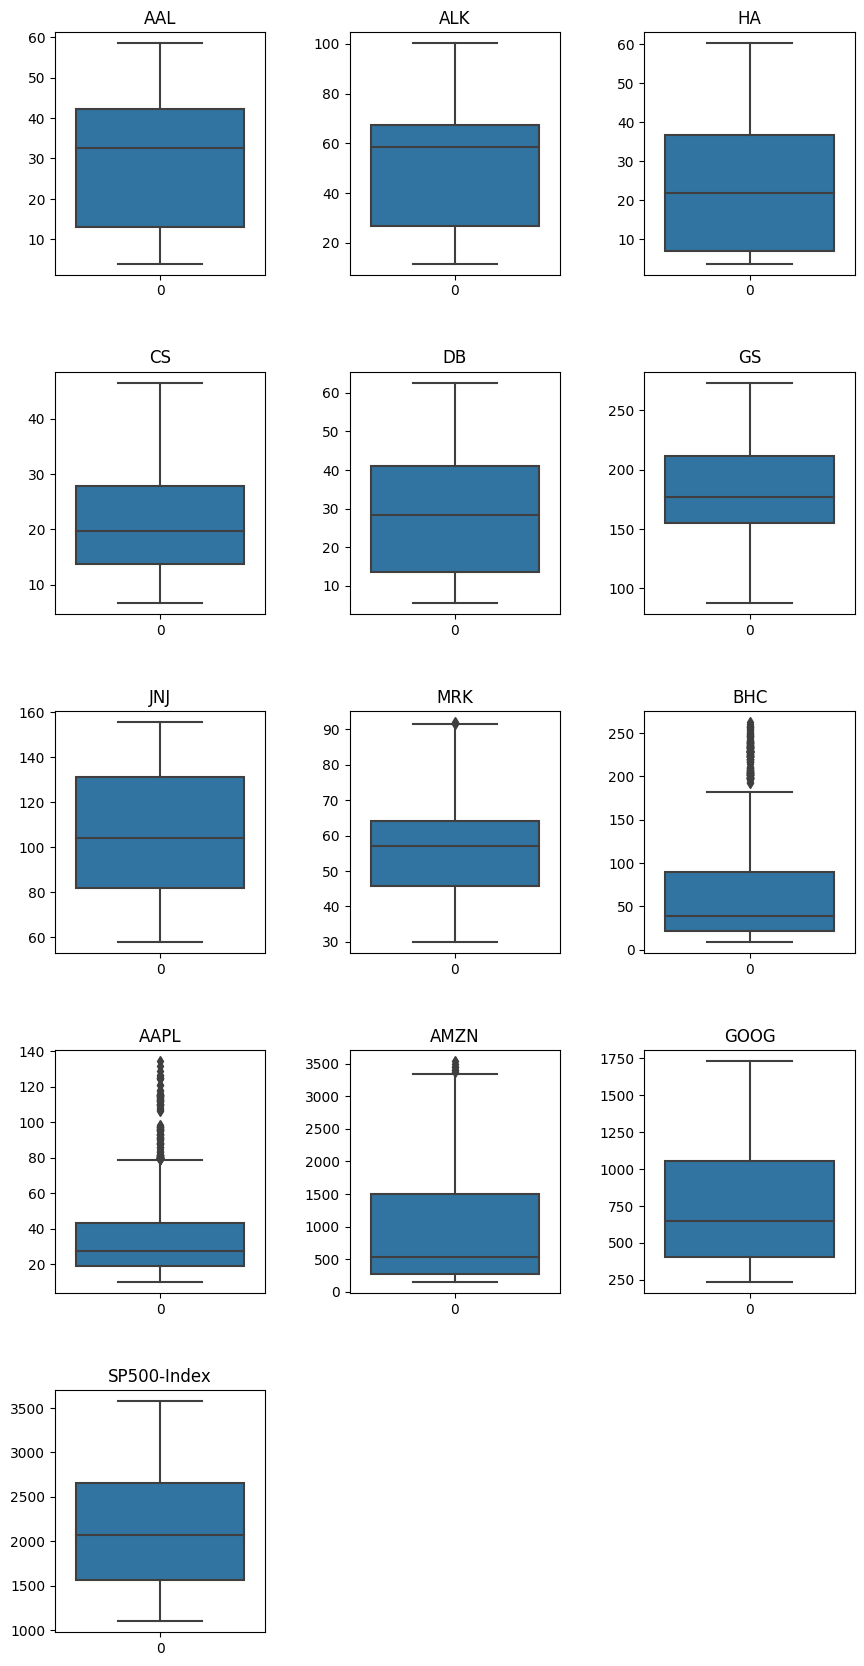

In [ ]:
# Plot stock and index price to check for outliers in the data

i = 1
plt_1 = plt.figure(figsize=(10, 20))
for ticker in prices.columns:
    plt.subplot(5,3,i)
    sns.boxplot(prices[ticker])
    plt.title(ticker)
    i+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
# show the key statistics of all the stocks and index
prices.describe()

AAL          ALK           HA           CS           DB  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean     29.397636    50.031176    22.870413    21.501379    27.304930   
std      15.211889    24.187020    15.483034     8.988043    15.409974   
min       4.000000    11.620000     3.780000     6.670000     5.480000   
25%      13.010000    26.780001     7.030000    13.740000    13.470000   
50%      32.520000    58.540001    21.910000    19.639999    28.370001   
75%      42.200001    67.260002    36.900002    27.750000    41.049618   
max      58.470001   100.239998    60.299999    46.513672    62.624046   

                GS          JNJ          MRK          BHC         AAPL  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean    179.598184   105.277378    57.161053    61.880687    33.454670   
std      42.405475    28.174233    15.164505    57.170002    20.630118   
min      87.699997    57.660000    29.809999     8.510000     9.951428   
25%     154.990005    81.930000    45.730000    22.170000    18.961428   
50%     177.229996   104.040001    57.180000    38.759998    27.592501   
75%     211.580002   130.979996    64.089996    90.269997    42.962502   
max     273.380005   155.509995    92.040001   262.519989   134.179993   

              AMZN         GOOG  SP500-Index  
count  2517.000000  2517.000000  2517.000000  
mean    854.636107   730.426139  2111.392732  
std     745.201139   364.685720   612.227235  
min     153.029999   236.553345  1099.229980  
25%     266.489990   403.642059  1562.170044  
50%     533.750000   651.789978  2071.219971  
75%    1500.000000  1055.810059  2656.300049  
max    3531.449951  1728.280029  3580.840088

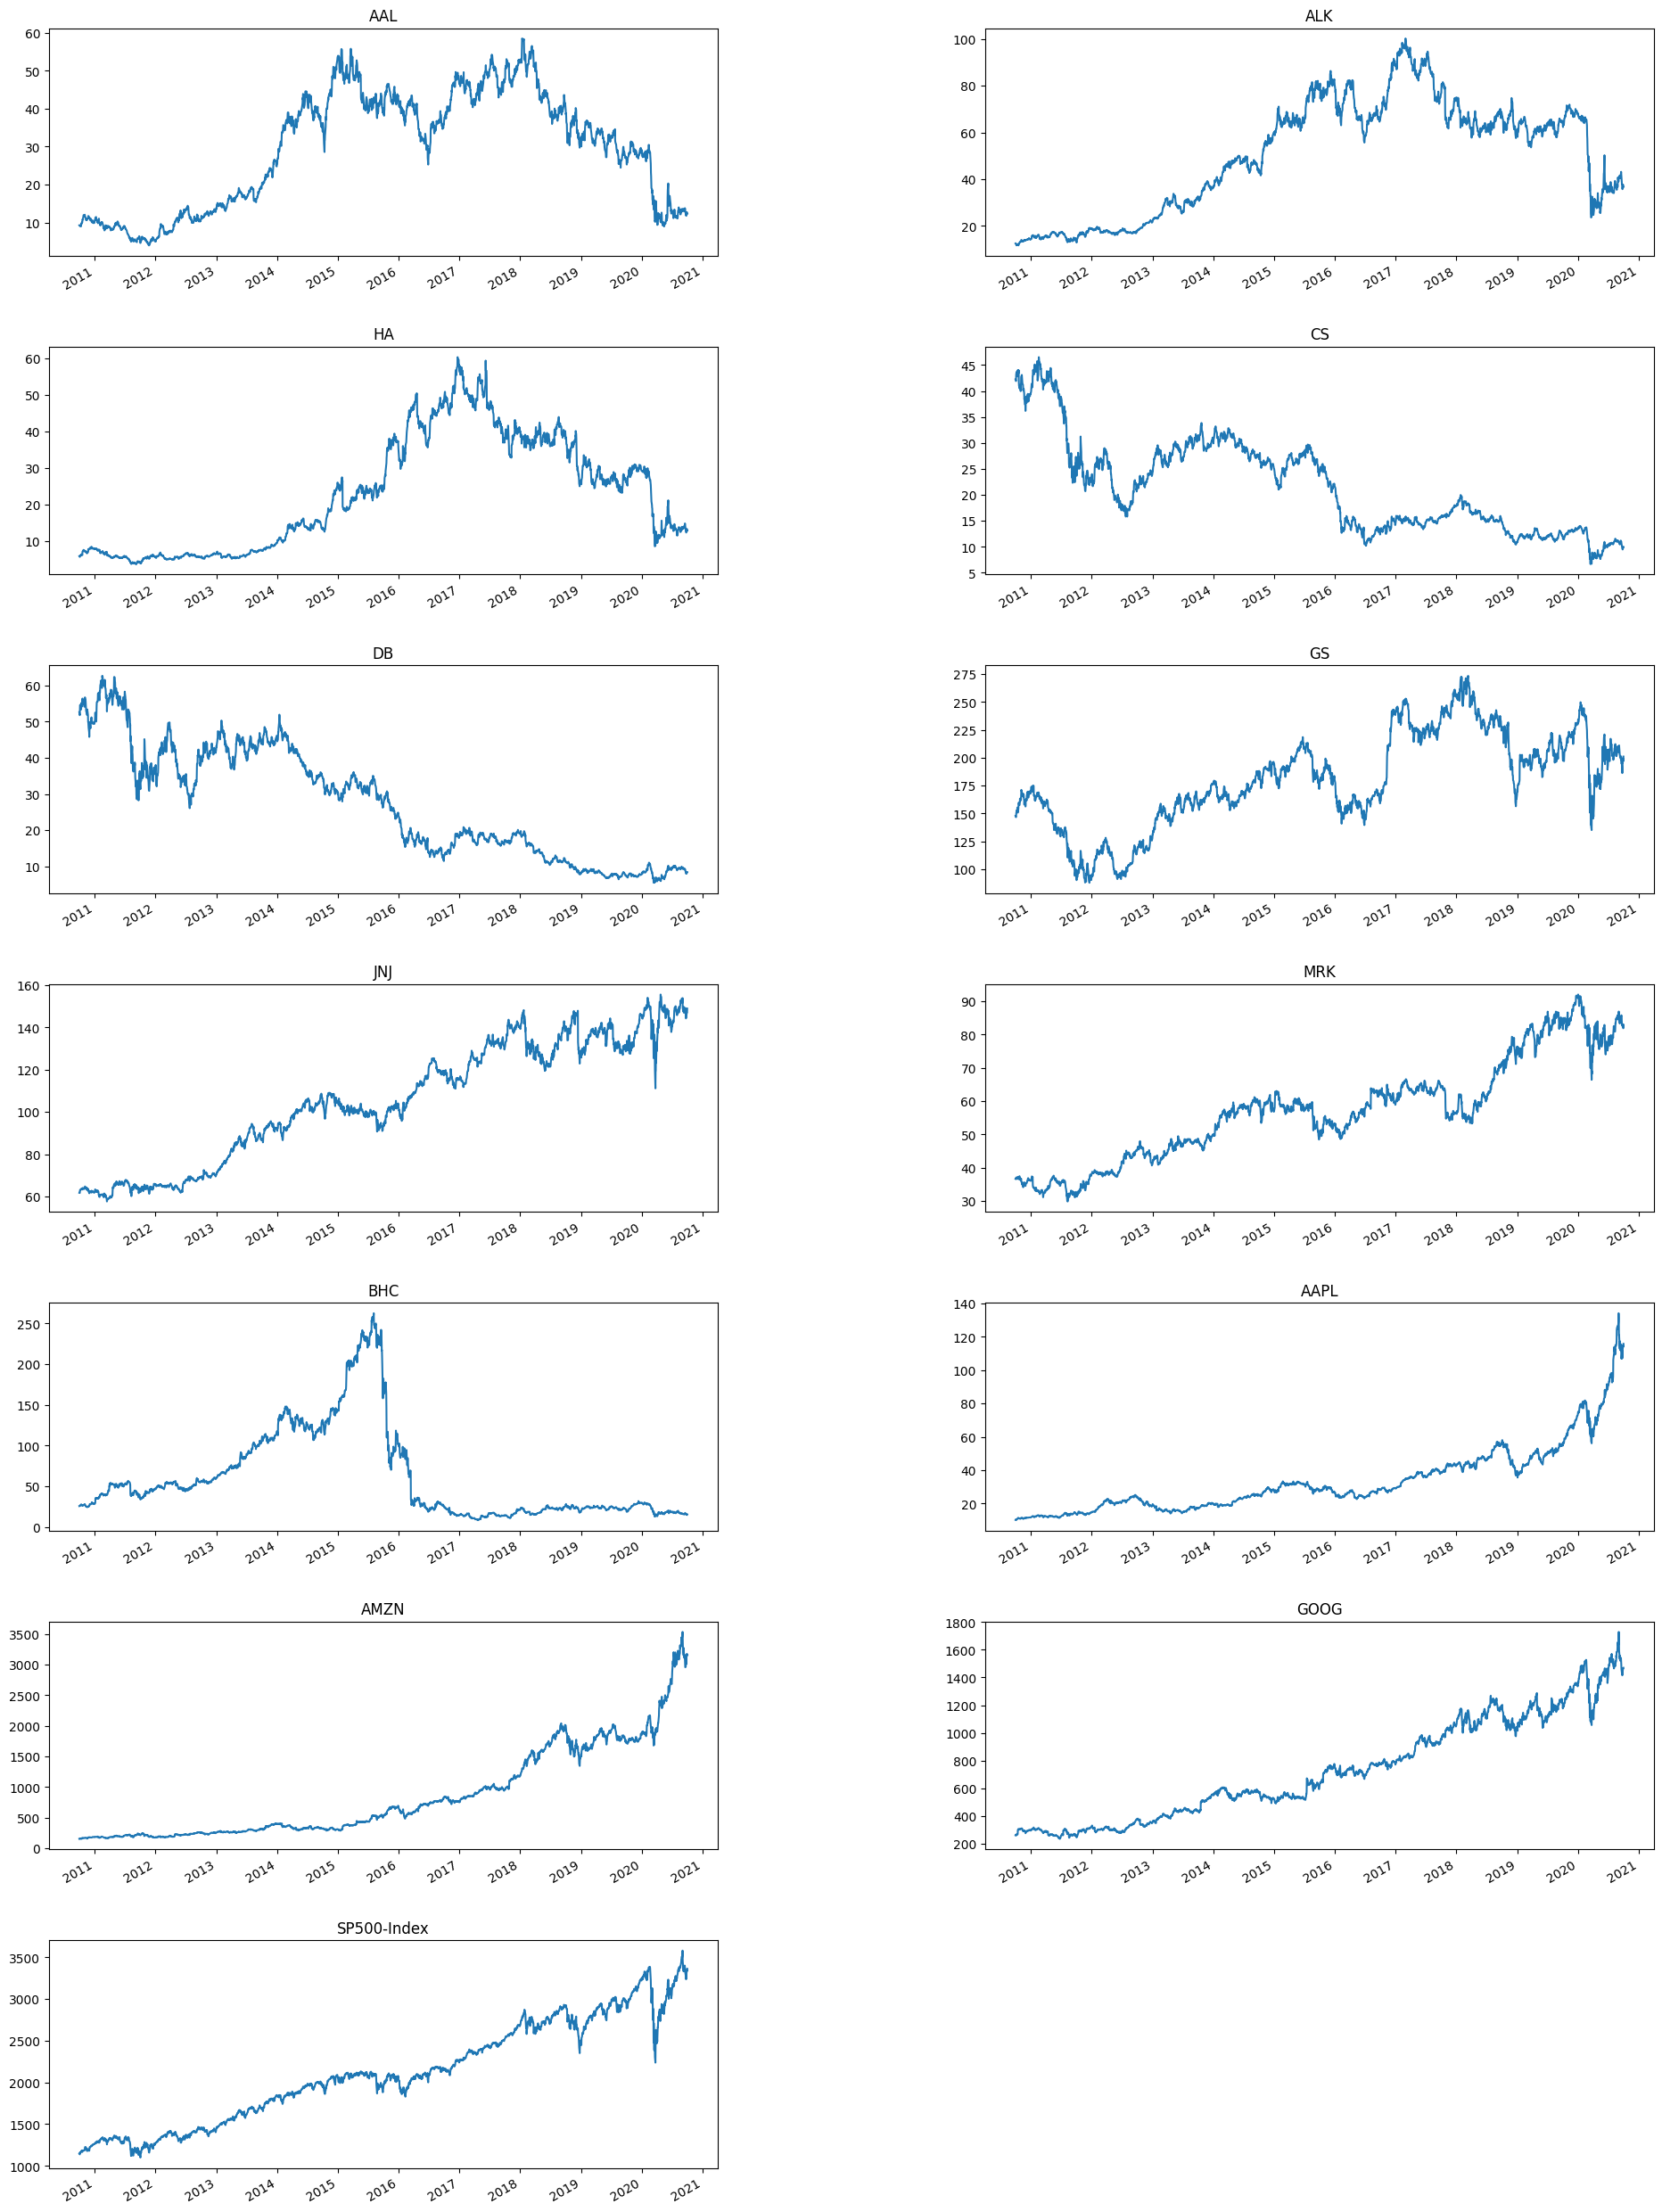

In [ ]:
# Capture the stock and index price trends using a line plot

i = 1
plt_1 = plt.figure(figsize=(30, 30))
for ticker in prices.columns:
    plt.subplot(7,2,i)
    prices[ticker].plot()
    plt.title(ticker)
    i+=1
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.7,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

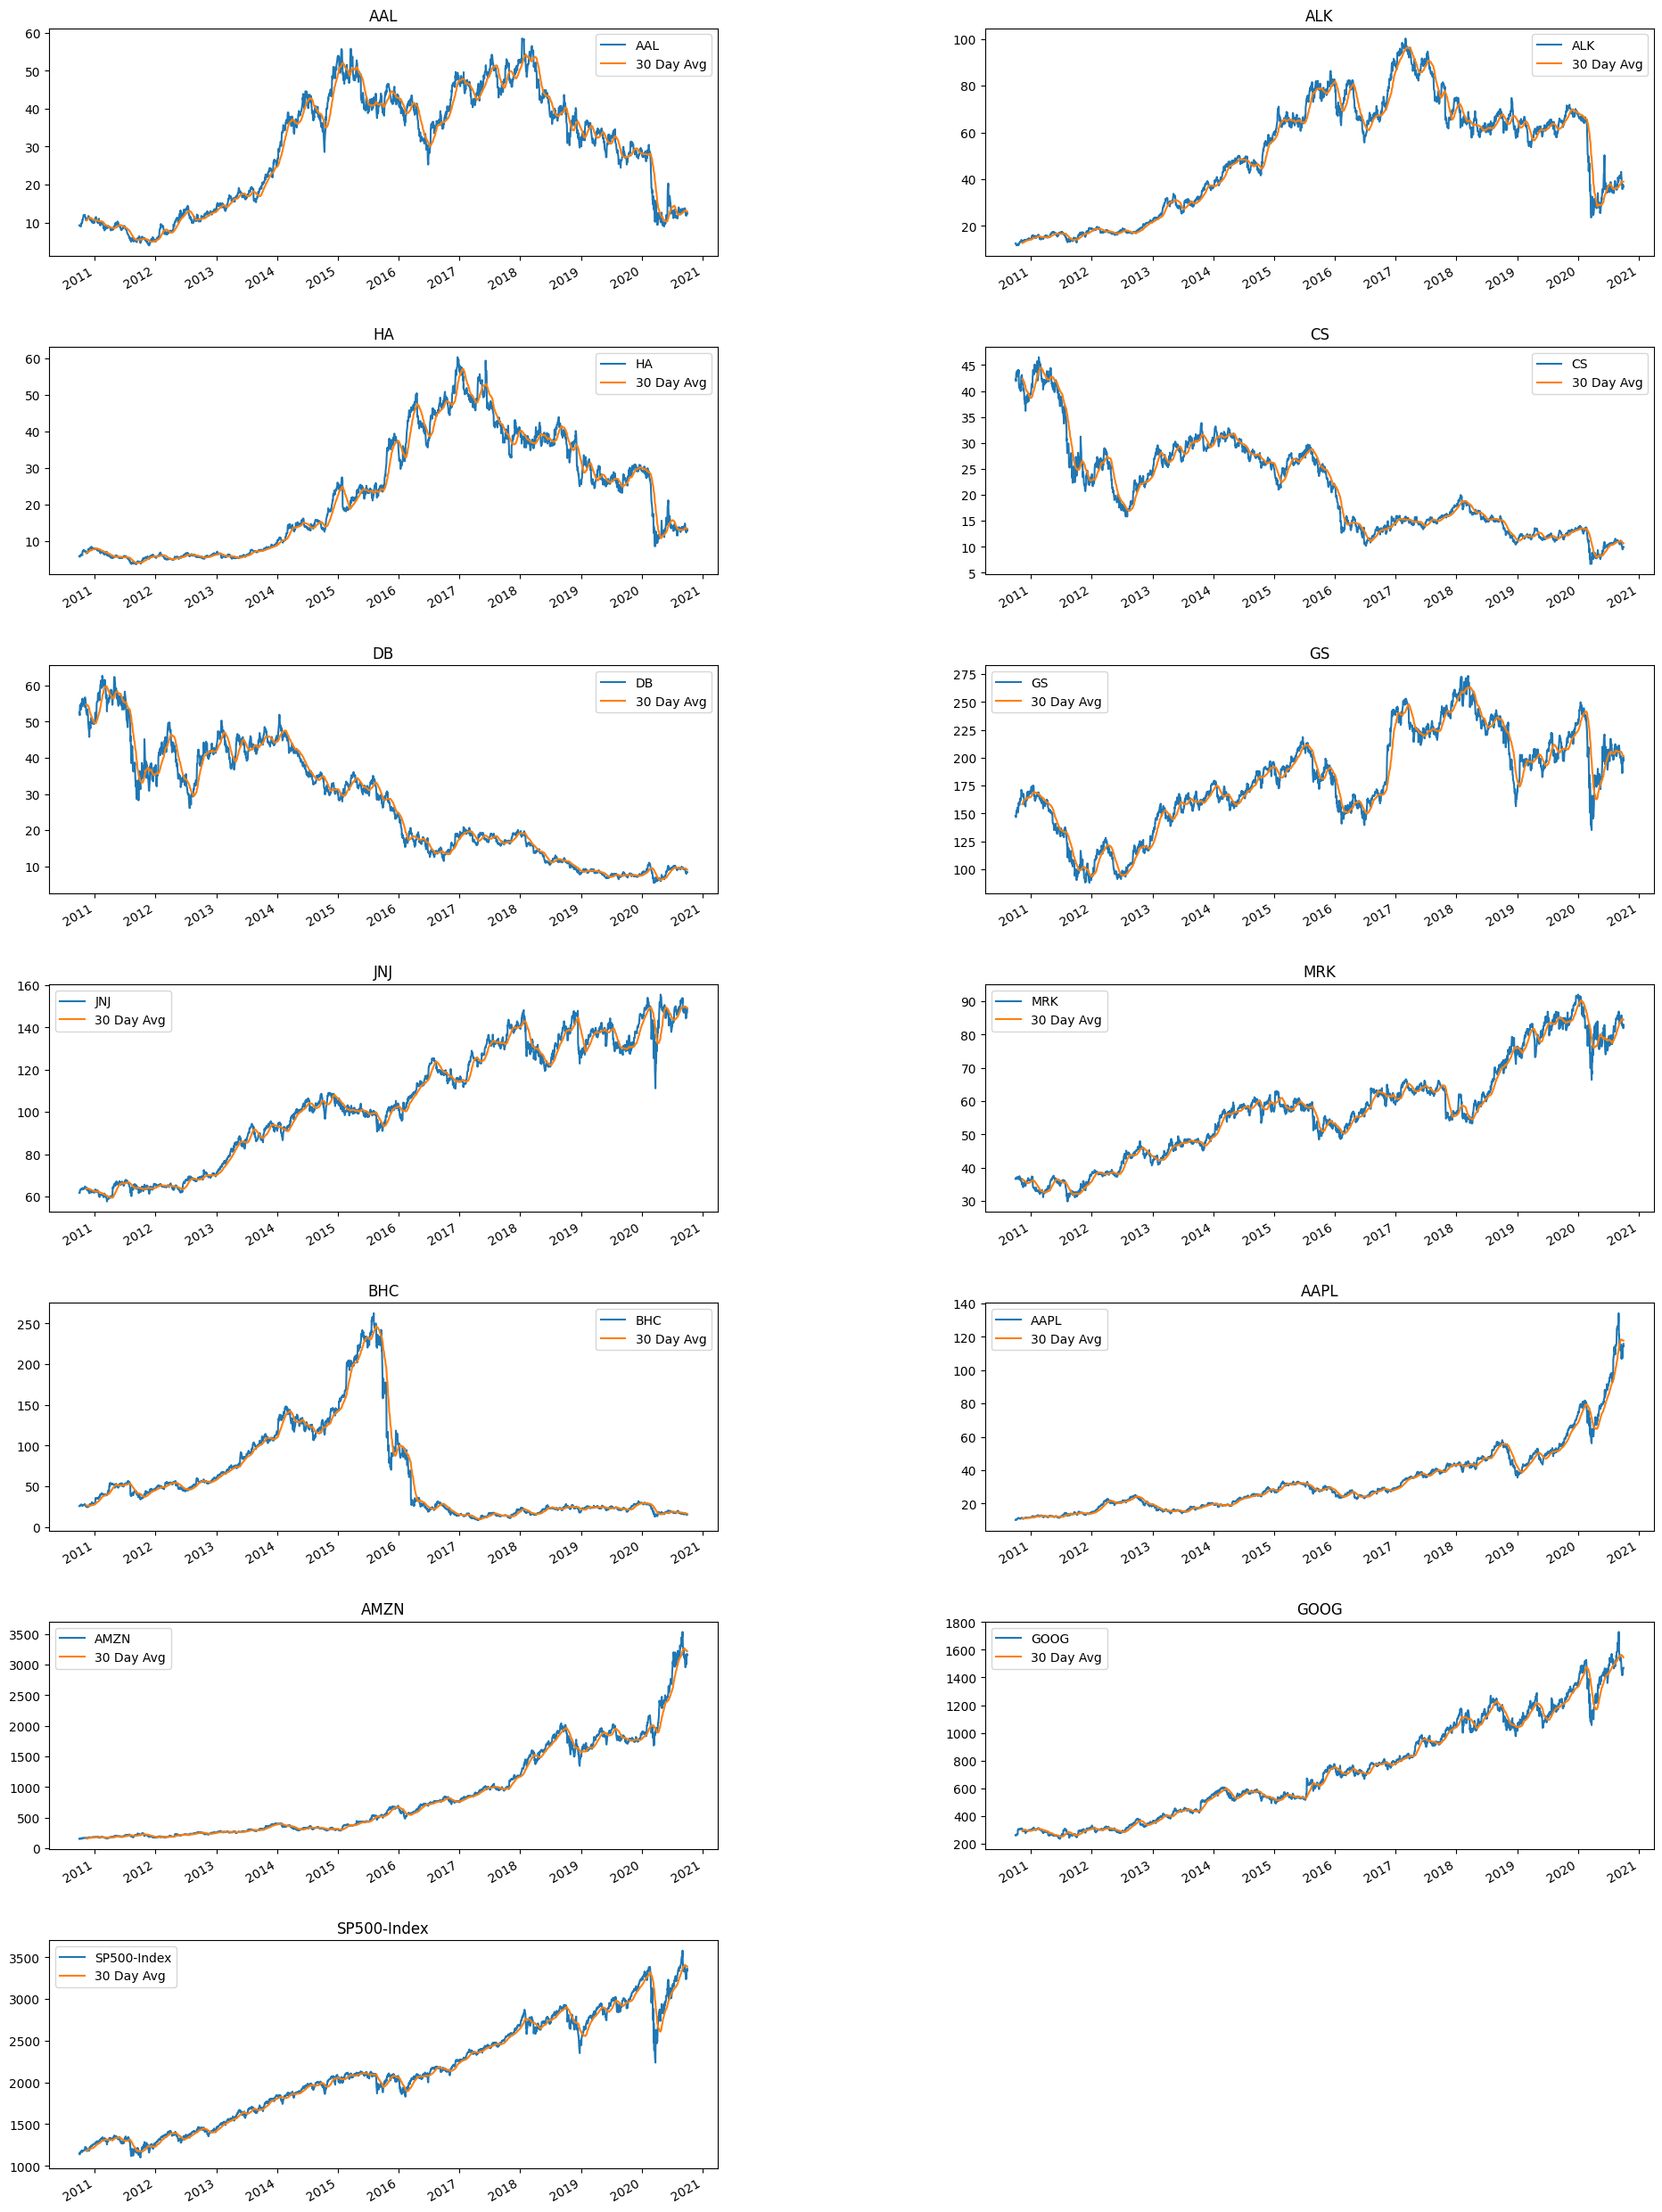

In [ ]:
# Capture the stock and index price trends using a moving averages

i = 1
plt_1 = plt.figure(figsize=(30, 30))
for ticker in prices.columns:
    plt.subplot(7,2,i)
    prices[ticker].plot(label =ticker)
    prices[ticker].rolling(window=30).mean().plot(label='30 Day Avg')
    plt.title(ticker)
    i+=1
    plt.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.7,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

In [ ]:
# Calculating the daily returns
returns = prices.pct_change()

# Dropping the rows with missing values
returns = returns.dropna(axis=0)
returns.head()

AAL       ALK        HA        CS        DB        GS  \
2010-10-04 -0.018299 -0.024503 -0.035235 -0.007401 -0.015965 -0.007651   
2010-10-05  0.012061  0.005971  0.017391  0.029590  0.042404  0.020468   
2010-10-06  0.000000 -0.002251  0.020513  0.006563  0.012204  0.008491   
2010-10-07  0.001083 -0.046154  0.030151  0.005396 -0.010484  0.001790   
2010-10-08 -0.018398  0.036344  0.000000 -0.015653 -0.003002  0.010257   

                 JNJ       MRK       BHC      AAPL      AMZN      GOOG  \
2010-10-04 -0.001296 -0.002186  0.004660 -0.013734  0.010930 -0.006221   
2010-10-05  0.018323  0.013691  0.016621  0.036965  0.035266  0.030401   
2010-10-06  0.006529 -0.000270  0.014829  0.000865 -0.034003 -0.007209   
2010-10-07  0.000158 -0.008106 -0.003372  0.000104  0.005599 -0.008122   
2010-10-08  0.000158  0.005448  0.009023  0.016769 -0.004607  0.011962   

            SP500-Index  
2010-10-04    -0.008035  
2010-10-05     0.020861  
2010-10-06    -0.000672  
2010-10-07    -0.001647  
2010-10-08     0.006122

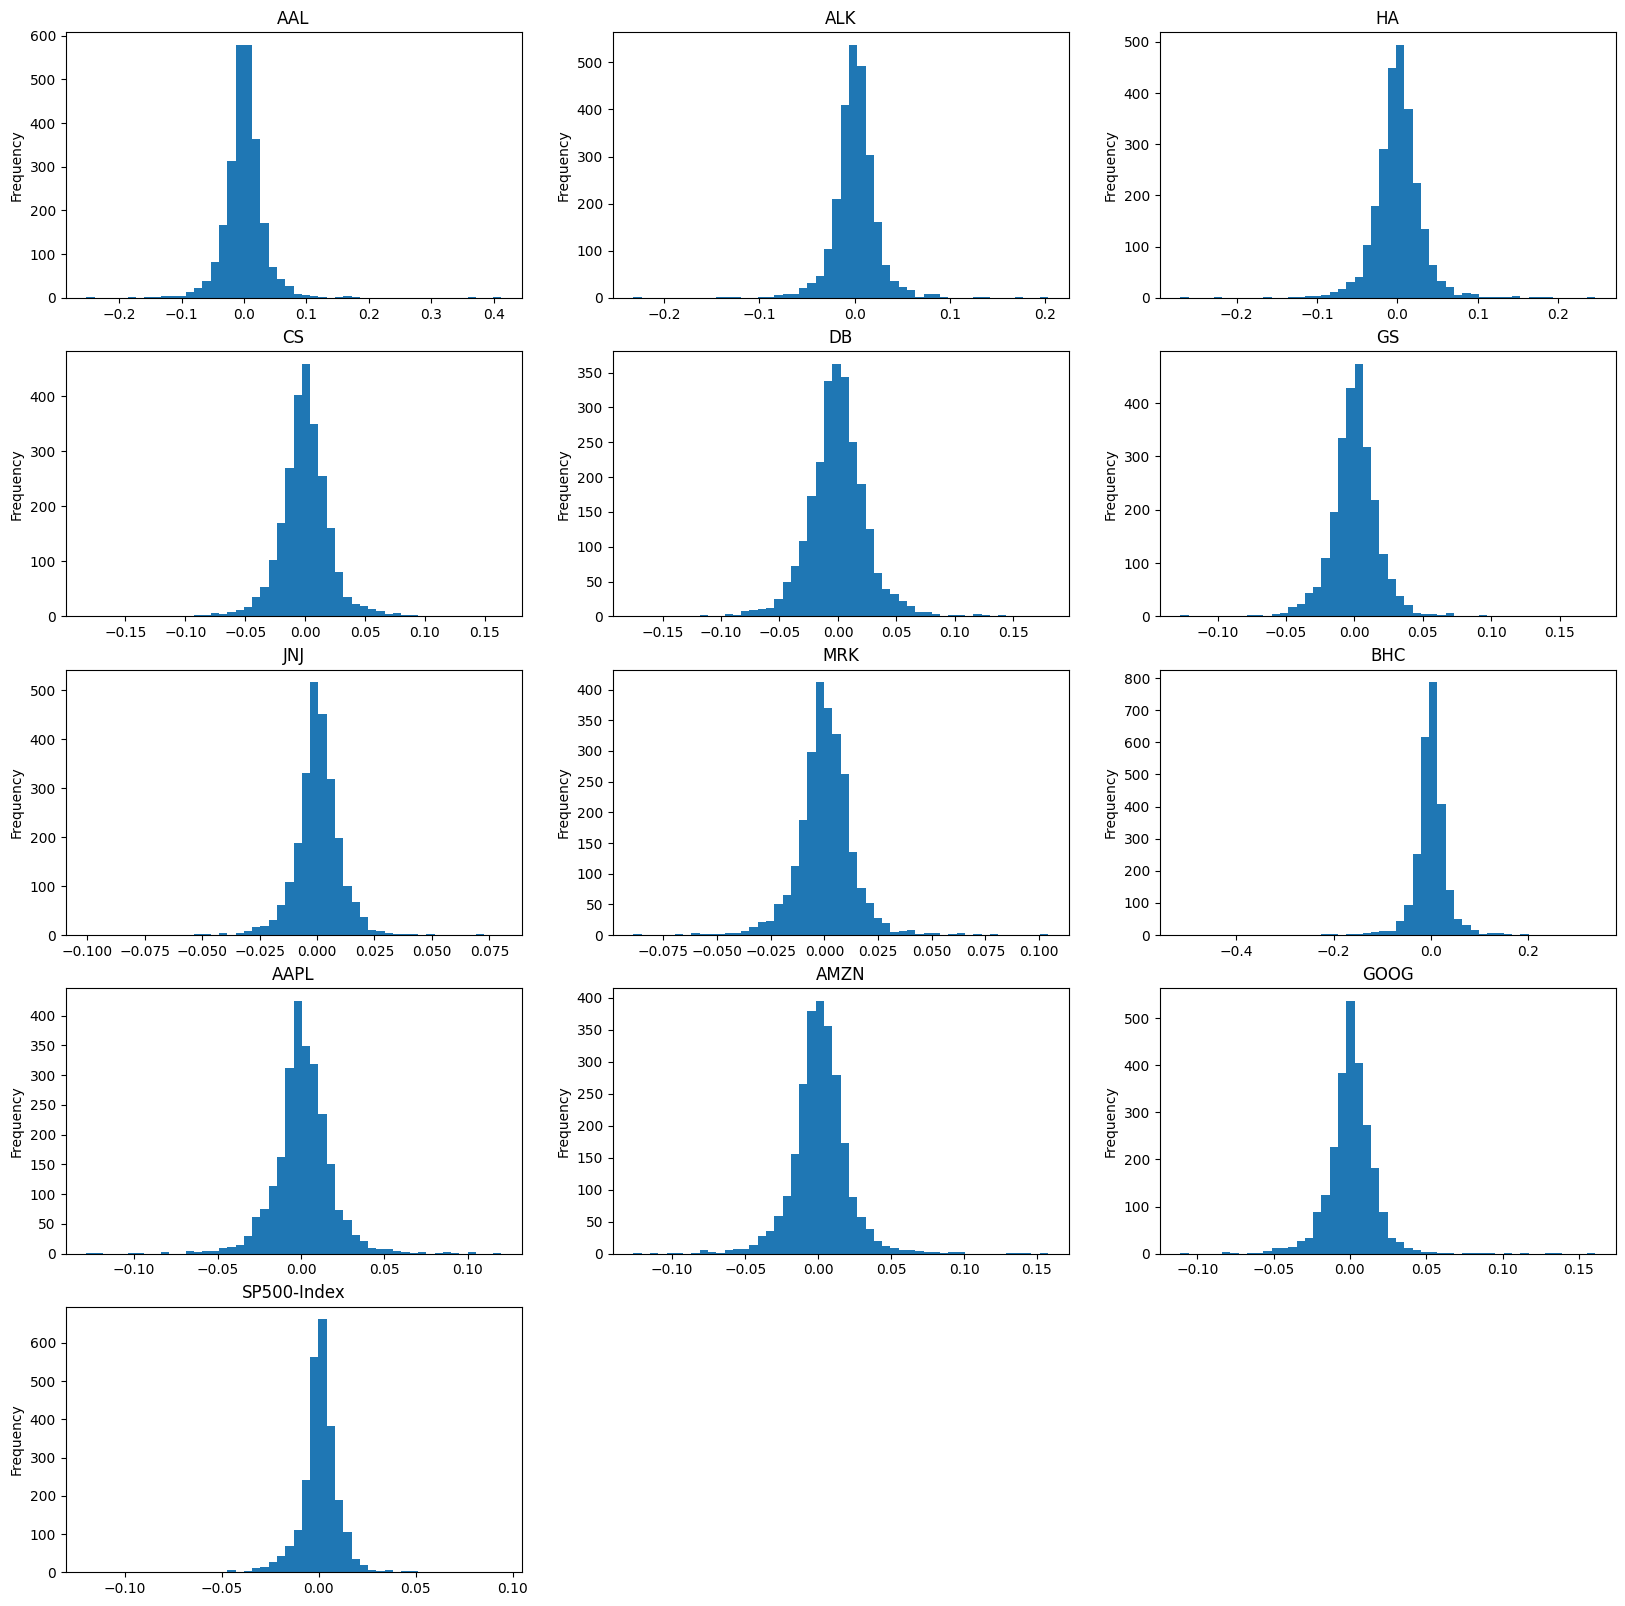

In [ ]:
# Plot stock price disperson from mean using histogram plots
i = 1
plt_1 = plt.figure(figsize=(20, 20))
for ticker in returns.columns:
    plt.subplot(5,3,i)
    returns[ticker].plot(kind = 'hist', bins = 50)
    plt.title(ticker)
    i+=1

In [ ]:
# Calculate volatility of price changes of stock and index using min,max & standard deviation
returns.describe()

AAL          ALK           HA           CS           DB  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      0.000637     0.000709     0.000765    -0.000325    -0.000381   
std       0.032726     0.023562     0.030147     0.022206     0.026374   
min      -0.252246    -0.232385    -0.269722    -0.182598    -0.174888   
25%      -0.014116    -0.010126    -0.013826    -0.010897    -0.013920   
50%       0.000216     0.000788     0.000451     0.000000    -0.000495   
75%       0.015593     0.011655     0.015317     0.010796     0.013712   
max       0.410970     0.203079     0.245837     0.163447     0.179506   

                GS          JNJ          MRK          BHC         AAPL  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      0.000291     0.000409     0.000410     0.000464     0.001128   
std       0.018331     0.010847     0.013049     0.035700     0.017719   
min      -0.127053    -0.100379    -0.088990    -0.514629    -0.128647   
25%      -0.008367    -0.004283    -0.006119    -0.013011    -0.006971   
50%       0.000490     0.000299     0.000283     0.000431     0.000891   
75%       0.009413     0.005656     0.007303     0.014973     0.010209   
max       0.175803     0.079977     0.104080     0.337444     0.119808   

              AMZN         GOOG  SP500-Index  
count  2516.000000  2516.000000  2516.000000  
mean      0.001398     0.000818     0.000488  
std       0.019889     0.016288     0.010934  
min      -0.126568    -0.111008    -0.119841  
25%      -0.008133    -0.006431    -0.003308  
50%       0.001107     0.000659     0.000653  
75%       0.011457     0.008646     0.005229  
max       0.157457     0.160524     0.093828

### 2.2 Bivariate Analysis

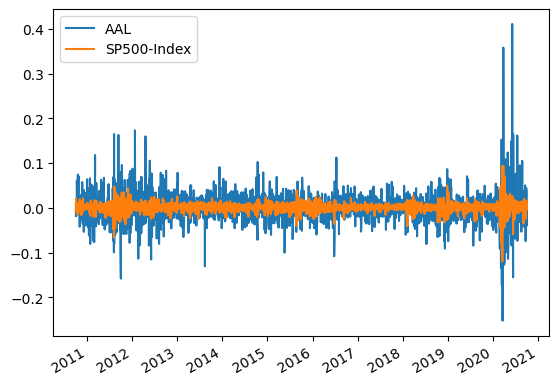

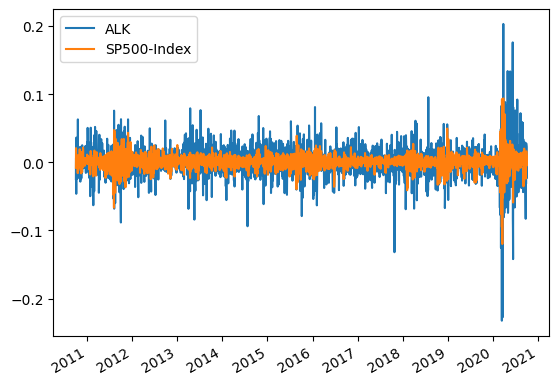

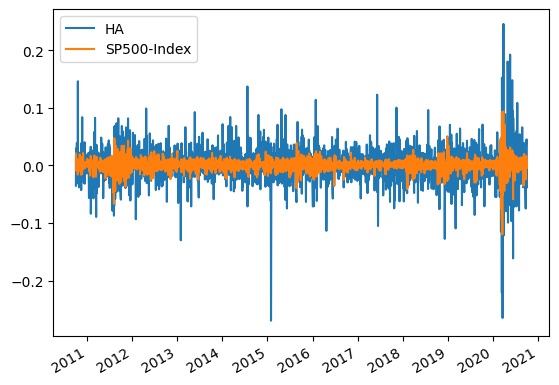

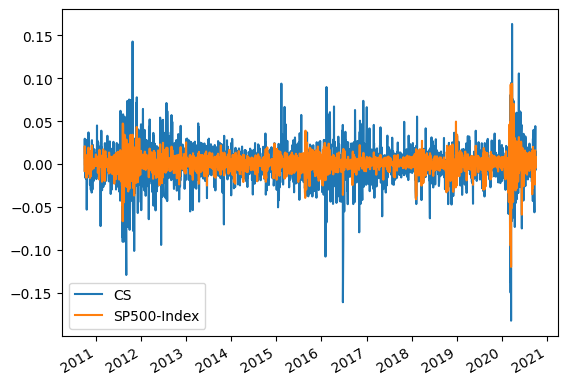

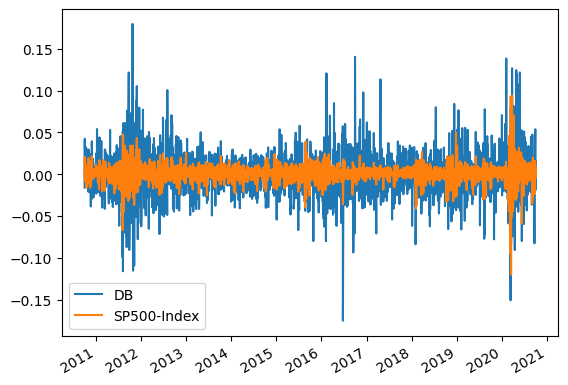

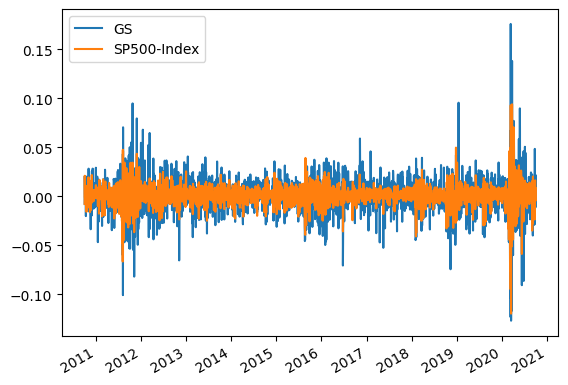

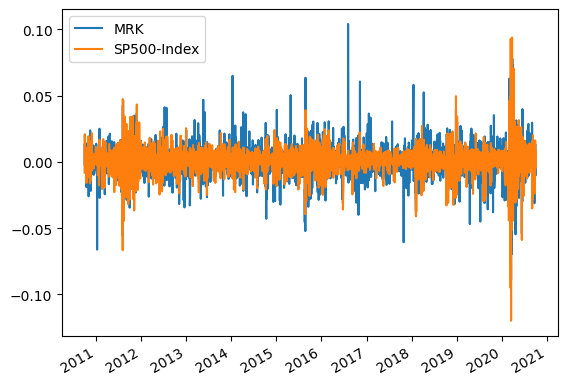

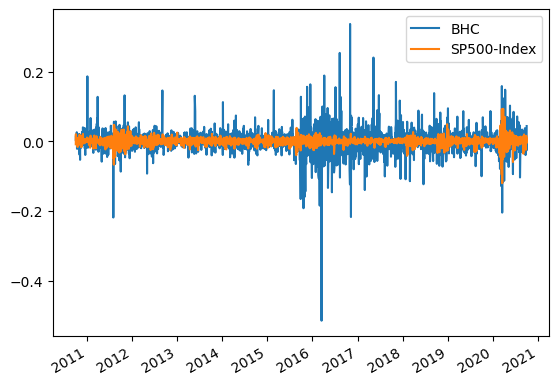

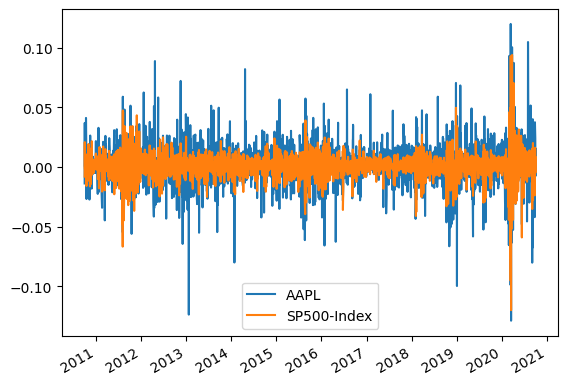

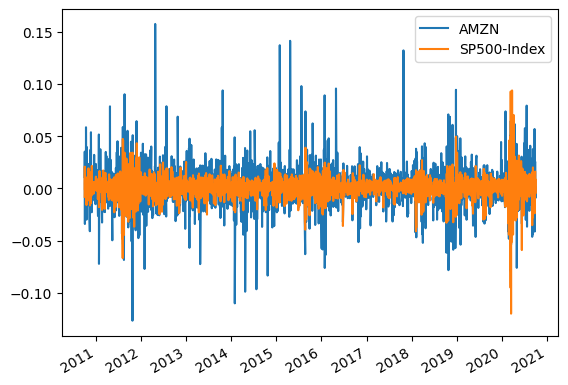

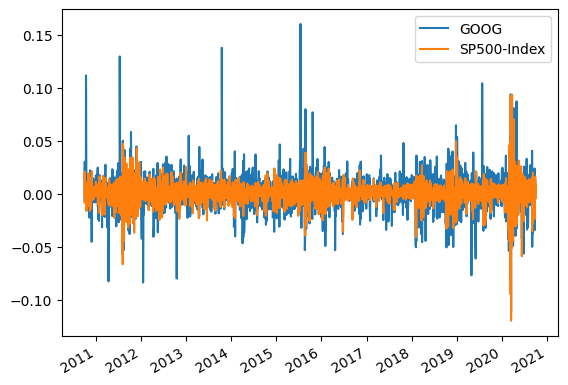

In [ ]:
#Risk of stocks compared to the index

for ticker in Ticker.Ticker:
    returns[[ticker,"SP500-Index"]].plot()

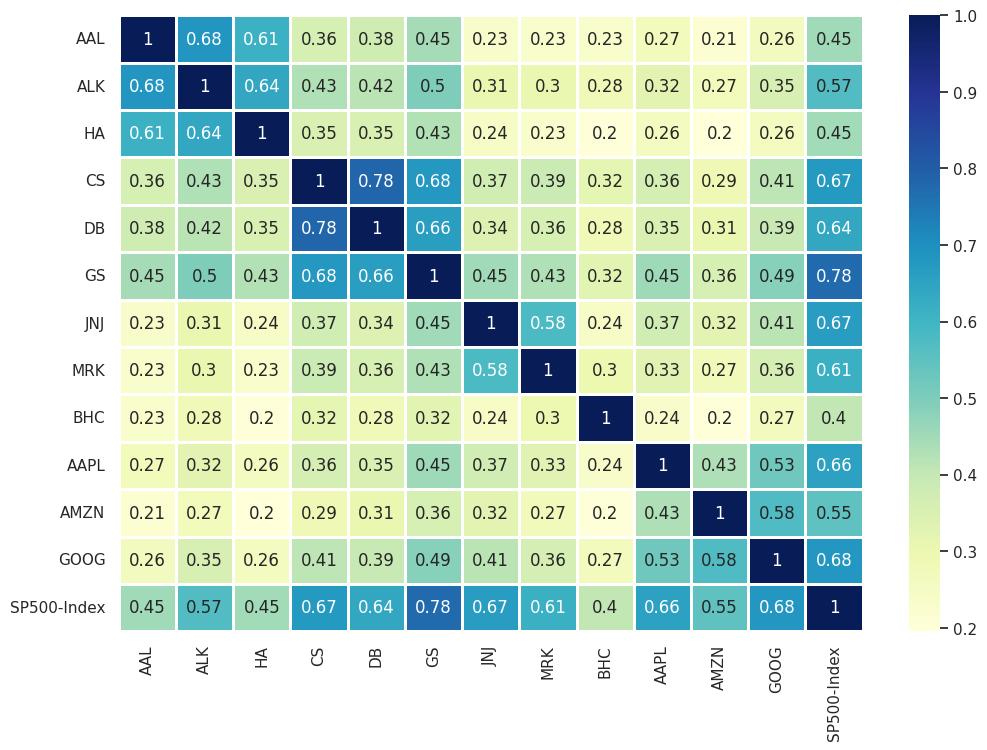

In [ ]:
# plotting correlation heatmap that shows correlation between stocks within/across the industy and with index
import seaborn as sns
sns.set (rc = {'figure.figsize':(12, 8)})
dataplot = sns.heatmap(returns.corr(), cmap="YlGnBu", annot=True,linewidths=1)
  
# displaying heatmap
plt.show()

In [ ]:
# Get industry tickers into a seperate lists
Aviation_Ticker = Ticker[Ticker.Industry =="Aviation"].Ticker
Technology_Ticker = Ticker[Ticker.Industry =="Technology"].Ticker
Healthcare_Ticker = Ticker[Ticker.Industry =="Healthcare"].Ticker
Finance_Ticker = Ticker[Ticker.Industry =="Finance"].Ticker
Pharmaceuticals_Ticker = Ticker[Ticker.Industry =="Pharmaceuticals"].Ticker

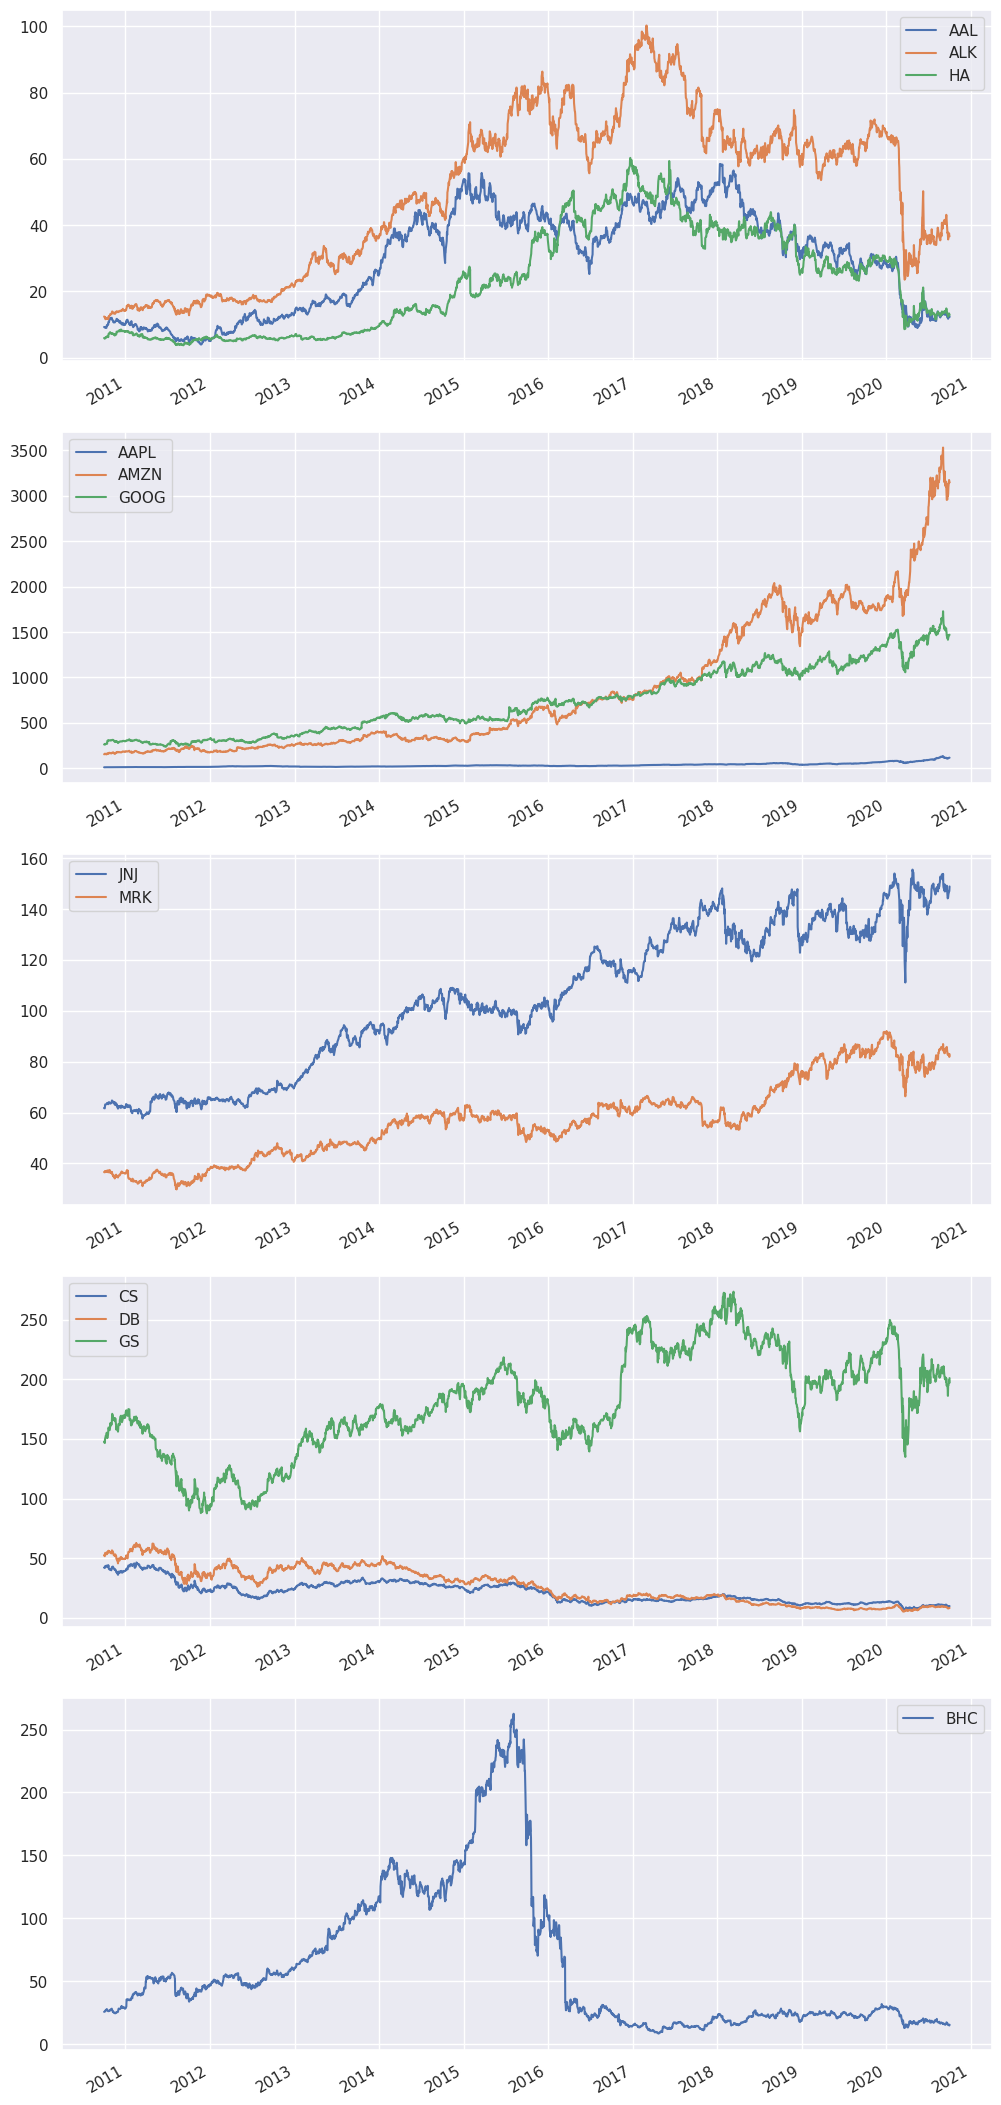

In [ ]:
#Compare Stock price trends amongst indutry peers

plt_1 = plt.figure(figsize=(12, 30))

plt.subplot(5,1,1)
for ticker in Aviation_Ticker:
    prices[ticker].plot()
plt.legend()

plt.subplot(5,1,2)
for ticker in Technology_Ticker:
    prices[ticker].plot()

plt.legend()

plt.subplot(5,1,3)
for ticker in Healthcare_Ticker:
    prices[ticker].plot()

plt.legend()

plt.subplot(5,1,4)
for ticker in Finance_Ticker:
    prices[ticker].plot()

plt.legend()

plt.subplot(5,1,5)
for ticker in Pharmaceuticals_Ticker:
    prices[ticker].plot()


plt.legend()
plt.show()

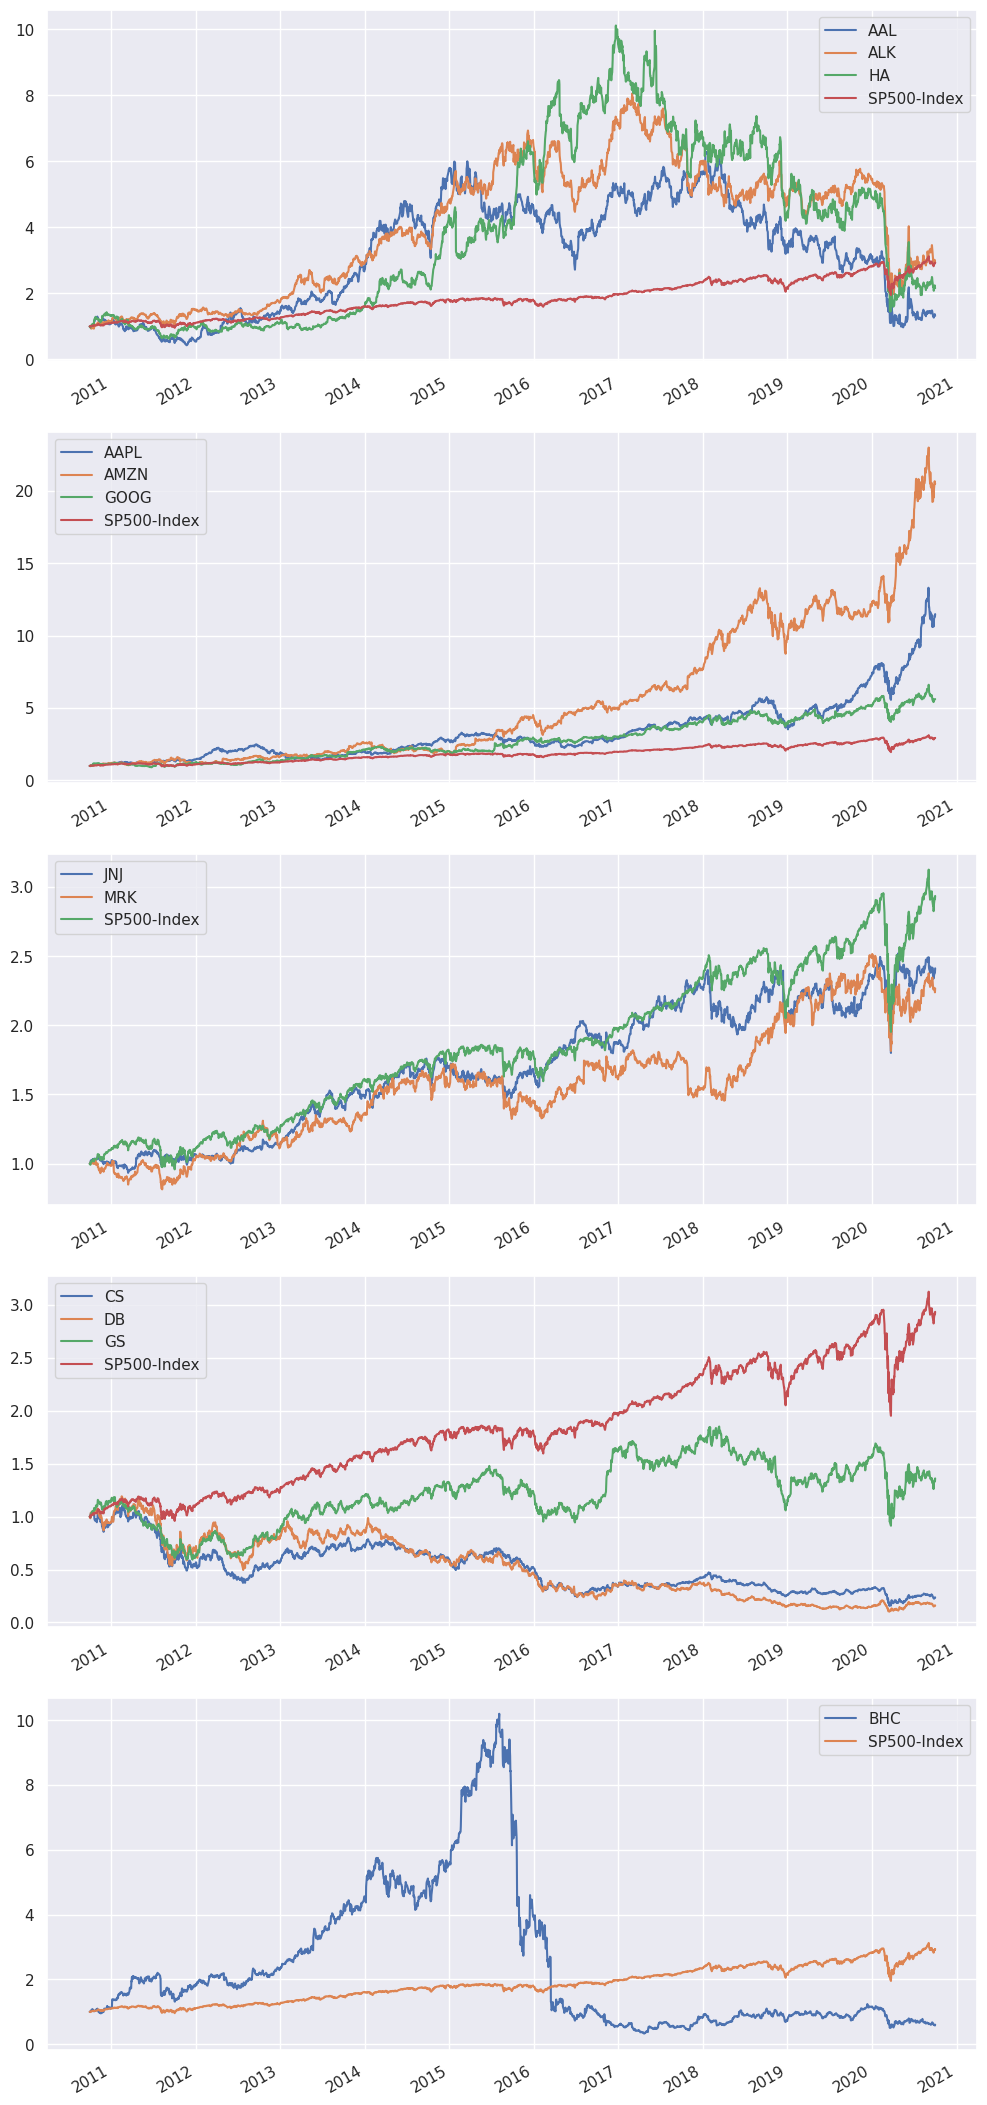

In [ ]:
#Normalised Stock price trends amongst industry peer and S&P index

plt_1 = plt.figure(figsize=(12, 30))

plt.subplot(5,1,1)
for ticker in Aviation_Ticker:
        (prices[ticker]/prices[ticker][0]).plot()
(prices["SP500-Index"]/prices["SP500-Index"][0]).plot()
plt.legend()

plt.subplot(5,1,2)
for ticker in Technology_Ticker:
        (prices[ticker]/prices[ticker][0]).plot()
(prices["SP500-Index"]/prices["SP500-Index"][0]).plot()
plt.legend()

plt.subplot(5,1,3)
for ticker in Healthcare_Ticker:
        (prices[ticker]/prices[ticker][0]).plot()
(prices["SP500-Index"]/prices["SP500-Index"][0]).plot()
plt.legend()

plt.subplot(5,1,4)
for ticker in Finance_Ticker:
        (prices[ticker]/prices[ticker][0]).plot()
(prices["SP500-Index"]/prices["SP500-Index"][0]).plot()
plt.legend()

plt.subplot(5,1,5)
for ticker in Pharmaceuticals_Ticker:
        (prices[ticker]/prices[ticker][0]).plot()
(prices["SP500-Index"]/prices["SP500-Index"][0]).plot()

plt.legend()
plt.show()

## 3.Stock Analysis & Portfolio Management - CAPM Method

A brief summary of CAPM Assessment is shared below

**Calculate Stock level Metrics**
1. Calculate daily,annualised and cumulative returns of the individual stocks
2. Calculate individual stock risk using standard deviation
3. Calculate "Beta" (volatility) of the stocks using linear regression method
4. Calculate expected value of the stocks using the Beta value,market returns and risk free returns

**Portolio Selection**
1. Eliminate stocks whose "beta" is higher than market while offering lower returns than market. These stocks assume higher risk offering lower returns
2. Eliminate stocks that have shown higher volatility than market and showing significant downtrend in the last 3-5 years

**Portolio level Metrics**

 1.  Calculate stock weights based on stock selection
 2.  Calculate daily,annualised and cumulative returns of the individual stocks
 3.  Calculate Beta value of the portfoli ousing weight average of the individual stocks
 4.  Estimate Portfolio returns using beta value,market returns and risk free returns

### 3.1 Stock Level Metrics

In [ ]:
# calculating daily mean returns
returns_average = returns.mean()*100
returns_average.sort_values(ascending=False)

AMZN           0.139762
AAPL           0.112763
GOOG           0.081755
HA             0.076518
ALK            0.070949
AAL            0.063686
SP500-Index    0.048796
BHC            0.046418
MRK            0.041026
JNJ            0.040877
GS             0.029053
CS            -0.032495
DB            -0.038136
dtype: float64

In [ ]:
# Store daily returns in a seperate data frame
stock_outcome = pd.DataFrame(round(returns_average,2),columns=["Daily Returns"])
stock_outcome

Daily Returns
AAL                   0.06
ALK                   0.07
HA                    0.08
CS                   -0.03
DB                   -0.04
GS                    0.03
JNJ                   0.04
MRK                   0.04
BHC                   0.05
AAPL                  0.11
AMZN                  0.14
GOOG                  0.08
SP500-Index           0.05

In [ ]:
#Annualised returns for the securities
Average_annualised_returns = returns_average*252
Average_annualised_returns.sort_values(ascending=False)

AMZN           35.220120
AAPL           28.416386
GOOG           20.602336
HA             19.282441
ALK            17.879160
AAL            16.048889
SP500-Index    12.296594
BHC            11.697321
MRK            10.338527
JNJ            10.300879
GS              7.321234
CS             -8.188845
DB             -9.610244
dtype: float64

In [ ]:
# Store Annualised returns as a column in the "stock_outcome" dataframe
stock_outcome["Annualised Returns"] = round(Average_annualised_returns,2)
stock_outcome

Daily Returns  Annualised Returns
AAL                   0.06               16.05
ALK                   0.07               17.88
HA                    0.08               19.28
CS                   -0.03               -8.19
DB                   -0.04               -9.61
GS                    0.03                7.32
JNJ                   0.04               10.30
MRK                   0.04               10.34
BHC                   0.05               11.70
AAPL                  0.11               28.42
AMZN                  0.14               35.22
GOOG                  0.08               20.60
SP500-Index           0.05               12.30

In [ ]:
# Cumulative Return for an investor if he/she bought the stocks on 2010-10-4 (4th October 2010)
new = returns.loc["2010-10-4":, :]

# Cumulative return from the portfolio
cumulative_returns = (1+new).cumprod()
cum_returns = (cumulative_returns.tail(1)-1)*100

cum_returns = cum_returns.T
cum_returns.columns =["Cumulative Returns"]
cum_returns.sort_values(by = "Cumulative Returns",ascending = False)

Cumulative Returns
AMZN                1948.487305
AAPL                1047.770050
GOOG                 461.283184
ALK                  194.275967
SP500-Index          193.394056
JNJ                  141.101223
MRK                  126.639348
HA                   116.275168
GS                    36.066354
AAL                   32.292788
BHC                  -39.650485
CS                   -76.389269
DB                   -84.029028

In [ ]:
# Store Cumulative returns as a column in the "stock_outcome" dataframe
stock_outcome["Cumulative Returns"] = round(cum_returns,2)
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns
AAL                   0.06               16.05               32.29
ALK                   0.07               17.88              194.28
HA                    0.08               19.28              116.28
CS                   -0.03               -8.19              -76.39
DB                   -0.04               -9.61              -84.03
GS                    0.03                7.32               36.07
JNJ                   0.04               10.30              141.10
MRK                   0.04               10.34              126.64
BHC                   0.05               11.70              -39.65
AAPL                  0.11               28.42             1047.77
AMZN                  0.14               35.22             1948.49
GOOG                  0.08               20.60              461.28
SP500-Index           0.05               12.30              193.39

In [ ]:
#store risk as a seperate column in the outcome data frame
stock_outcome["Annualised Risk-Standard Deviation"] = round((returns.std()* np.sqrt(252))*100,2)
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns  \
AAL                   0.06               16.05               32.29   
ALK                   0.07               17.88              194.28   
HA                    0.08               19.28              116.28   
CS                   -0.03               -8.19              -76.39   
DB                   -0.04               -9.61              -84.03   
GS                    0.03                7.32               36.07   
JNJ                   0.04               10.30              141.10   
MRK                   0.04               10.34              126.64   
BHC                   0.05               11.70              -39.65   
AAPL                  0.11               28.42             1047.77   
AMZN                  0.14               35.22             1948.49   
GOOG                  0.08               20.60              461.28   
SP500-Index           0.05               12.30              193.39   

             Annualised Risk-Standard Deviation  
AAL                                       51.95  
ALK                                       37.40  
HA                                        47.86  
CS                                        35.25  
DB                                        41.87  
GS                                        29.10  
JNJ                                       17.22  
MRK                                       20.71  
BHC                                       56.67  
AAPL                                      28.13  
AMZN                                      31.57  
GOOG                                      25.86  
SP500-Index                               17.36

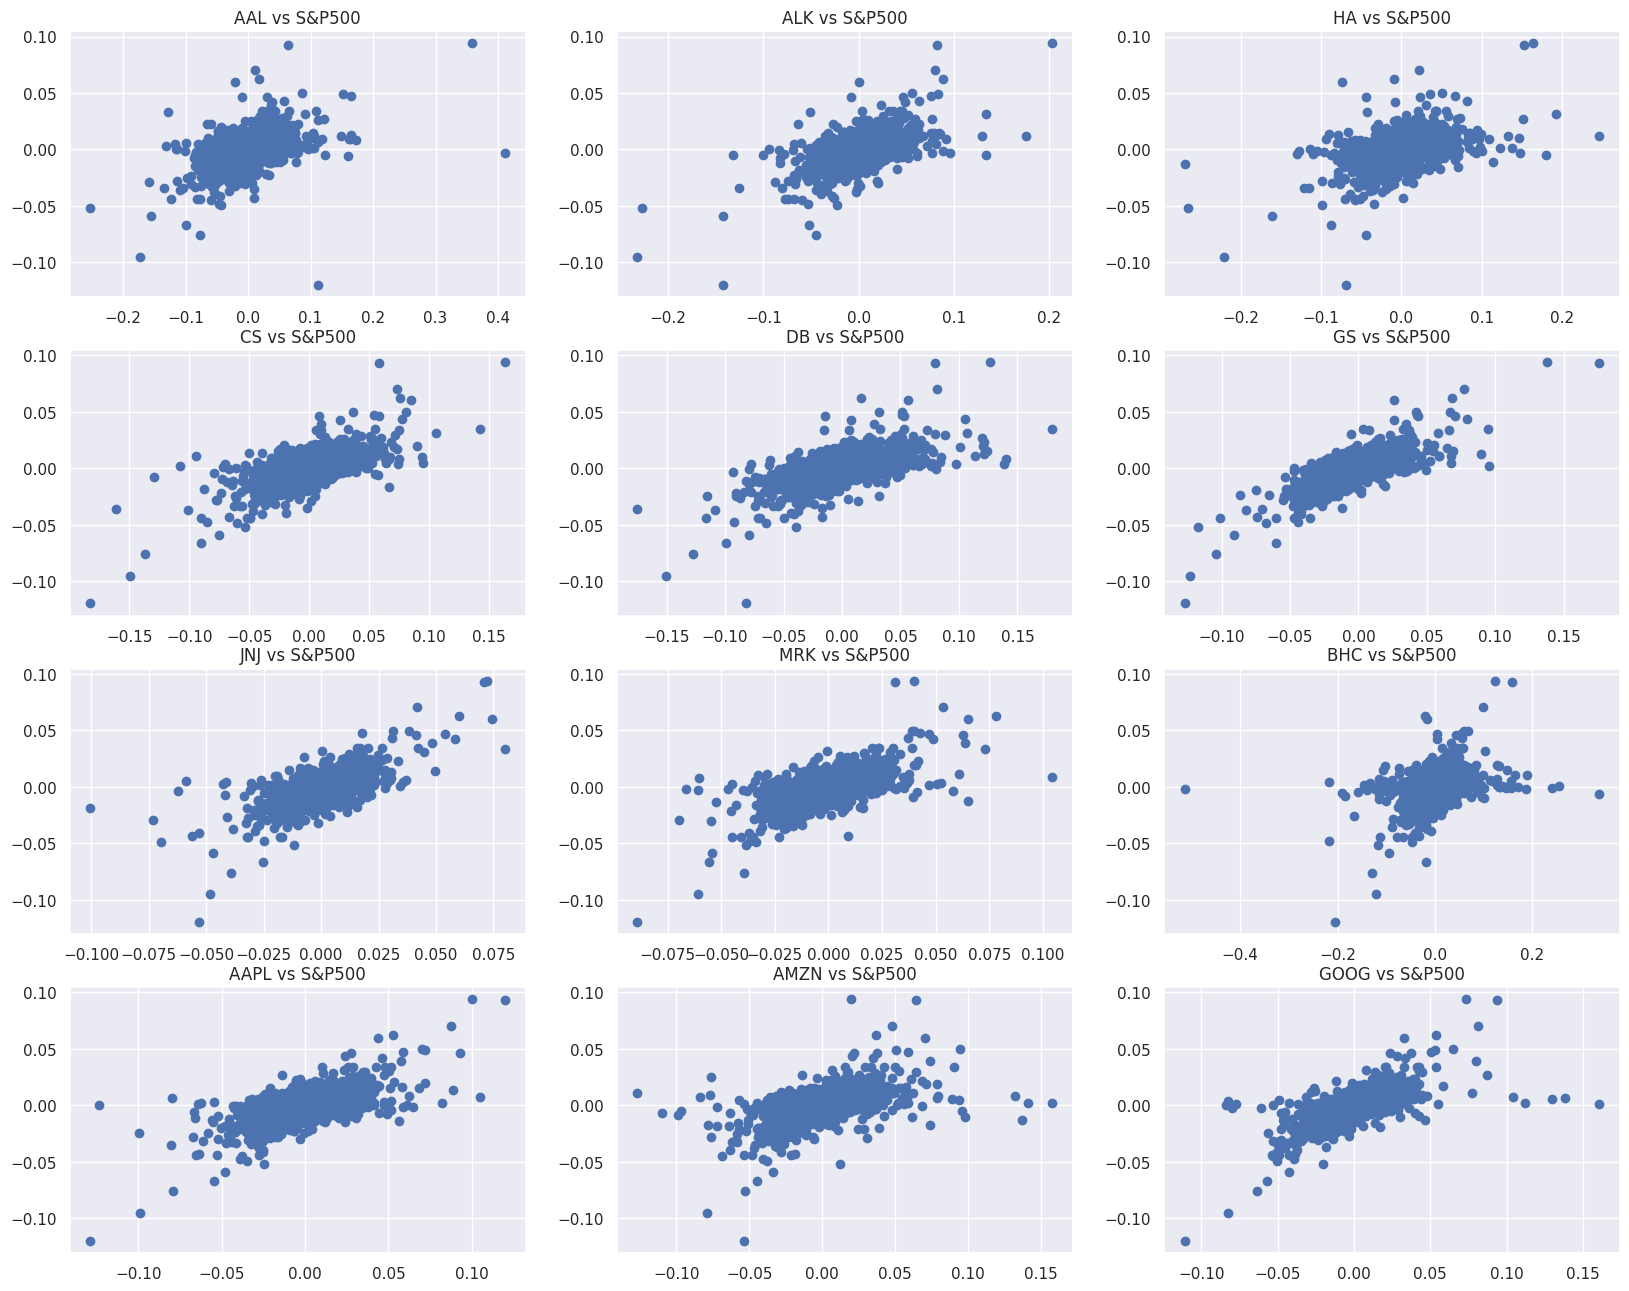

In [ ]:
#Scatter plot to see if linear relationship exists between stocks and the index
i = 1
plt_1 = plt.figure(figsize=(20, 20))
for ticker in Ticker.Ticker:
    plt.subplot(5,3,i)
    plt.scatter(returns[ticker],returns["SP500-Index"])
    plt.title(ticker+' vs '+ "S&P500")
    i+=1

In [ ]:
#Carryout Linear regression to work out beta value for all the stocks
# Importing the library
import statsmodels.api as sm

alpha = []
beta =[]

# spllitting the data into dependent variable (Return on security) and independent variable (Return on market benchmark) 
sp500 = returns["SP500-Index"]


for ticker in returns.columns:

    Y = returns[ticker]

# Adding a constant for the regression equation
    X_sm = sm.add_constant(sp500)

# make regression model 
    model = sm.OLS(Y,X_sm)


# Printing results to extract the values
    results = model.fit()

    alpha.append(results.params[0])
    beta.append(results.params[1])
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AAL   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     646.4
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.19e-127
Time:                        11:04:34   Log-Likelihood:                 5322.0
No. Observations:                2516   AIC:                        -1.064e+04
Df Residuals:                    2514   BIC:                        -1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.365e-05      0.001     -0.041      

In [ ]:
#store beta value in "stock_outcome" dataframe
stock_outcome["Alpha"] = alpha
stock_outcome["Beta"] = beta
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns  \
AAL                   0.06               16.05               32.29   
ALK                   0.07               17.88              194.28   
HA                    0.08               19.28              116.28   
CS                   -0.03               -8.19              -76.39   
DB                   -0.04               -9.61              -84.03   
GS                    0.03                7.32               36.07   
JNJ                   0.04               10.30              141.10   
MRK                   0.04               10.34              126.64   
BHC                   0.05               11.70              -39.65   
AAPL                  0.11               28.42             1047.77   
AMZN                  0.14               35.22             1948.49   
GOOG                  0.08               20.60              461.28   
SP500-Index           0.05               12.30              193.39   

             Annualised Risk-Standard Deviation         Alpha      Beta  
AAL                                       51.95 -2.364672e-05  1.353609  
ALK                                       37.40  1.085620e-04  1.231512  
HA                                        47.86  1.632609e-04  1.233534  
CS                                        35.25 -9.934604e-04  1.370002  
DB                                        41.87 -1.131620e-03  1.537546  
GS                                        29.10 -3.444503e-04  1.301286  
JNJ                                       17.22  8.562177e-05  0.662233  
MRK                                       20.71  5.235226e-05  0.733475  
BHC                                       56.67 -1.779620e-04  1.315971  
AAPL                                      28.13  6.087624e-04  1.063349  
AMZN                                      31.57  9.102481e-04  0.998802  
GOOG                                      25.86  3.230845e-04  1.013338  
SP500-Index                               17.36 -5.014435e-19  1.000000

In [ ]:
#Caulculate daily sharpe ratio
daily_risk_free_rate = ((1+.0075)**(1/365))-1
Sharpe_ratio =  (returns.mean()-daily_risk_free_rate)/ returns.std()
Sharpe_ratio.sort_values(ascending=False)

AMZN           0.069240
AAPL           0.062486
GOOG           0.048937
SP500-Index    0.042755
JNJ            0.035798
MRK            0.029872
ALK            0.029242
HA             0.024702
AAL            0.018835
GS             0.014732
BHC            0.012429
DB            -0.015236
CS            -0.015556
dtype: float64

In [ ]:
#Calculate Annualised Sharpe ratio
Annualised_Sharpe_Ratio = Sharpe_ratio*(252**0.5)
Annualised_Sharpe_Ratio.sort_values(ascending=False)

AMZN           1.099157
AAPL           0.991937
GOOG           0.776856
SP500-Index    0.678713
JNJ            0.568276
MRK            0.474198
ALK            0.464206
HA             0.392136
AAL            0.298997
GS             0.233864
BHC            0.197303
DB            -0.241861
CS            -0.246937
dtype: float64

In [ ]:
#insert sharpe ratio into "stock_outcome" dataframe
stock_outcome["Sharpe Ratio"] = round(Annualised_Sharpe_Ratio,2)
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns  \
AAL                   0.06               16.05               32.29   
ALK                   0.07               17.88              194.28   
HA                    0.08               19.28              116.28   
CS                   -0.03               -8.19              -76.39   
DB                   -0.04               -9.61              -84.03   
GS                    0.03                7.32               36.07   
JNJ                   0.04               10.30              141.10   
MRK                   0.04               10.34              126.64   
BHC                   0.05               11.70              -39.65   
AAPL                  0.11               28.42             1047.77   
AMZN                  0.14               35.22             1948.49   
GOOG                  0.08               20.60              461.28   
SP500-Index           0.05               12.30              193.39   

             Annualised Risk-Standard Deviation         Alpha      Beta  \
AAL                                       51.95 -2.364672e-05  1.353609   
ALK                                       37.40  1.085620e-04  1.231512   
HA                                        47.86  1.632609e-04  1.233534   
CS                                        35.25 -9.934604e-04  1.370002   
DB                                        41.87 -1.131620e-03  1.537546   
GS                                        29.10 -3.444503e-04  1.301286   
JNJ                                       17.22  8.562177e-05  0.662233   
MRK                                       20.71  5.235226e-05  0.733475   
BHC                                       56.67 -1.779620e-04  1.315971   
AAPL                                      28.13  6.087624e-04  1.063349   
AMZN                                      31.57  9.102481e-04  0.998802   
GOOG                                      25.86  3.230845e-04  1.013338   
SP500-Index                               17.36 -5.014435e-19  1.000000   

             Sharpe Ratio  
AAL                  0.30  
ALK                  0.46  
HA                   0.39  
CS                  -0.25  
DB                  -0.24  
GS                   0.23  
JNJ                  0.57  
MRK                  0.47  
BHC                  0.20  
AAPL                 0.99  
AMZN                 1.10  
GOOG                 0.78  
SP500-Index          0.68

In [ ]:
#Calculate expected returns and insert it into "stock_outcome" dataframe

Market_returns = stock_outcome.loc["SP500-Index","Annualised Returns"]

#store risk free return value provided

risk_free_return = .075

# Expected returns is Risk Free returns + Beta(market returns - risk free returns)
stock_outcome["Expected Returns"] = round(risk_free_return + stock_outcome.Beta *(Market_returns -risk_free_return),2)

In [ ]:
#check dataframe
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns  \
AAL                   0.06               16.05               32.29   
ALK                   0.07               17.88              194.28   
HA                    0.08               19.28              116.28   
CS                   -0.03               -8.19              -76.39   
DB                   -0.04               -9.61              -84.03   
GS                    0.03                7.32               36.07   
JNJ                   0.04               10.30              141.10   
MRK                   0.04               10.34              126.64   
BHC                   0.05               11.70              -39.65   
AAPL                  0.11               28.42             1047.77   
AMZN                  0.14               35.22             1948.49   
GOOG                  0.08               20.60              461.28   
SP500-Index           0.05               12.30              193.39   

             Annualised Risk-Standard Deviation         Alpha      Beta  \
AAL                                       51.95 -2.364672e-05  1.353609   
ALK                                       37.40  1.085620e-04  1.231512   
HA                                        47.86  1.632609e-04  1.233534   
CS                                        35.25 -9.934604e-04  1.370002   
DB                                        41.87 -1.131620e-03  1.537546   
GS                                        29.10 -3.444503e-04  1.301286   
JNJ                                       17.22  8.562177e-05  0.662233   
MRK                                       20.71  5.235226e-05  0.733475   
BHC                                       56.67 -1.779620e-04  1.315971   
AAPL                                      28.13  6.087624e-04  1.063349   
AMZN                                      31.57  9.102481e-04  0.998802   
GOOG                                      25.86  3.230845e-04  1.013338   
SP500-Index                               17.36 -5.014435e-19  1.000000   

             Sharpe Ratio  Expected Returns  
AAL                  0.30             16.62  
ALK                  0.46             15.13  
HA                   0.39             15.15  
CS                  -0.25             16.82  
DB                  -0.24             18.87  
GS                   0.23             15.98  
JNJ                  0.57              8.17  
MRK                  0.47              9.04  
BHC                  0.20             16.16  
AAPL                 0.99             13.07  
AMZN                 1.10             12.29  
GOOG                 0.78             12.46  
SP500-Index          0.68             12.30

### 3.2 Investor Profile

**Investment Objective:**
*Investor wants to generate wealth with the money that she has saved and use the maturity amount to **establish an NGO** to support sub saharan african reagon*

**Time Horizon:**
Investor wishes to form the NGO right after she finishes her colleage. So investment horizon is **3 years** *italicized text*

**Perception of Risk:**


* **Source of wealth:**
Alexa can be classified as a "***saver***" as she has saved the money that her parents send for her living expenses.
*  **Measure of wealth:**
Alexa has saved substantial amount of money based on her own assessment. Although she is conservative and believes in simple living, she comes from a rich background. So her wealth can be considered as ***High***
*  **Stage of life:**
Alexa has layed a good financial foundation by saving money and wishes to invest the money to make more wealth. So she is in the ***accumulation*** phase of her life

Based on the above assessment, it is viewed that Alexa wishes to make ***stable*** and ***high wealth*** with willingness to take ***moderate*** ***risks***. 








### 3.3 Portfolio Selection

**A combination of Expected returns, Sharpe ratio and Portfolio volatility would be used to determine stability and the growht of the portfolio**



**Filter Criteria**

1. Stocks with higher risk than index (measured by annualised standard deviation) and yet offering lower returns than the index need to be removed form the portfolio
2. Based on a combination of low sharpe ratio and high Annualised risk, furter elimination is carried out


***Final porfolio should consists of stocks from more than one industry. This will reduce the industry specific risk***

In [ ]:
# Remove stocks whose Beta is higher than market while offering returns lower than the market

Market_Risk = stock_outcome.loc["SP500-Index","Annualised Risk-Standard Deviation"]
Market_Cumulative = stock_outcome.loc["SP500-Index","Cumulative Returns"]


stock_outcome = stock_outcome[~((stock_outcome["Annualised Risk-Standard Deviation"] > Market_Risk) & (stock_outcome["Cumulative Returns"] < Market_Cumulative))]
stock_outcome

Daily Returns  Annualised Returns  Cumulative Returns  \
ALK                   0.07               17.88              194.28   
JNJ                   0.04               10.30              141.10   
AAPL                  0.11               28.42             1047.77   
AMZN                  0.14               35.22             1948.49   
GOOG                  0.08               20.60              461.28   
SP500-Index           0.05               12.30              193.39   

             Annualised Risk-Standard Deviation         Alpha      Beta  \
ALK                                       37.40  1.085620e-04  1.231512   
JNJ                                       17.22  8.562177e-05  0.662233   
AAPL                                      28.13  6.087624e-04  1.063349   
AMZN                                      31.57  9.102481e-04  0.998802   
GOOG                                      25.86  3.230845e-04  1.013338   
SP500-Index                               17.36 -5.014435e-19  1.000000   

             Sharpe Ratio  Expected Returns  
ALK                  0.46             15.13  
JNJ                  0.57              8.17  
AAPL                 0.99             13.07  
AMZN                 1.10             12.29  
GOOG                 0.78             12.46  
SP500-Index          0.68             12.30

In [ ]:
#ALK has the highest Standard deviation and the lowest sharpe ratio. Further, amongst google and Apple, google has lower sharpe ratio. So removing these stocks from the portfolio
stock_outcome.drop(["ALK","GOOG"],inplace=True)

<ipython-input-101-3a924fd79d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_outcome.drop(["ALK","GOOG"],inplace=True)


In [ ]:
# Create a portfolio stock prices dataframe after dropping the index
portfolio_list = list(stock_outcome.index)
portfolio_list.remove("SP500-Index")
df_portfolio = prices[portfolio_list]
print("Following are the stock included in the portfolio-")
print(df_portfolio.columns)

Following are the stock included in the portfolio-
Index(['JNJ', 'AAPL', 'AMZN'], dtype='object')


####Observation
1. A total of 3 stocks form a part of the portfolio
2. Stocks are picked from two seperate industries therby reducing unsystematic risk

### 3.4 Portfolio Level Metrics

In [ ]:
# Calculate weights of the individual stocks within portfolio (assuming equi-weights)
weight = 1/len(df_portfolio.columns)
weight_list = [weight for x in range(0,len(df_portfolio.columns))]
initial_weight = np.array(weight_list)
initial_weight

array([0.33333333, 0.33333333, 0.33333333])

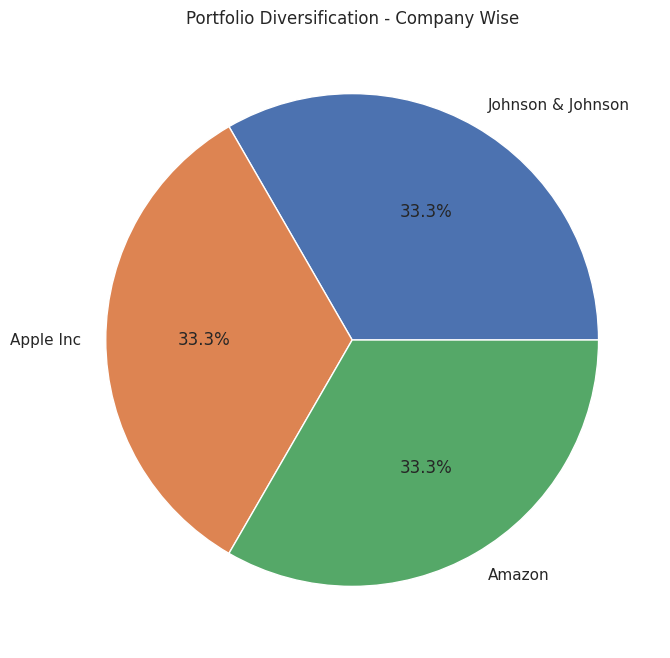

In [ ]:
# plot Portfolio distribution
pf_ticker = Ticker[Ticker.Ticker.isin(list(stock_outcome.index))]
pf_company = list(pf_ticker["Company Name"])

plt.pie(initial_weight,labels = pf_company,autopct='%1.1f%%')
plt.title("Portfolio Diversification - Company Wise")
plt.show()

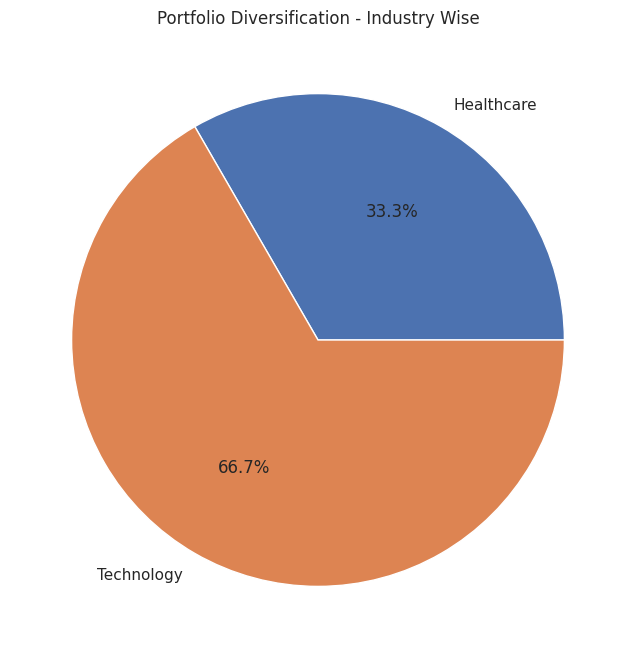

In [ ]:
#plot Portfolio distribution on an industry basis

pf_gpby_ind = pf_ticker.groupby("Industry").Ticker.count()

pf_industry = set(pf_ticker["Industry"])
pf_industry
plt.pie(pf_gpby_ind,labels = list(pf_gpby_ind.index),autopct='%1.1f%%')
plt.title("Portfolio Diversification - Industry Wise")
plt.show()

In [ ]:
#calculate portfolio daily returns

df_portfolio_daily = df_portfolio.pct_change(1)

# Dropping the rows with missing values
df_portfolio_daily = df_portfolio_daily.dropna(axis=0)
df_portfolio_daily.head()

JNJ      AAPL      AMZN
2010-10-04 -0.001296 -0.013734  0.010930
2010-10-05  0.018323  0.036965  0.035266
2010-10-06  0.006529  0.000865 -0.034003
2010-10-07  0.000158  0.000104  0.005599
2010-10-08  0.000158  0.016769 -0.004607

In [ ]:
#calculate mean of portfolio daily returns
allocated_daily_returns = (initial_weight * df_portfolio_daily.mean())

portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.000978007737603443


In [ ]:
# calculate portfolio daily returns and insert coloumn into daily returns table
df_portfolio_daily['Portfolio_Daily_Return'] = df_portfolio_daily.dot(initial_weight)
df_portfolio_daily.tail(5)

JNJ      AAPL      AMZN  Portfolio_Daily_Return
2020-09-24  0.001592  0.010269  0.006644                0.006168
2020-09-25  0.006843  0.037516  0.024949                0.023103
2020-09-28  0.009955  0.023869  0.025498                0.019774
2020-09-29 -0.000340 -0.007568 -0.009190               -0.005699
2020-09-30  0.012376  0.015076  0.001224                0.009559

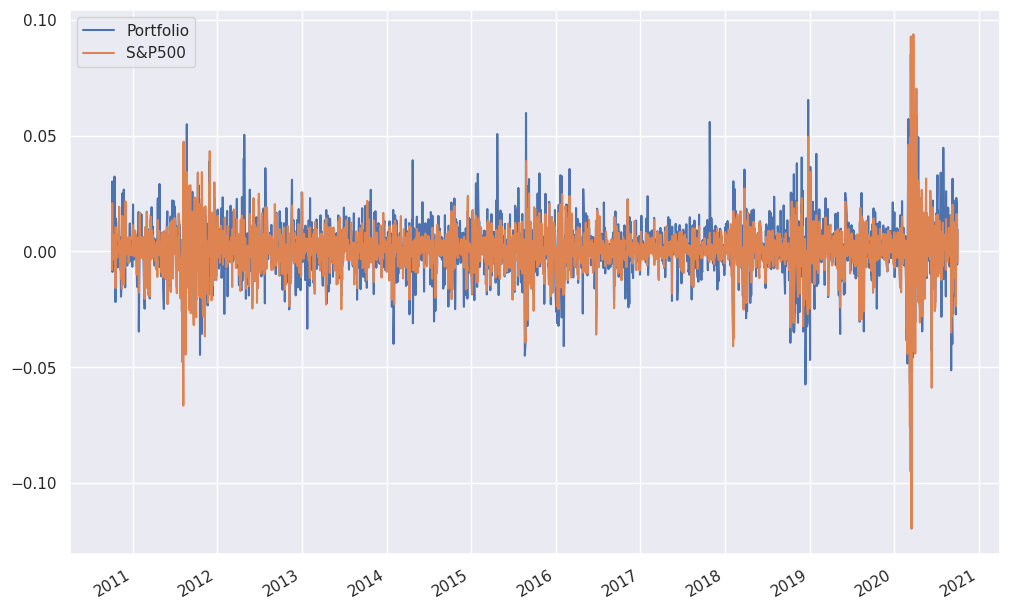

In [ ]:
# Visualise volatility of the portfolio compared to the index
df_portfolio_daily['Portfolio_Daily_Return'].plot(label ="Portfolio")
returns["SP500-Index"].plot(label = "S&P500")
plt.legend()
plt.show()

In [ ]:
# Cumulative return from the portfolio

Cumulative_returns_daily_pf = (1+df_portfolio_daily).cumprod()
Cumulative_returns_daily_pf.tail(5)

JNJ       AAPL       AMZN  Portfolio_Daily_Return
2020-09-24  2.342834  10.725471  19.646021                9.168449
2020-09-25  2.358866  11.127849  20.136164                9.380265
2020-09-28  2.382348  11.393459  20.649599                9.565749
2020-09-29  2.381538  11.307234  20.459825                9.511231
2020-09-30  2.411012  11.477700  20.484873                9.602146

In [ ]:
# Calculate cumulative returns
cum_returns_pf = round((Cumulative_returns_daily_pf.tail(1)-1)*100,2)
cum_returns_pf

JNJ     AAPL     AMZN  Portfolio_Daily_Return
2020-09-30  141.1  1047.77  1948.49                  860.21

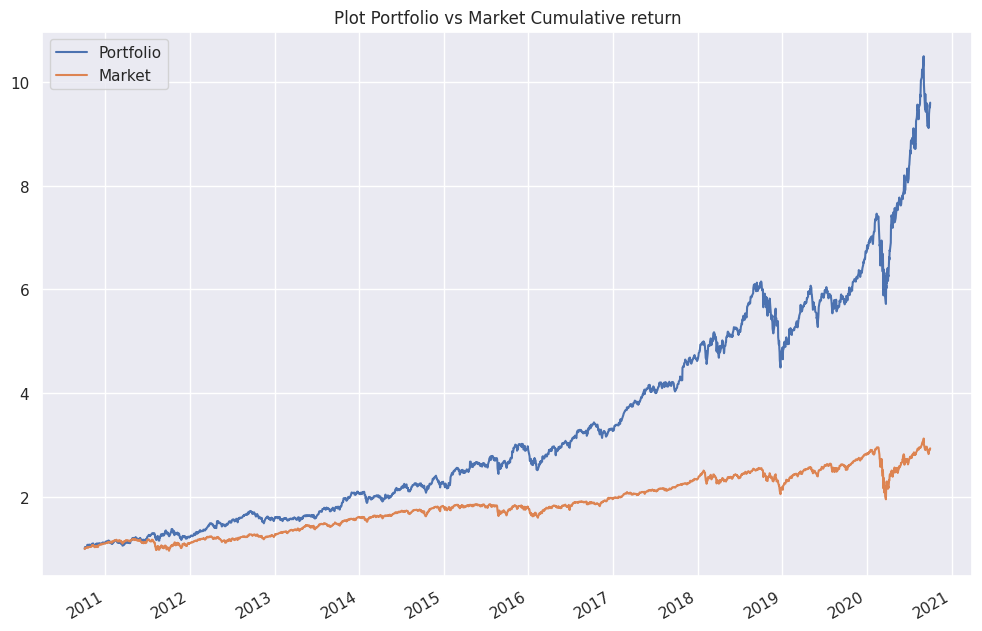

In [ ]:
#Plot portfolio daily returns over time
Cumulative_returns_daily_pf['Portfolio_Daily_Return'].plot(label="Portfolio")
cumulative_returns["SP500-Index"].plot(label="Market")
plt.title("Plot Portfolio vs Market Cumulative return")
plt.legend()
plt.show()

In [ ]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = df_portfolio_daily.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

JNJ      AAPL      AMZN
JNJ   0.029648  0.018014  0.017524
AAPL  0.018014  0.079115  0.038568
AMZN  0.017524  0.038568  0.099689

In [ ]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))
portfolio_variance

0.0396291753316009

In [ ]:
# Standard deviation (risk of portfolio)
portfolio_risk = round(np.sqrt(portfolio_variance)*100,2)
portfolio_risk

19.91

In [ ]:
# Altenate way of calculating Annualised Standard deviation of the portfolio
df_portfolio_daily['Portfolio_Daily_Return'].std()* np.sqrt(252)*100

19.907077970310187

In [ ]:
# Assuming that the risk free rate is .75%. Converting it to daily rate and applyin it to determine sharpe ratio of the portfolio
daily_risk_free_rate = ((1+.0075)**(1/365))-1
Sharpe_Ratio = (df_portfolio_daily['Portfolio_Daily_Return'].mean() -daily_risk_free_rate)/ df_portfolio_daily['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.07635684567887342

In [ ]:
#calculate annualised sharpe ratio
Annualised_Sharpe_Ratio = round((252**0.5)*Sharpe_Ratio,2)
Annualised_Sharpe_Ratio

1.21

In [ ]:
# Calculate Portfolio Beta using weights
stock_outcome_noIndex = stock_outcome.drop("SP500-Index")
Weighted_beta = (initial_weight * stock_outcome_noIndex.Beta)
portfolio_beta = round(np.sum(Weighted_beta),2)
portfolio_beta

0.91

In [ ]:
#Calculate expected value of the portfolio

market_annual = stock_outcome.loc["SP500-Index","Annualised Returns"]
Portfolio_expected_Value = round(.75 + portfolio_beta*(market_annual-.75),2)
Portfolio_expected_Value


11.26

In [ ]:
# Create a Portfolio Summary dataframe
portfolio_dict = {"Overall_Portfolio":"Portfolio Returns Summary","Portfolio Annualised Returns":round(df_portfolio_daily['Portfolio_Daily_Return'].mean()*100*252,2),"Portfolio Cumulative Returns":cum_returns_pf["Portfolio_Daily_Return"][0],"Portfolio_risk":portfolio_risk,"Portfolio Beta":[portfolio_beta],"Annualised_Sharpe_Ratio":[Annualised_Sharpe_Ratio],"Portfolio_expected_Value":[Portfolio_expected_Value]}
Portfolio_Summary = pd.DataFrame(portfolio_dict)
Portfolio_Summary.set_index("Overall_Portfolio")
Portfolio_Summary

Overall_Portfolio  Portfolio Annualised Returns  \
0  Portfolio Returns Summary                         24.65   

   Portfolio Cumulative Returns  Portfolio_risk  Portfolio Beta  \
0                        860.21           19.91            0.91   

   Annualised_Sharpe_Ratio  Portfolio_expected_Value  
0                     1.21                     11.26

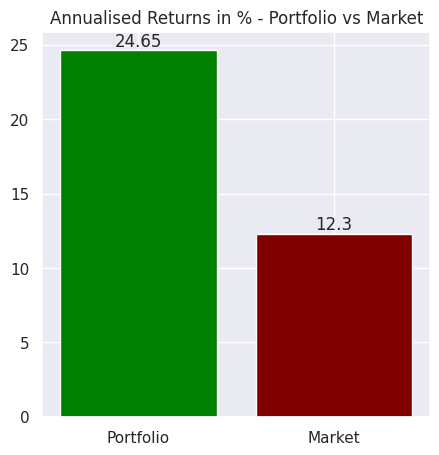

In [ ]:
#Visualise Annual return of Market and portfolio

plt.figure(figsize = (5, 5))
#fig, ax = plt.subplots()

pf_return = round(Portfolio_Summary.iloc[0]["Portfolio Annualised Returns"],2)
bar1 = plt.bar(["Portfolio"],[pf_return],color = "green")
plt.bar_label(bar1)

    
bar2 = plt.bar(["Market"],[round(market_annual,2)],color = "maroon")
plt.bar_label(bar2)
    
plt.title("Annualised Returns in % - Portfolio vs Market")
plt.show()


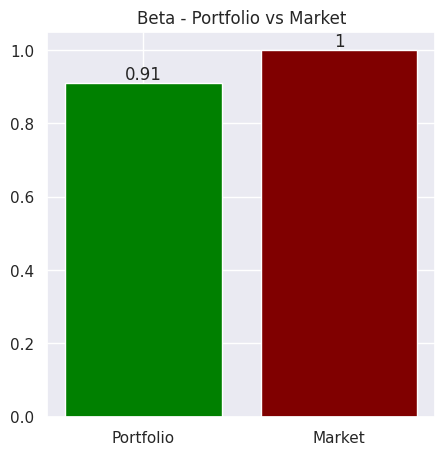

In [ ]:
#Visualise Beta of Market and portfolio

plt.figure(figsize = (5, 5))

pf_beta = Portfolio_Summary.iloc[0]["Portfolio Beta"]
market_beta = stock_outcome.loc["SP500-Index","Beta"]

bar1=plt.bar(["Portfolio"],[pf_beta],color ="green",align='center')
plt.bar_label(bar1)

bar2=plt.bar(["Market"],[market_beta],color ="maroon",align='center')
plt.bar_label(bar2)
plt.title("Beta - Portfolio vs Market")
plt.show()

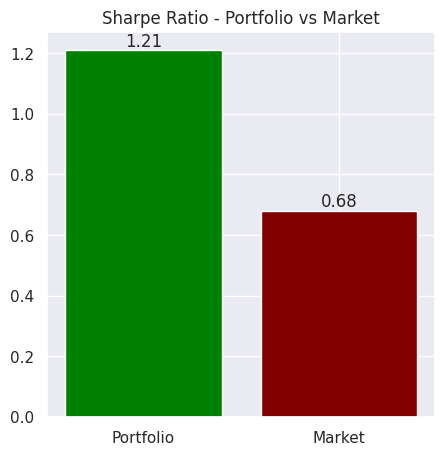

In [ ]:
#Visualise Sharpe Ratio of Market and portfolio
pf_Sharpe = Portfolio_Summary.iloc[0]["Annualised_Sharpe_Ratio"]
market_Sharpe = stock_outcome.loc["SP500-Index","Sharpe Ratio"]

plt.figure(figsize = (5, 5))

bar1=plt.bar(["Portfolio"],[pf_Sharpe],color="green")
plt.bar_label(bar1)
bar2=plt.bar(["Market"],[market_Sharpe],color="maroon")
plt.bar_label(bar2)


plt.title("Sharpe Ratio - Portfolio vs Market")
plt.show()

In [ ]:
#Visualise Annualised Risk of Market and portfolio
pf_sd = Portfolio_Summary.iloc[0]["Portfolio_risk"]
market_sd = stock_outcome.loc["SP500-Index","Annualised Risk-Standard Deviation"]

plt.figure(figsize = (5, 5))

bar1=plt.bar(["Portfolio"],[pf_sd],color="green")
plt.bar_label(bar1)
bar2=plt.bar(["Market"],[market_sd],color="maroon")
plt.bar_label(bar2)


plt.title("Annualised Risk in % - Portfolio vs Market")
plt.show()

In [ ]:
#Visualise Sharpe Ratio of Market and portfolio
pf_er = round(Portfolio_Summary.iloc[0]["Portfolio_expected_Value"],2)
market_er = round(stock_outcome.loc["SP500-Index","Expected Returns"],2)

plt.figure(figsize = (5, 5))

bar1=plt.bar(["Portfolio"],[pf_er],color="green")
plt.bar_label(bar1)
bar2=plt.bar(["Market"],[market_er],color="maroon")
plt.bar_label(bar2)


plt.title("Extected Returns in % - Portfolio vs Market")
plt.show()

## 4.Time Series Forcasting to estimate returns

### 4.1 Evaluate the dataset

In [ ]:
#store stock prices for each stock in portfolio as a seperate dataframe
df_name =[]
for ticker in stock_outcome.index:
    if ticker != "SP500-Index":
        df_name.append(ticker)
df_name

['JNJ', 'AAPL', 'AMZN']

In [ ]:
#Store all the stock prices for stocks in the portfolio in a dataframe
portfolio_prices = prices[df_name]
portfolio_prices.head()

JNJ       AAPL        AMZN
2010-10-01  61.750000  10.090000  153.710007
2010-10-04  61.669998   9.951428  155.389999
2010-10-05  62.799999  10.319285  160.869995
2010-10-06  63.209999  10.328215  155.399994
2010-10-07  63.220001  10.329286  156.270004

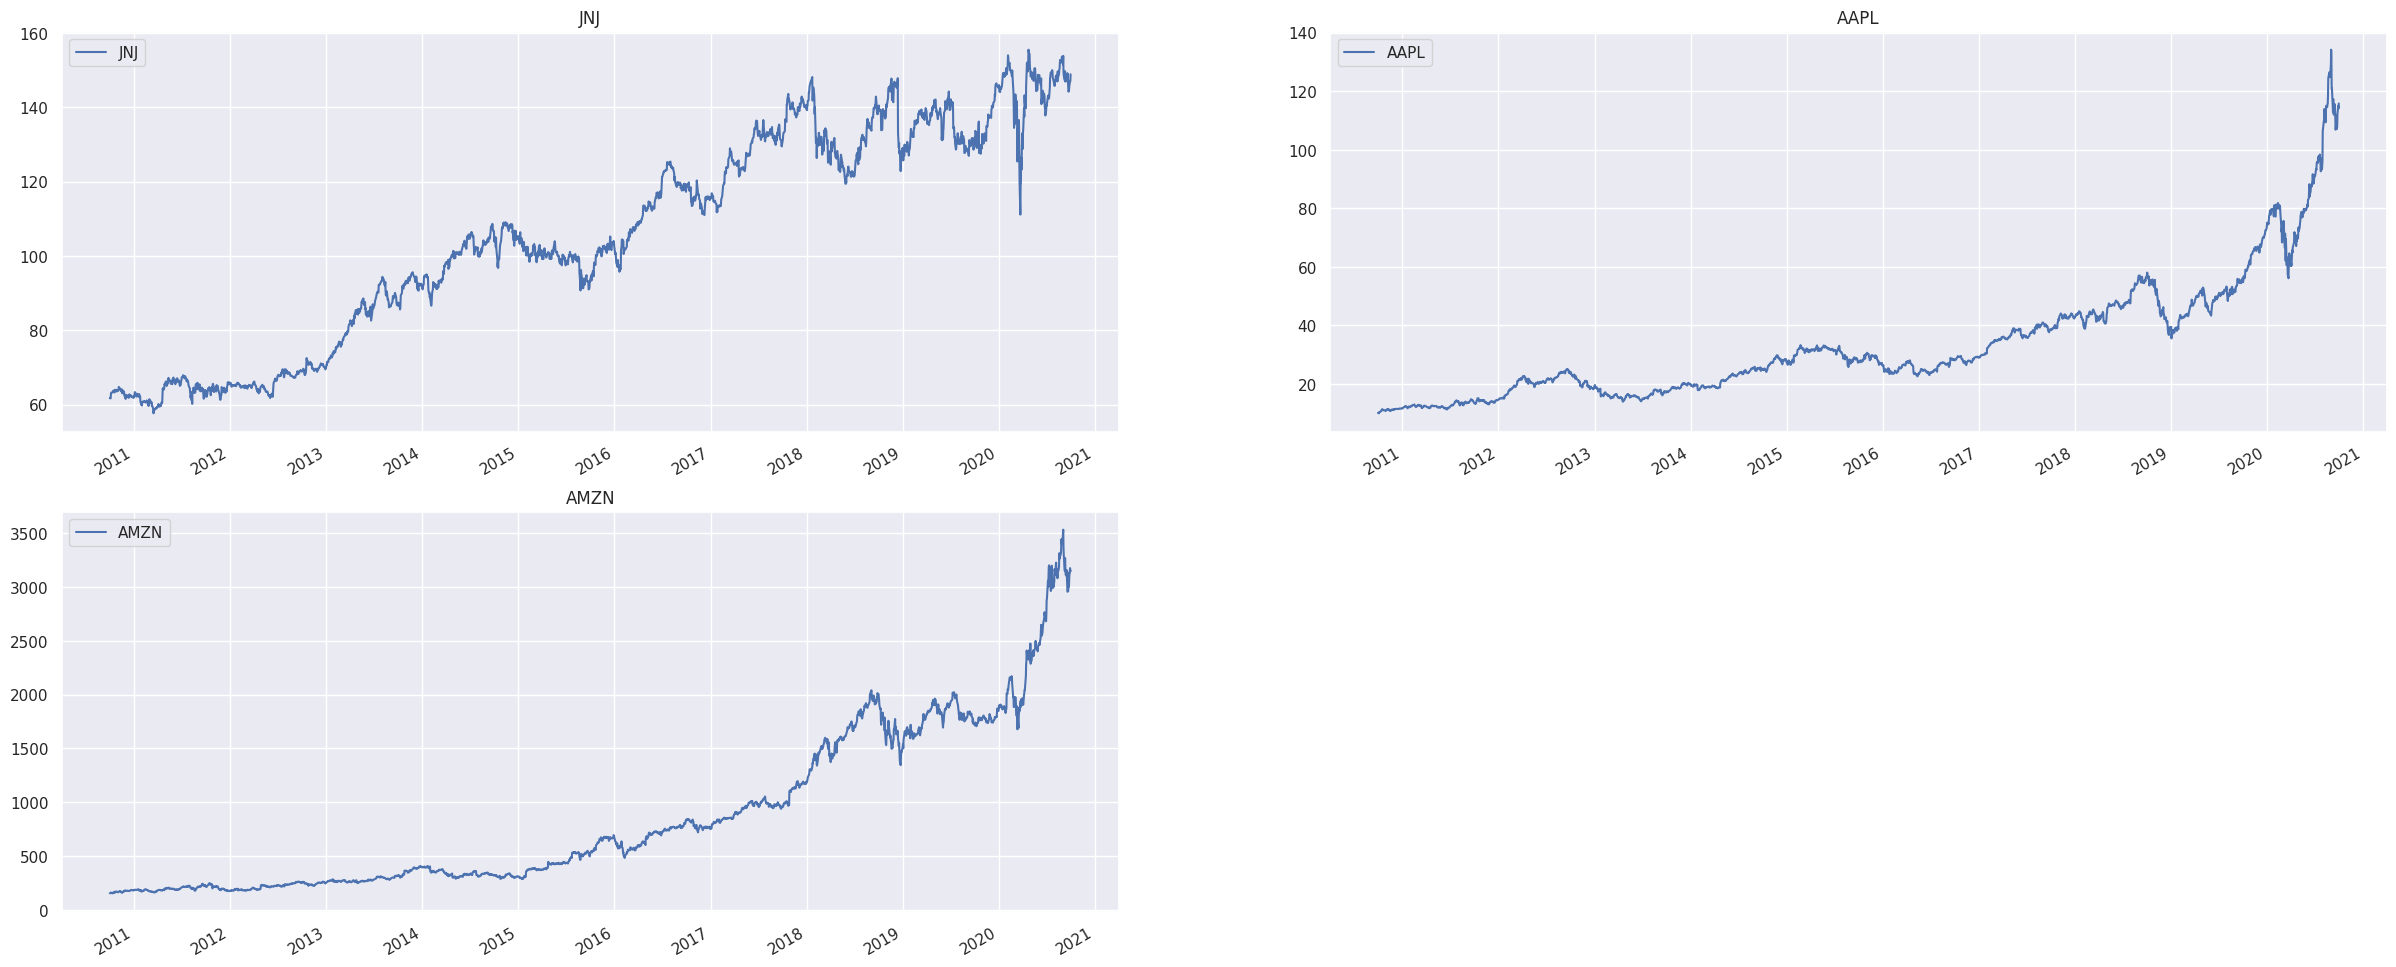

In [ ]:
#Plot Stock price trends for all stocks in the portfolio

plt_1 = plt.figure(figsize=(30, 20))

i =1

for ticker in stock_outcome.index:
  if ticker != "SP500-Index":
    plt.subplot(3,2,i)
    portfolio_prices[ticker].plot()
    plt.title(label =ticker)
    plt.legend()
    i+=1

plt.show()

In [ ]:
# Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

for ticker in portfolio_prices.columns:
    adf_test = adfuller(portfolio_prices[ticker])

    print(ticker)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

JNJ
ADF Statistic: -0.940294
Critical Values @ 0.05: -2.86
p-value: 0.774414

Series is Non-Stationary

--------------------------------------

AAPL
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------

AMZN
ADF Statistic: 2.739671
Critical Values @ 0.05: -2.86
p-value: 0.999088

Series is Non-Stationary

--------------------------------------



In [ ]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for ticker in portfolio_prices.columns:
    kpss_test = kpss(portfolio_prices[ticker])
    
    print(ticker)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

JNJ
KPSS Statistic: 7.880246
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

AAPL
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

AMZN
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

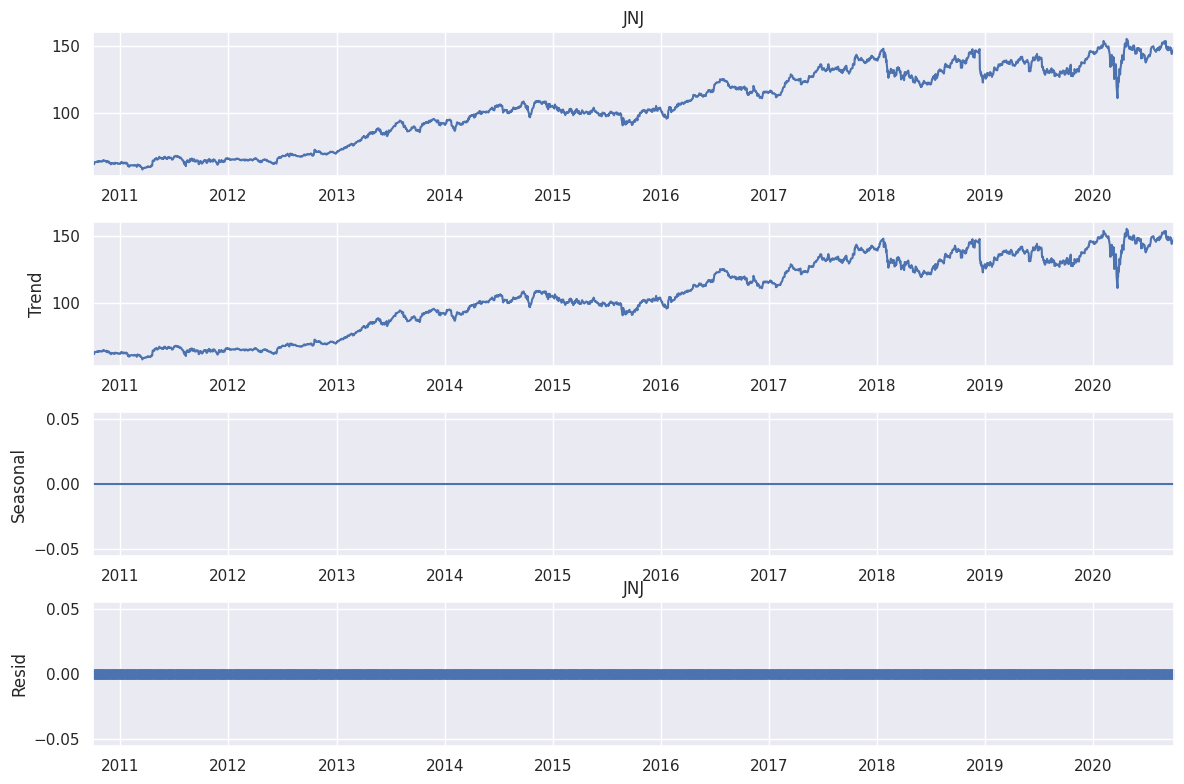

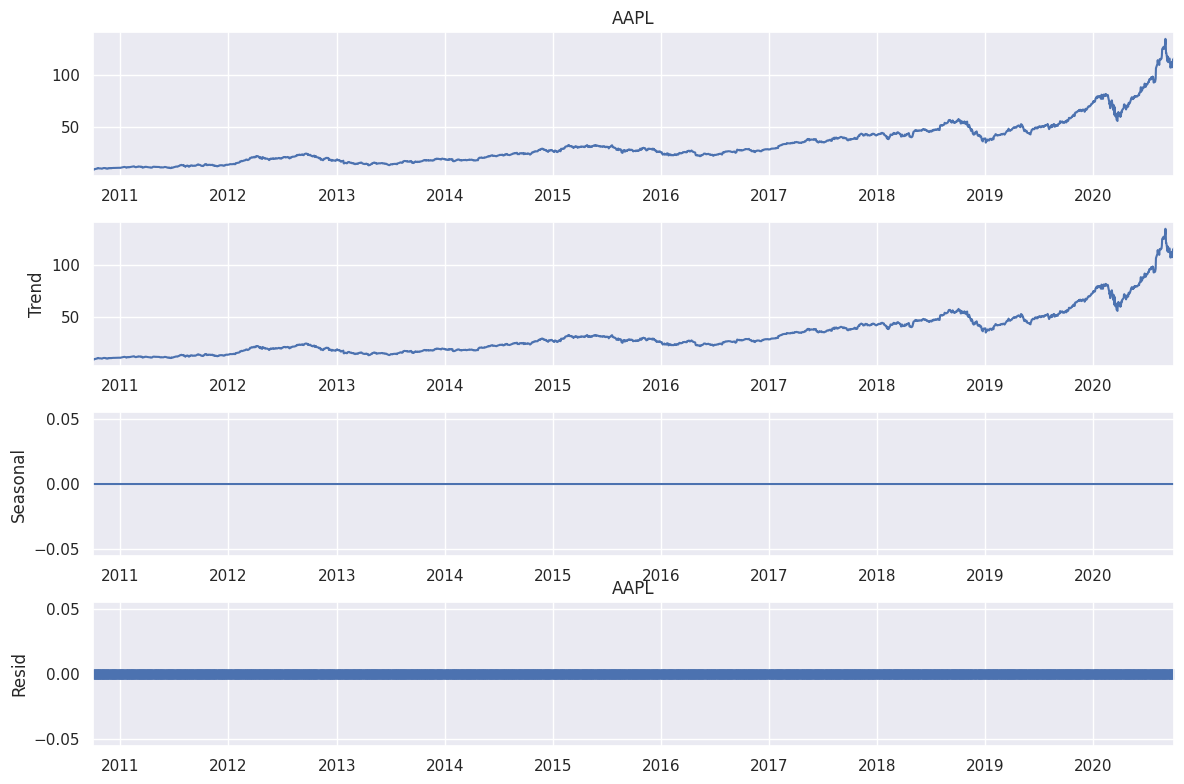

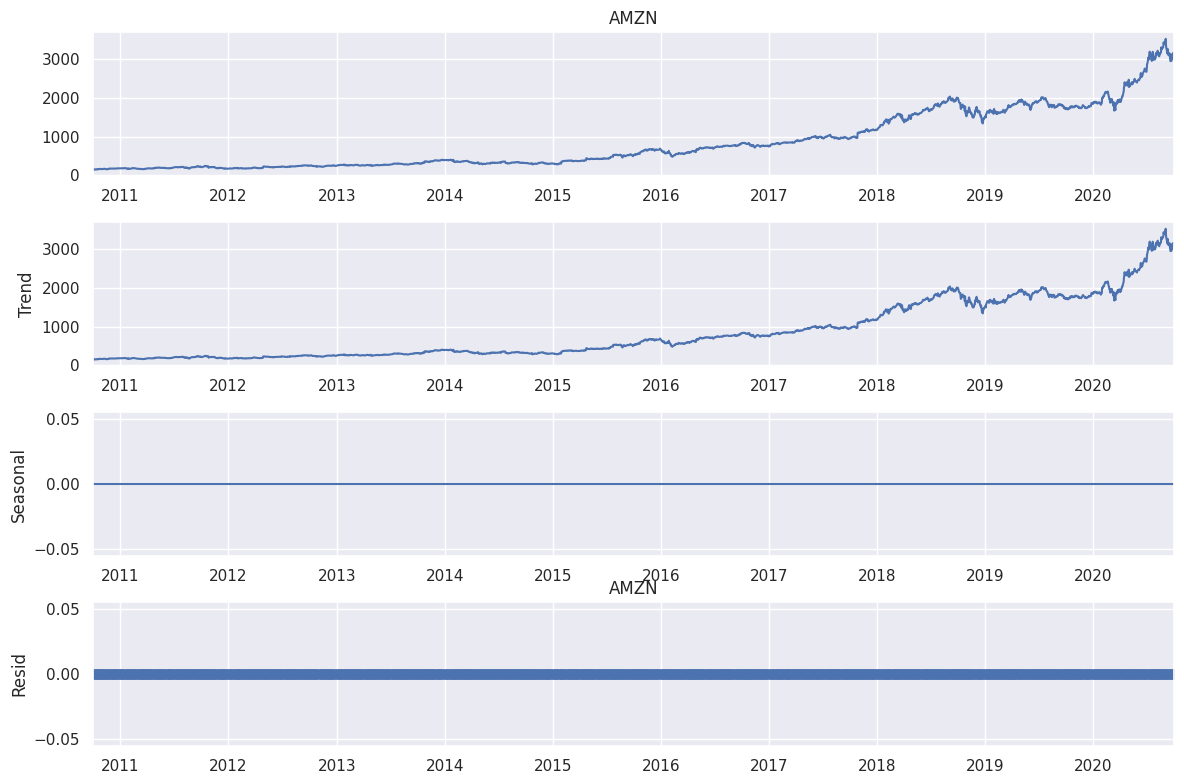

In [ ]:
# Additive seasonal decomposition for all stocks
for ticker in portfolio_prices.columns:
    rcParams['figure.figsize'] = 12, 8
    add_result = seasonal_decompose(portfolio_prices[ticker], model='additive', period =1) # additive seasonal index
    fig = add_result.plot()
    plt.title(ticker)
    plt.show()

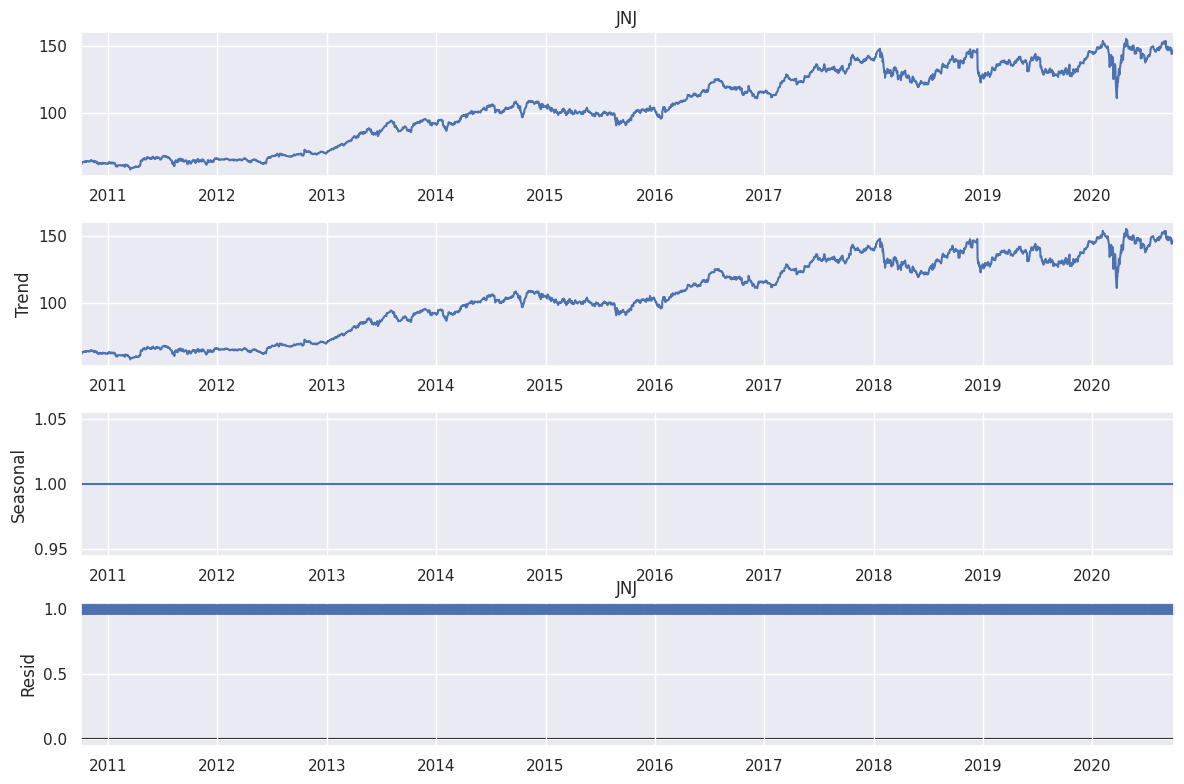

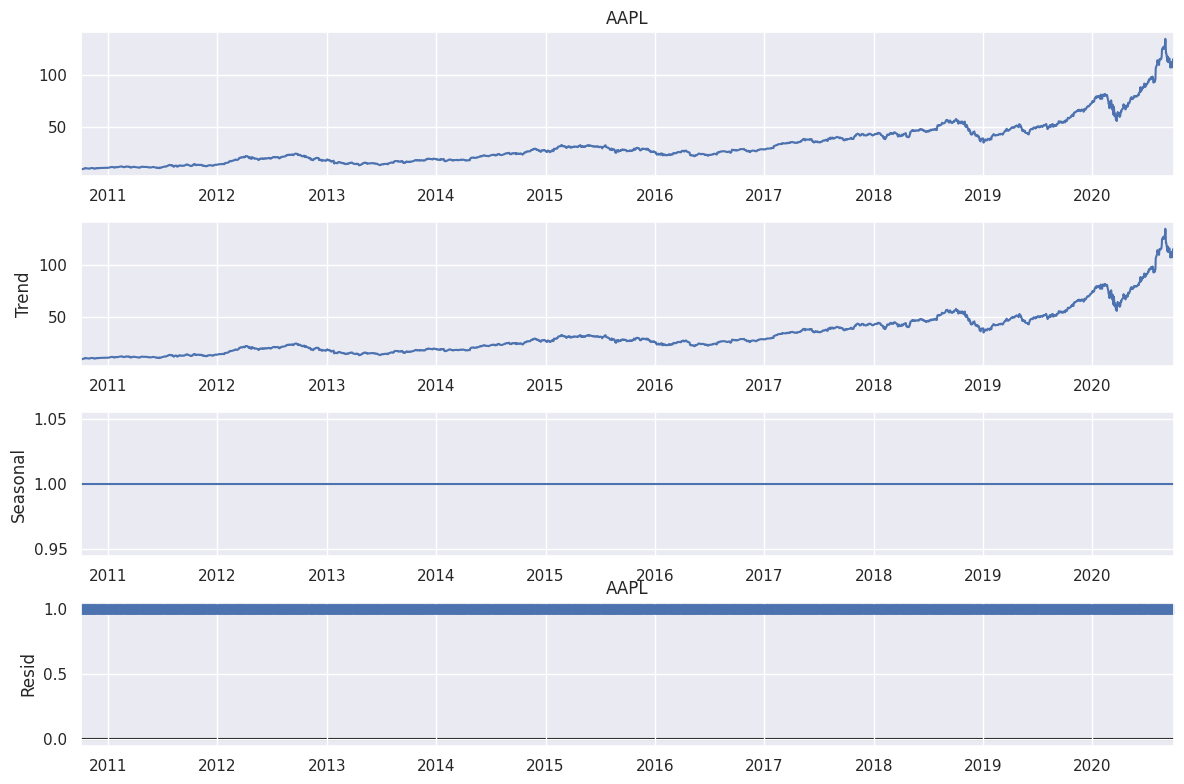

In [ ]:
# Multiplicative seasonal decomposition for J&J
for ticker in portfolio_prices.columns:
    mul_result = seasonal_decompose(portfolio_prices[ticker], model='multiplicative', period=1) # multiplicative seasonal index
    fig = mul_result.plot()
    plt.title(ticker)
    plt.show()

In [ ]:
# Keeping 70% values as train

train_len = int(portfolio_prices.shape[0]*0.7)
test_len = int(portfolio_prices.shape[0]) - int(portfolio_prices.shape[0]*0.7)

# Train data
train = portfolio_prices[:train_len] 

# Test data
test = portfolio_prices[train_len:]


In [ ]:
#Import prophet library
from prophet import Prophet

In [ ]:
import logging
logging.getLogger('prophet').disabled = True 

In [ ]:
#Find out holidays within the time period
#x = pd.date_range(start = '2010-10-01', end = '2020-09-30' ).difference(portfolio_prices.index)

#holiday_index = x[(x.weekday !=5) & (x.weekday !=6)]

#holidays = pd.DataFrame({'holiday':"Market Holiday",'ds':holiday_index})
#holidays.tail(20)

### 4.2 Holts Exponential smoothening

#### 4.2.1 Build and Plot Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model for all stocks in portfolio
holt_dict={}
for ticker in df_name:
  hws_model = ExponentialSmoothing(np.asarray(train[ticker]) ,seasonal_periods=12 ,trend='additive', seasonal=None)
  hws_model_fit = hws_model.fit(optimized=True)

  holt = pd.DataFrame(test[ticker])
  holt['holt_forecast'] = hws_model_fit.forecast(len(test))
  holt_dict[ticker] = holt
#  holt.index = pd.to_datetime(holt.index,format="%Y-%m-%d")

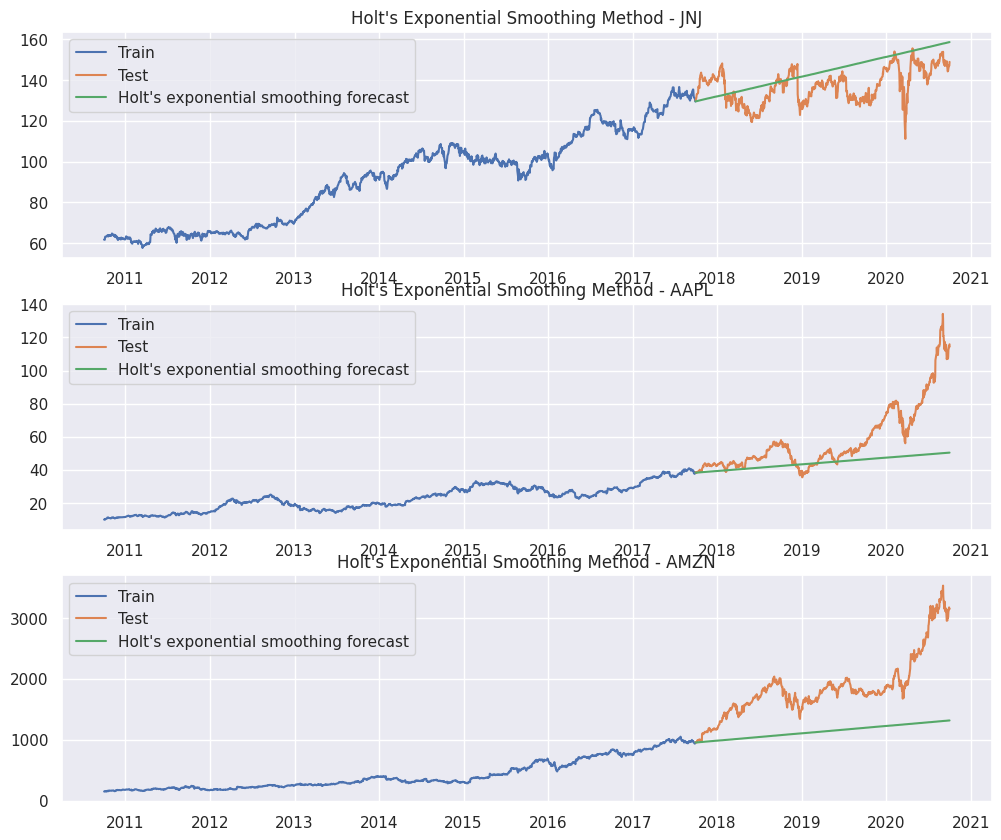

In [ ]:
# Plot train, test and forecast

# Plot train, test and forecast for all stock in the portfolio

plt.figure(figsize=(12,10))
i=1
for ticker in df_name:
  plt.subplot(3,1,i)
  plt.plot(train[ticker], label='Train')
  plt.plot(test[ticker], label='Test')
  plt.plot(holt_dict[ticker]['holt_forecast'], label='Holt\'s exponential smoothing forecast')
  plt.legend(loc='best')
  plt.title('Holt\'s Exponential Smoothing Method - '+ticker)
  i+=1

plt.show()

#### 4.2.2 Evaluate Model

In [ ]:
# Calculate RSME and MAPE

from sklearn.metrics import mean_squared_error

In [ ]:
# RMSE & MAPE for Holt's exponential smoothing method


mape_list =[]
rmse_list =[]

for key in df_name:
  mape = 0
  rmse = np.sqrt(mean_squared_error(test[key], holt_dict[key]['holt_forecast']))
  mape = np.mean(np.abs(test[key]-holt_dict[key]['holt_forecast'])/test[key])*100
  mape_list.append(mape)
  rmse_list.append(rmse)

ts_results = pd.DataFrame(df_name,columns=["Ticker"])
ts_results['MAPE-Holt'] = mape_list
ts_results['RMSE-Holt'] = rmse_list
ts_results



Ticker  MAPE-Holt   RMSE-Holt
0    JNJ   6.912712   10.961783
1   AAPL  19.595583   22.187606
2   AMZN  35.986727  839.526436

### 4.3 AR Model

#### 4.3.1 Transform Dataset

In [ ]:
# Box Cox transformation to make variance constant

from scipy.stats import boxcox

plt.figure(figsize=(12,4))

df_boxcox_dict ={}

for key in df_name:
  df_boxcox_dict[key] = pd.Series(boxcox(portfolio_prices[key], lmbda=0), index = portfolio_prices.index)
  plt.plot(df_boxcox_dict[key], label='After Box Cox tranformation')
  plt.legend(loc='best')
  plt.title(ticker+" - After Box Cox transform-Amazon")
plt.show()

In [ ]:
# Differencing to remove trend

plt.figure(figsize=(15,10))
df_boxcox_diff_dict ={}
for key in df_name:
  df_boxcox_diff_dict[key] = pd.Series(df_boxcox_dict[key] - df_boxcox_dict[key].shift(), portfolio_prices.index)
  plt.plot(df_boxcox_diff_dict[key], label=key+' - After Box Cox tranformation and differencing')
  plt.legend(loc='best')
  plt.title('After Box Cox transform and differencing')
plt.show()

In [ ]:
#drop null values after transformation is completed
for key in df_name:
  df_boxcox_diff_dict[key].dropna(inplace=True)

In [ ]:
# Augmented Dickey-Fuller (ADF) test

for ticker in portfolio_prices.columns:
  adf_test = adfuller(df_boxcox_diff_dict[ticker])

  print(ticker)
  print('ADF Statistic: %f' % adf_test[0])
  print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
  print('p-value: %f' % adf_test[1])
    
  if adf_test[1] >= 0.05:
    print("\nSeries is Non-Stationary")
  else:
    print("\nSeries is Stationary\n")
        
print('\n--------------------------------------\n')

JNJ
ADF Statistic: -14.664632
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

AAPL
ADF Statistic: -9.886806
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary

AMZN
ADF Statistic: -51.444151
Critical Values @ 0.05: -2.86
p-value: 0.000000

Series is Stationary


--------------------------------------



In [ ]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns


for ticker in portfolio_prices.columns:
    kpss_test = kpss(df_boxcox_diff_dict[ticker])
    
    print(ticker)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

JNJ
KPSS Statistic: 0.041129
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------

AAPL
KPSS Statistic: 0.119326
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------

AMZN
KPSS Statistic: 0.062235
Critical Values @ 0.05: 0.46
p-value: 0.100000

Series is Stationary

--------------------------------------



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
df_boxcox_diff_dict["AAPL"].isnull().sum()

0

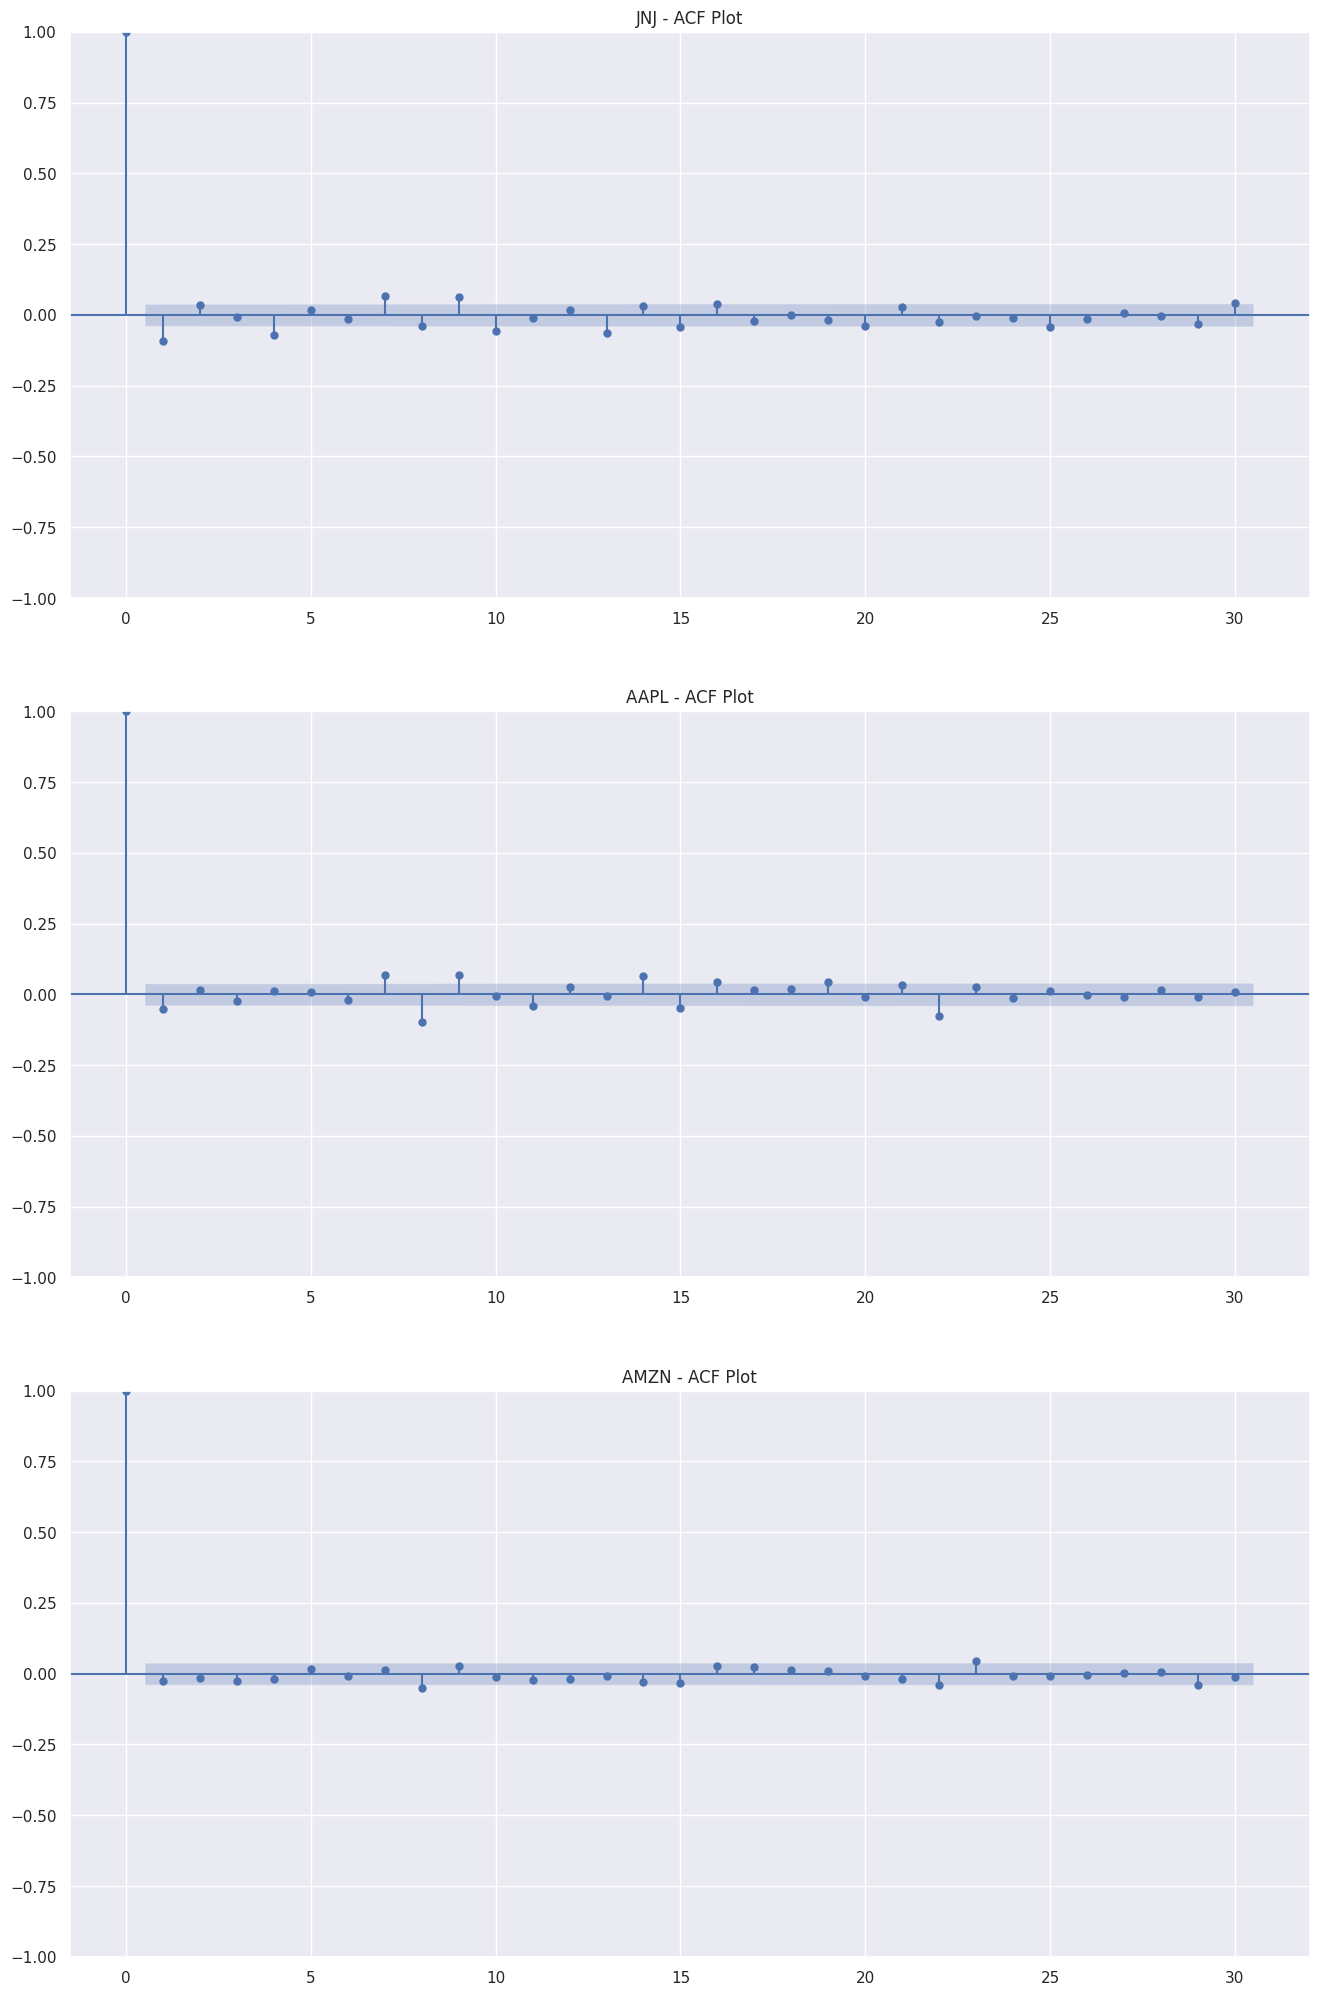

In [ ]:
#plot ACF for all the stock in the portfolio
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(16,25))

i=1
for key in df_name:
  plt.subplot(3,1,i)
  plot_acf(df_boxcox_diff_dict[key], ax=plt.gca(), lags = 30)
  plt.title(key+" - ACF Plot")
  i+=1
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


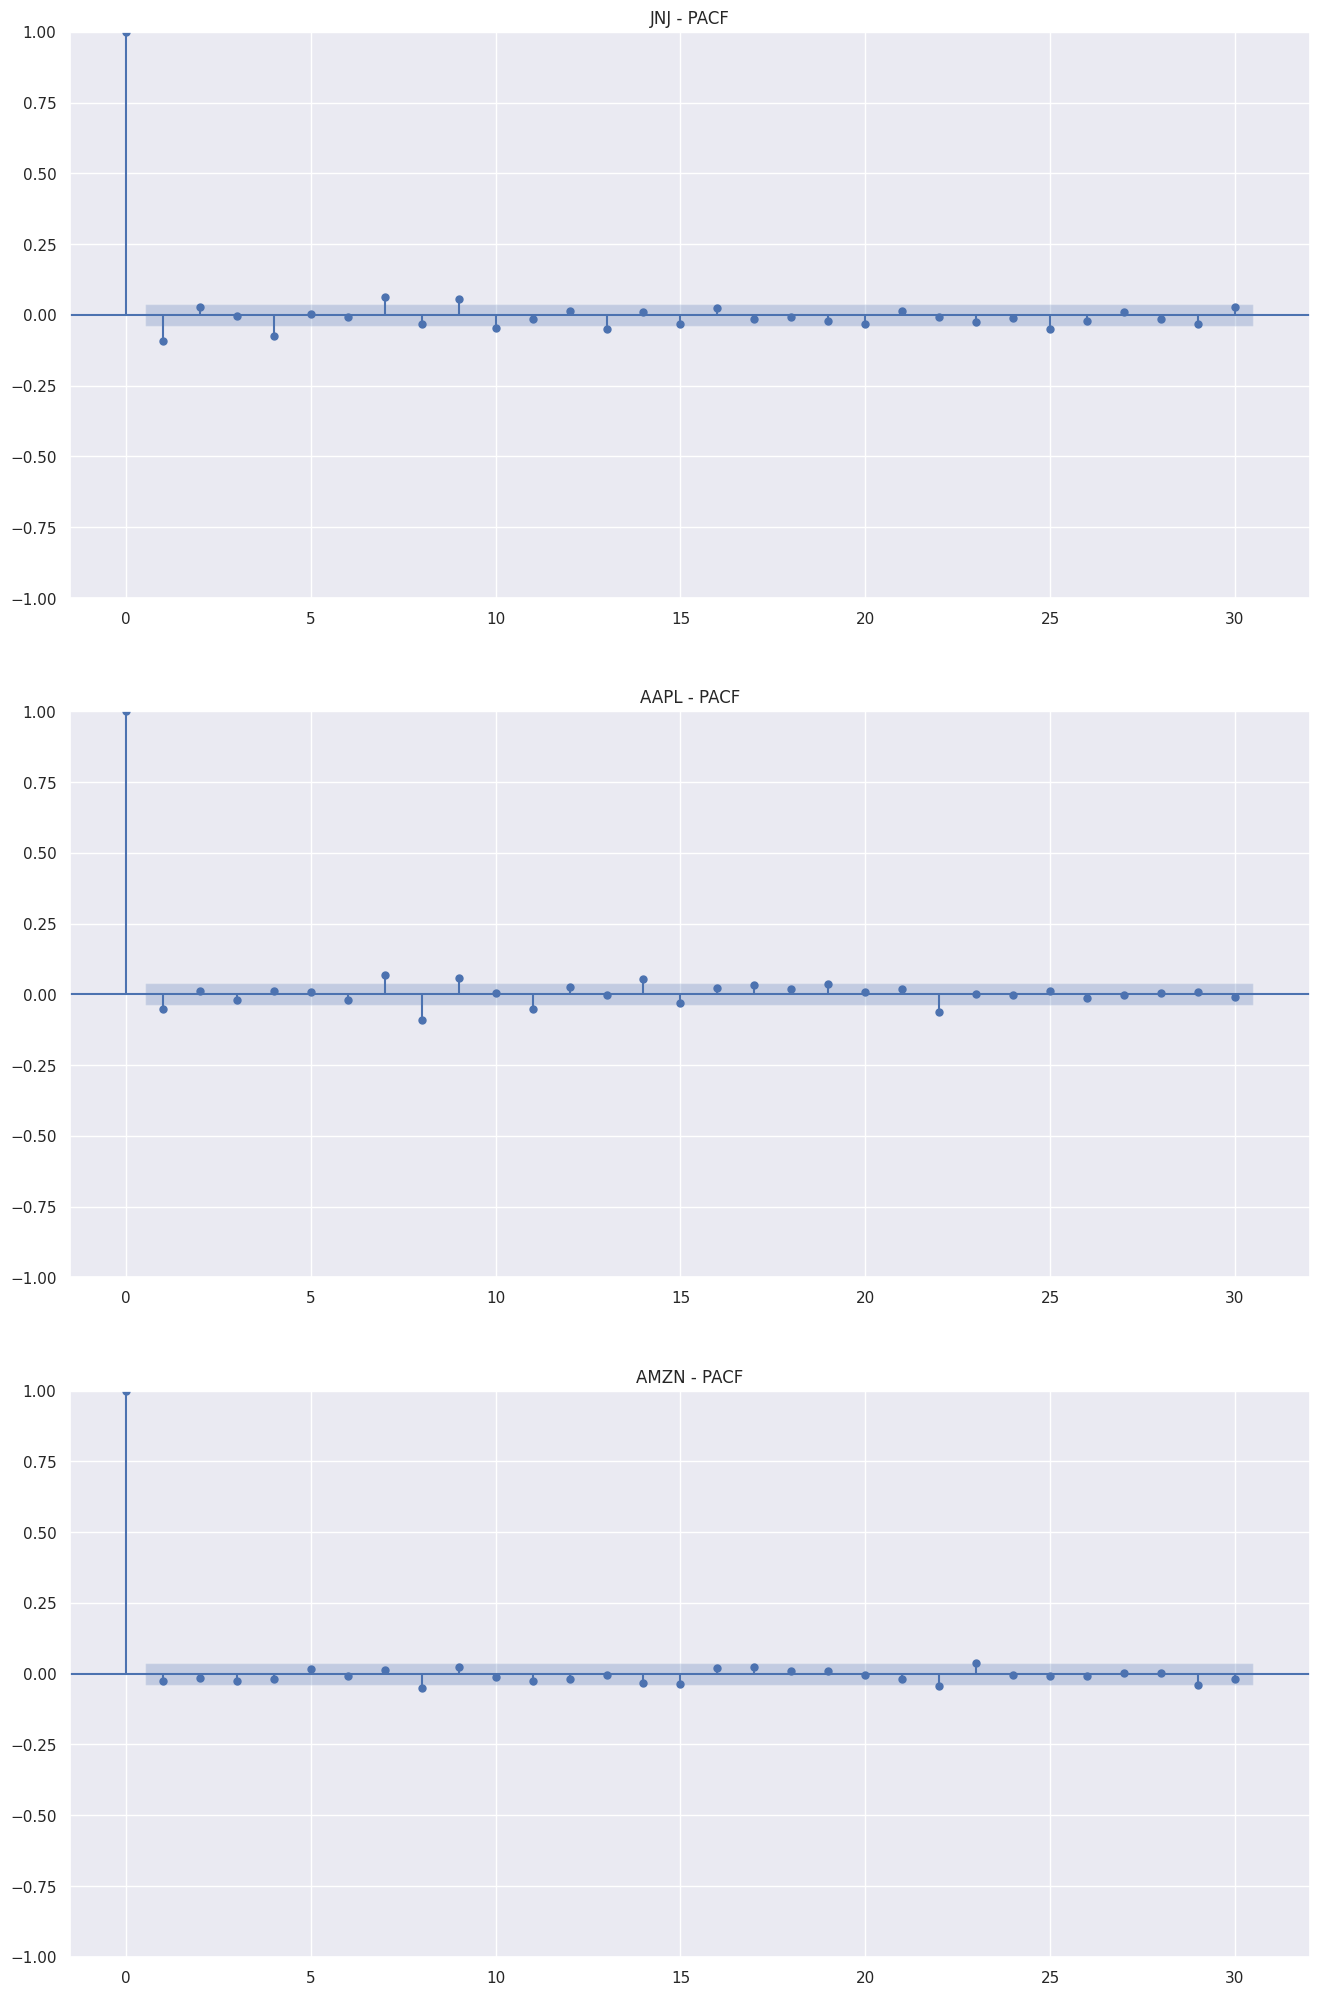

In [ ]:
# Plot PACF for all the stock in the portfolio
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(16,25))
i =1 

for key in df_name:
  plt.subplot(3,1,i)
  plot_pacf(pd.DataFrame(df_boxcox_diff_dict[key]), ax=plt.gca(), lags = 30)
  i+=1
  plt.title(key+' - PACF')
plt.show()

In [ ]:
# Test-Train Split of differentiated data

train_df_boxcox_dict = {}
test_df_boxcox_dict ={}
train_df_boxcox_diff_dict = {}
test_df_boxcox_diff_dict = {}


for key in df_name:
  train_df_boxcox = pd.DataFrame(df_boxcox_dict[key][:train_len])
  test_df_boxcox = pd.DataFrame(df_boxcox_dict[key][train_len:])
  train_df_boxcox_diff = pd.DataFrame(df_boxcox_diff_dict[key][:train_len-1])
  test_df_boxcox_diff = pd.DataFrame(df_boxcox_diff_dict[key][train_len-1:])

  train_df_boxcox_dict[key] = train_df_boxcox
  test_df_boxcox_dict[key] = test_df_boxcox
  train_df_boxcox_diff_dict[key] = train_df_boxcox_diff
  test_df_boxcox_diff_dict[key] = test_df_boxcox_diff

#### 4.3.2 Build and Plot Model

In [ ]:
# Import ARIMA library and fit the model
from statsmodels.tsa.arima.model import ARIMA

ar_dict = {}

for key in df_name:
  ar_model = ARIMA(train_df_boxcox_diff_dict[key], order=(1, 0, 0)) 
  ar_model_fit = ar_model.fit()
  print(ar_model_fit.params,"\n")

  # Recover original time series
  ar = pd.DataFrame()
  ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(start=1,end=(train.shape[0]+test.shape[0]-1),dynamic=False)
  
  ar['ds'] = df_boxcox_diff_dict[key].index
  ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox_diff'].cumsum()
  ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox'].add(df_boxcox_dict[key][0])
  ar['ar_forecast'] = np.exp(ar['ar_forecast_boxcox'])
  ar.set_index(['ds'],inplace=True)
  ar_dict[key] = ar


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000420
ar.L1    -0.044845
sigma2    0.000076
dtype: float64 

const     0.000758
ar.L1     0.019770
sigma2    0.000252
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/pytho

const     0.001037
ar.L1    -0.001730
sigma2    0.000378
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


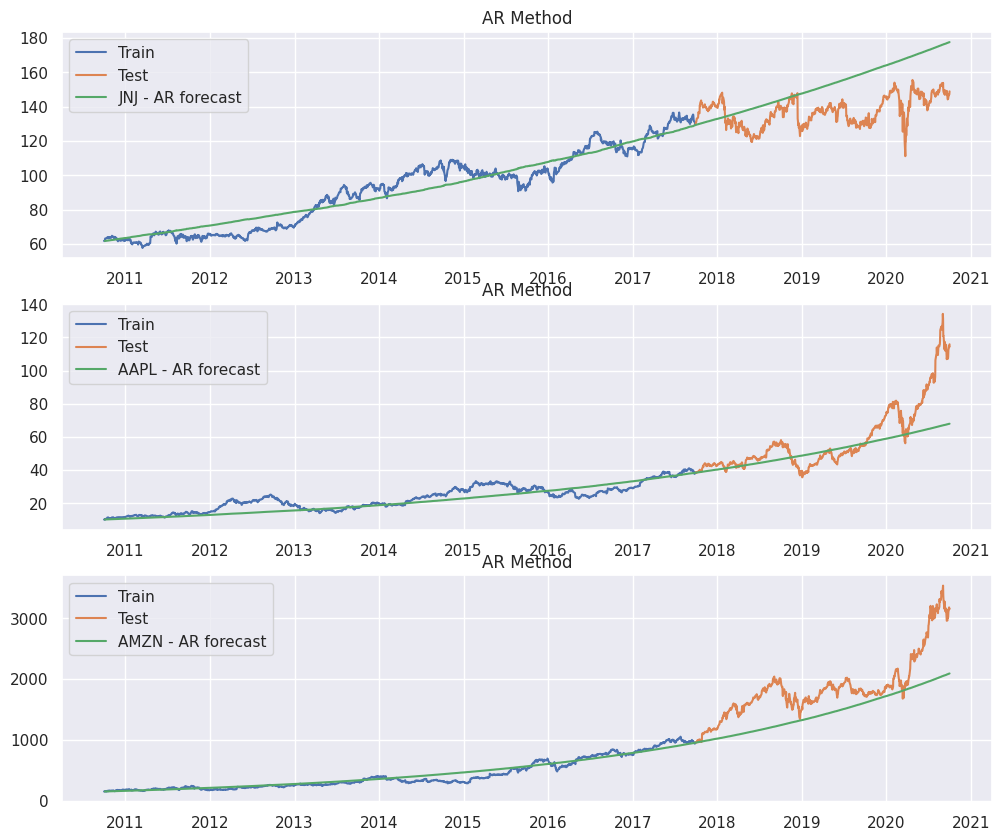

In [ ]:
plt.figure(figsize=(12,10))

i=1
for ticker in df_name:
  plt.subplot(3,1,i)
  plt.plot(train[ticker], label='Train')
  plt.plot(test[ticker], label='Test')
  plt.plot(ar_dict[ticker]['ar_forecast'], label=ticker+' - AR forecast')
  plt.legend(loc='best')
  plt.title('AR Method')
  i=i+1
plt.show()

#### 4.3.3 Evaluate Model

In [ ]:
# RMSE & MAPE for AR method


mape_list =[]
rmse_list =[]

for key in df_name:

  rmse = np.sqrt(mean_squared_error(test[key], ar_dict[key]['ar_forecast'][len(train)-1:]))
  mape = np.mean(np.abs(test[key]-ar_dict[key]['ar_forecast'][len(train)-1:])/test[key])*100
  mape_list.append(mape)
  rmse_list.append(rmse)

ts_results['MAPE-AR'] = mape_list
ts_results['RMSE-AR'] = rmse_list
ts_results

Ticker  MAPE-Holt   RMSE-Holt    MAPE-AR     RMSE-AR
0    JNJ   6.912712   10.961783  12.413046   19.417634
1   AAPL  19.595583   22.187606  13.105809   15.141553
2   AMZN  35.986727  839.526436  20.820777  504.797717

### 4.4 MA Model

#### 4.4.1 Build and Plot Model

In [ ]:
# Plot train, test and forecast


ma_dict = {}

for key in df_name:
  ma_model = ARIMA(train_df_boxcox_diff_dict[key], order=(0, 0, 1)) 
  ma_model_fit = ma_model.fit()
  print(ma_model_fit.params,"\n")

  # Recover original time series
  ma = pd.DataFrame()
  ma['ma_forecast_boxcox_diff'] = ma_model_fit.predict(start=1,end=(train.shape[0]+test.shape[0]-1),dynamic=False)
  
  ma['ds'] = df_boxcox_diff_dict[key].index
  ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox_diff'].cumsum()
  ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox'].add(df_boxcox_dict[key][0])
  ma['ma_forecast'] = np.exp(ma['ma_forecast_boxcox'])
  ma.set_index(['ds'],inplace=True)
  ma_dict[key] = ma

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000421
ma.L1    -0.045038
sigma2    0.000076
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000755
ma.L1     0.020891
sigma2    0.000251
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.001036
ma.L1    -0.001363
sigma2    0.000378
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


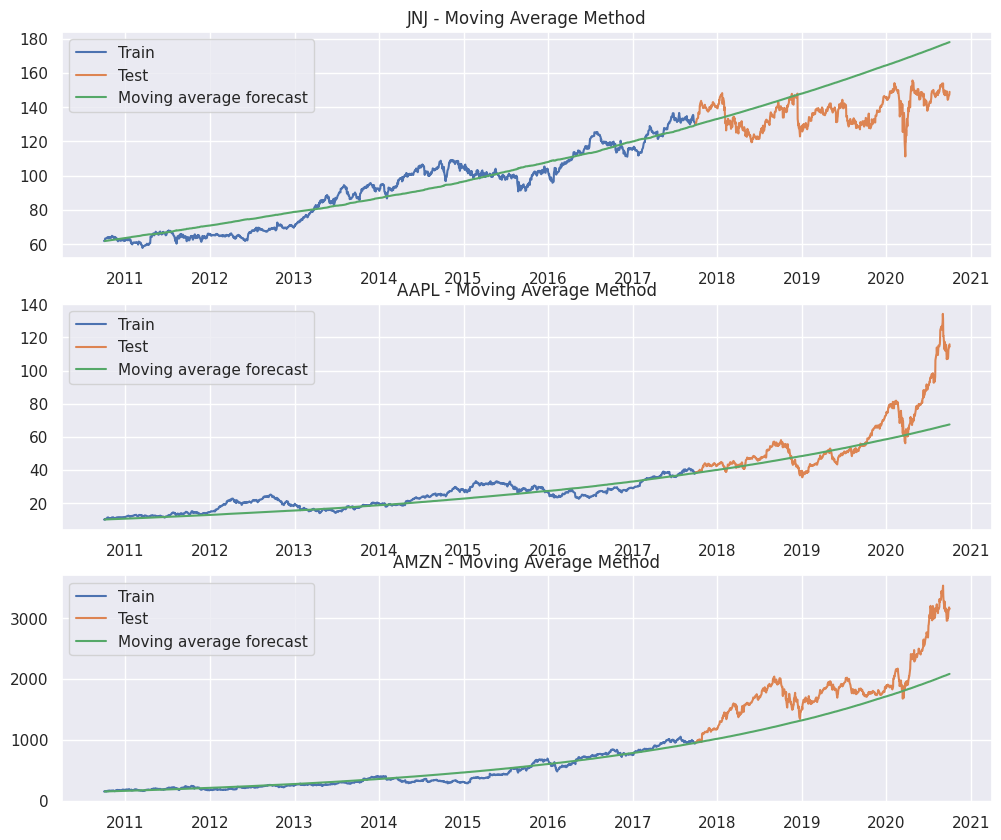

In [ ]:
plt.figure(figsize=(12,10))

i=1
for ticker in df_name:
  plt.subplot(3,1,i)
  plt.plot(train[ticker], label='Train')
  plt.plot(test[ticker], label='Test')
  plt.plot(ma_dict[ticker]['ma_forecast'], label='Moving average forecast')
  plt.legend(loc='best')
  plt.title(ticker+' - Moving Average Method')
  i=i+1
plt.show()

#### 4.4.2 Evaluate Model

In [ ]:
# RMSE & MAPE for Holt's exponential smoothing method


mape_list =[]
rmse_list =[]

for key in df_name:

  rmse = np.sqrt(mean_squared_error(test[key], ma_dict[key]['ma_forecast'][len(train)-1:]))
  mape = np.mean(np.abs(test[key]-ma_dict[key]['ma_forecast'][len(train)-1:])/test[key])*100
  mape_list.append(mape)
  rmse_list.append(rmse)

ts_results['MAPE-MA'] = mape_list
ts_results['RMSE-MA'] = rmse_list
ts_results

Ticker  MAPE-Holt   RMSE-Holt    MAPE-AR     RMSE-AR    MAPE-MA     RMSE-MA
0    JNJ   6.912712   10.961783  12.413046   19.417634  12.570362   19.646875
1   AAPL  19.595583   22.187606  13.105809   15.141553  13.235911   15.312509
2   AMZN  35.986727  839.526436  20.820777  504.797717  21.042876  508.548136

### 4.5 ARMA Model

#### 4.5.1 Build and Plot Model

In [ ]:
# Plot train, test and forecast

arma_dict = {}

for key in df_name:
  arma_model = ARIMA(train_df_boxcox_diff_dict[key], order=(1, 0, 1)) 
  arma_model_fit = arma_model.fit()
  print(arma_model_fit.params,"\n")

  # Recover original time series
  arma = pd.DataFrame()
  arma['arma_forecast_boxcox_diff'] = arma_model_fit.predict(start=1,end=(train.shape[0]+test.shape[0]-1),dynamic=False)
  
  arma['ds'] = df_boxcox_diff_dict[key].index
  arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox_diff'].cumsum()
  arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox'].add(df_boxcox_dict[key][0])
  arma['arma_forecast'] = np.exp(arma['arma_forecast_boxcox'])
  arma.set_index(['ds'],inplace=True)
  arma_dict[key] = arma

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000421
ar.L1    -0.278299
ma.L1     0.233264
sigma2    0.000076
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000755
ar.L1     0.231544
ma.L1    -0.210654
sigma2    0.000251
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/pytho

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


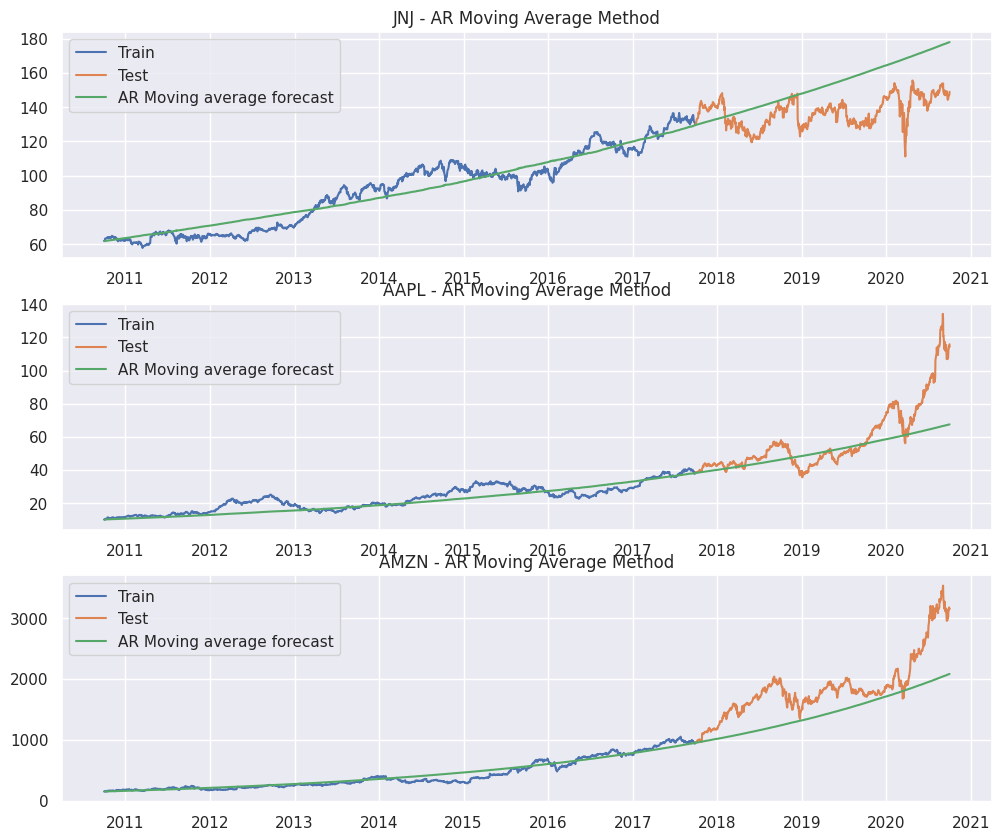

In [ ]:
plt.figure(figsize=(12,10))

i=1
for ticker in df_name:
  plt.subplot(3,1,i)
  plt.plot(train[ticker], label='Train')
  plt.plot(test[ticker], label='Test')
  plt.plot(arma_dict[ticker]['arma_forecast'], label='AR Moving average forecast')
  plt.legend(loc='best')
  plt.title(ticker+' - AR Moving Average Method')
  i=i+1
plt.show()

#### 4.5.2 Evaluate Model

In [ ]:
# RMSE & MAPE for ARMA method


mape_list =[]
rmse_list =[]

for key in df_name:

  rmse = np.sqrt(mean_squared_error(test[key], arma_dict[key]['arma_forecast'][len(train)-1:]))
  mape = np.mean(np.abs(test[key]-arma_dict[key]['arma_forecast'][len(train)-1:])/test[key])*100
  mape_list.append(mape)
  rmse_list.append(rmse)

ts_results['MAPE-ARMA'] = mape_list
ts_results['RMSE-ARMA'] = rmse_list
ts_results

Ticker  MAPE-Holt   RMSE-Holt    MAPE-AR     RMSE-AR    MAPE-MA     RMSE-MA  \
0    JNJ   6.912712   10.961783  12.413046   19.417634  12.570362   19.646875   
1   AAPL  19.595583   22.187606  13.105809   15.141553  13.235911   15.312509   
2   AMZN  35.986727  839.526436  20.820777  504.797717  21.042876  508.548136   

   MAPE-ARMA   RMSE-ARMA  
0  12.570917   19.647665  
1  13.223782   15.297123  
2  21.060601  508.846284

### 4.6 ARIMA Model

#### 4.6.1 Build and Plot Model

In [ ]:
!pip3 install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.5 MB/s eta 0:00:00


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-15612.521, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-15630.323, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-15631.779, Time=0.39 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-15630.830, Time=2.34 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-15639.986, Time=1.45 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-15638.867, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-15631.619, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-15630.719, Time=0.47 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-15630.009, Time=0.96 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-15627.837, Time=1.71 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-15643.278, Time=2.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-15631.711, Time=0.81 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-15629.692, Time=1.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-15629.216, Time=3.15 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-15627

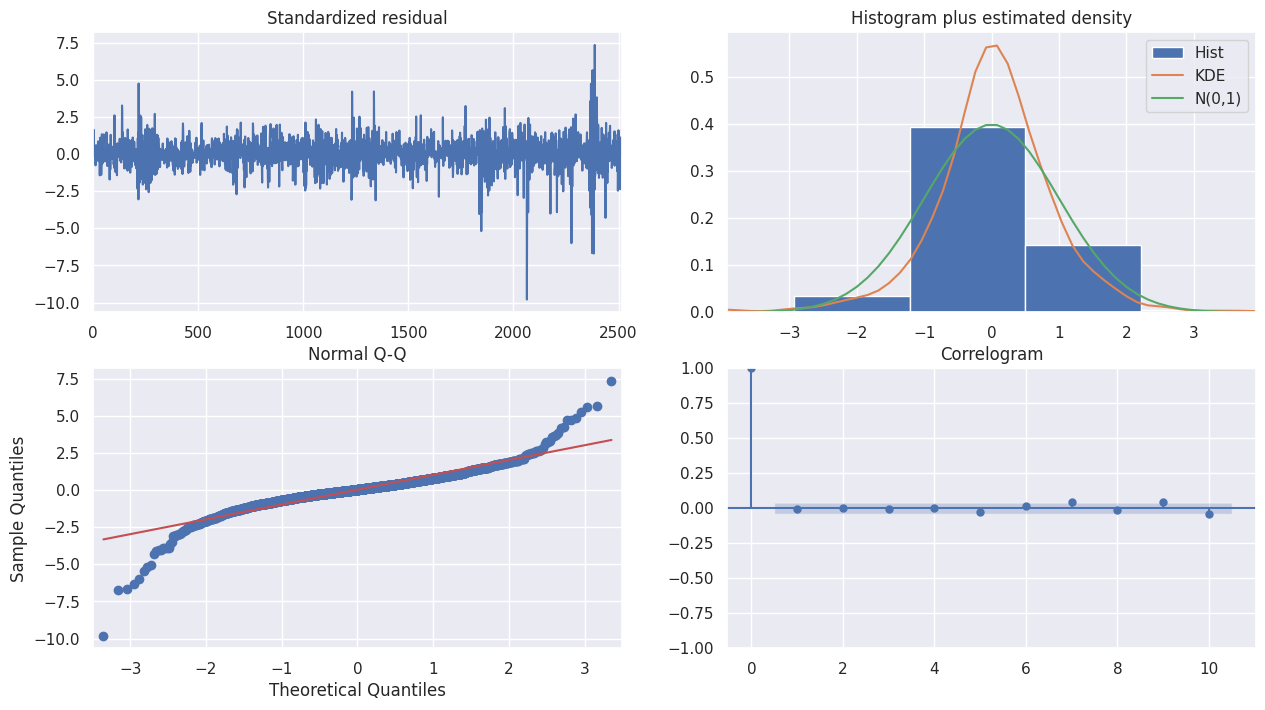

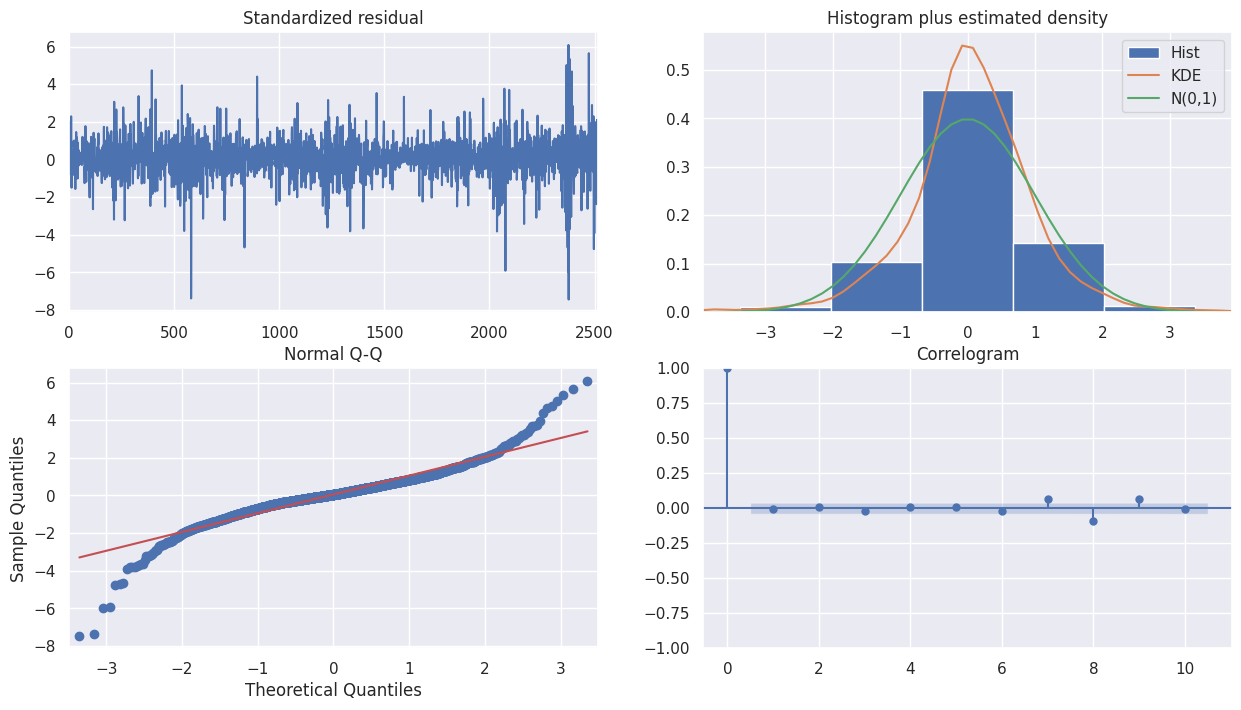

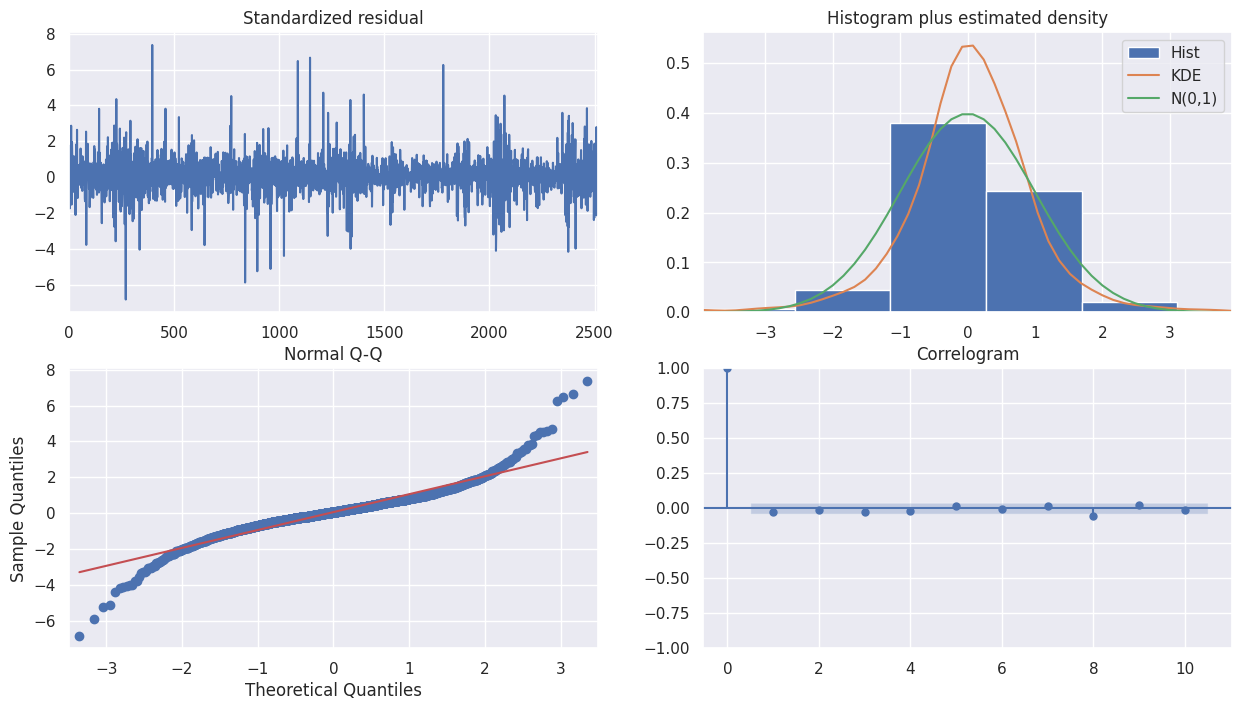

In [ ]:
#Use Auto-Arima to determine optimal valyes for p,q & d

from pmdarima.arima import auto_arima

for key in df_name:
  model_autoARIMA = auto_arima(df_boxcox_diff_dict[key], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=12, max_q=12, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)
  print(key,model_autoARIMA.summary())
  model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Plot train, test and forecast

import statsmodels.api as sm

arima_param = {"JNJ":[1,4],"AAPL":[1,0],"AMZN":[1,1]}
arima_dict = {}



for key in df_name:

  arima_model = sm.tsa.arima.ARIMA(train_df_boxcox_diff_dict[key], order=(arima_param[key][0], 0, arima_param[key][1])) 
  arima_model_fit = arima_model.fit()
  print(arima_model_fit.params,"\n")

  # Recover original time series
  arima = pd.DataFrame()
  arima['arima_forecast_boxcox_diff'] = arima_model_fit.predict(start=1,end=(train.shape[0]+test.shape[0]-1),dynamic=False)
  
  arima['ds'] = df_boxcox_diff_dict[key].index
  arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox_diff'].cumsum()
  arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox'].add(df_boxcox_dict[key][0])
  arima['arima_forecast'] = np.exp(arima['arima_forecast_boxcox'])
  arima.set_index(['ds'],inplace=True)
  arima_dict[key] = arima

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000418
ar.L1    -0.500919
ma.L1     0.457150
ma.L2    -0.008389
ma.L3     0.006553
ma.L4    -0.036943
sigma2    0.000076
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


const     0.000758
ar.L1     0.019770
sigma2    0.000252
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/pytho

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64 



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


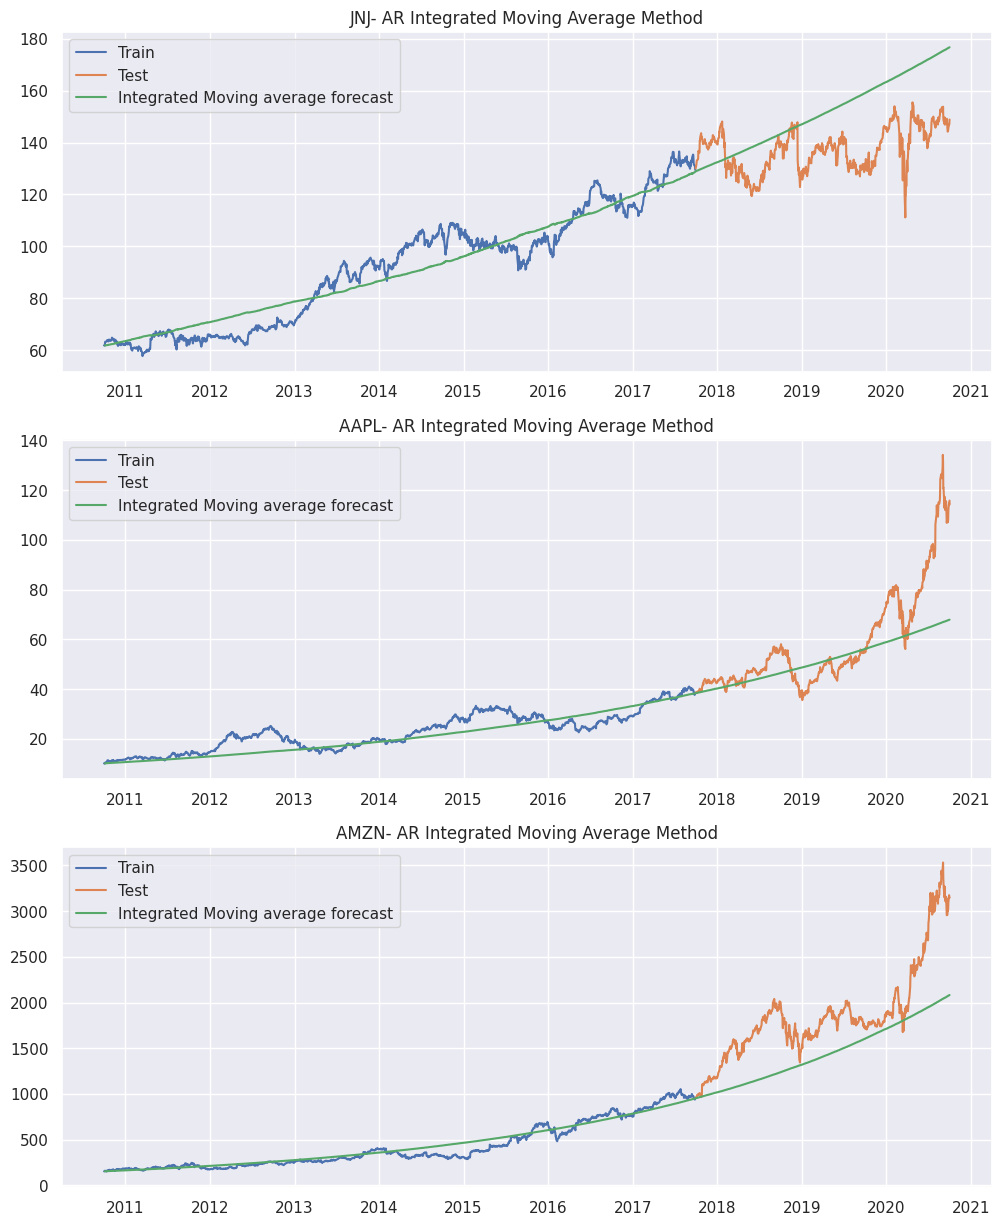

In [ ]:
plt.figure(figsize=(12,15))

i=1
for ticker in df_name:
  plt.subplot(3,1,i)
  plt.plot(train[ticker], label='Train')
  plt.plot(test[ticker], label='Test')
  plt.plot(arima_dict[ticker]['arima_forecast'], label='Integrated Moving average forecast')
  plt.legend(loc='best')
  plt.title(ticker+'- AR Integrated Moving Average Method')
  i=i+1
plt.show()

#### 4.6.2 Evaluate Model

In [ ]:
# RMSE & MAPE for ARIMA method


mape_list =[]
rmse_list =[]

for key in df_name:

  rmse = np.sqrt(mean_squared_error(test[key], arima_dict[key]['arima_forecast'][len(train)-1:]))
  mape = np.mean(np.abs(test[key]-arima_dict[key]['arima_forecast'][len(train)-1:])/test[key])*100
  mape_list.append(mape)
  rmse_list.append(rmse)

ts_results['MAPE-ARIMA'] = mape_list
ts_results['RMSE-ARIMA'] = rmse_list
ts_results

Ticker  MAPE-Holt   RMSE-Holt    MAPE-AR     RMSE-AR    MAPE-MA     RMSE-MA  \
0    JNJ   6.912712   10.961783  12.413046   19.417634  12.570362   19.646875   
1   AAPL  19.595583   22.187606  13.105809   15.141553  13.235911   15.312509   
2   AMZN  35.986727  839.526436  20.820777  504.797717  21.042876  508.548136   

   MAPE-ARMA   RMSE-ARMA  MAPE-ARIMA  RMSE-ARIMA  
0  12.570917   19.647665   12.055464   18.894494  
1  13.223782   15.297123   13.105809   15.141553  
2  21.060601  508.846284   21.060601  508.846284

In [ ]:
# sort the column names for better readability
ts_results.sort_index(axis=1,ascending=False).T


0          1           2
Ticker            JNJ       AAPL        AMZN
RMSE-MA     19.646875  15.312509  508.548136
RMSE-Holt   10.961783  22.187606  839.526436
RMSE-ARMA   19.647665  15.297123  508.846284
RMSE-ARIMA  18.894494  15.141553  508.846284
RMSE-AR     19.417634  15.141553  504.797717
MAPE-MA     12.570362  13.235911   21.042876
MAPE-Holt    6.912712  19.595583   35.986727
MAPE-ARMA   12.570917  13.223782   21.060601
MAPE-ARIMA  12.055464  13.105809   21.060601
MAPE-AR     12.413046  13.105809   20.820777

### 4.6 Prophet Model

#### 4.6.1 Basic Prophet Model

In [ ]:
#Build a model for all stocks and create a forecast for 3 year period

pf_stock_price_dict={}


# loop the dataframe for each stock
for ticker in portfolio_prices.columns:
  pf_stock_prices = pd.DataFrame(portfolio_prices[ticker]).reset_index()

#change the name of the columns as per prophet model requirements
  pf_stock_prices.rename(columns={"index":"ds",ticker:"y"},inplace=True)

#Convert to log form to reduce fluctuations in the data for better prediction
  pf_stock_prices['y'] = np.log(pf_stock_prices['y'])

#create a model and fit it on the portfolio stock
  model = Prophet()
  #model.add_country_holidays(country_name="US")
  model.fit(pf_stock_prices)

# create a forecast dataframe that can store 1 year's worth of data
  pf_stock_price_forecast = model.make_future_dataframe(periods=365, freq='D')

#since stock market is closed on weekends, we need to remove weekends from the data
  pf_stock_price_forecast['day'] = pf_stock_price_forecast['ds'].dt.weekday
  pf_stock_price_forecast = pf_stock_price_forecast[pf_stock_price_forecast['day']<=4]

#forecast 1 year out from the last entry and store model,forecast and data as a dictionary
  pf_stock_price_forecast = model.predict(pf_stock_price_forecast)
  pf_stock_price_dict[ticker] = [model,pf_stock_price_forecast,pf_stock_prices]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/jrq6b9og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/53frz5n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57032', 'data', 'file=/tmp/tmpa3v4pg1v/jrq6b9og.json', 'init=/tmp/tmpa3v4pg1v/53frz5n_.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model0zzqoggh/prophet_model-20230416130720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/t3fhkfdt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/nyoc_t4c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

<Figure size 1800x600 with 0 Axes>

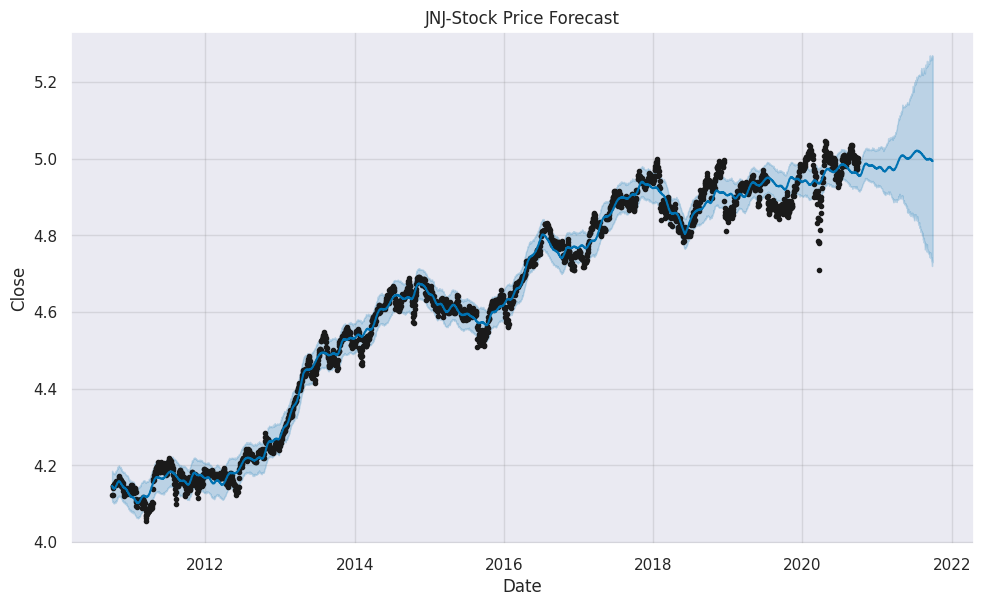

<Figure size 1800x600 with 0 Axes>

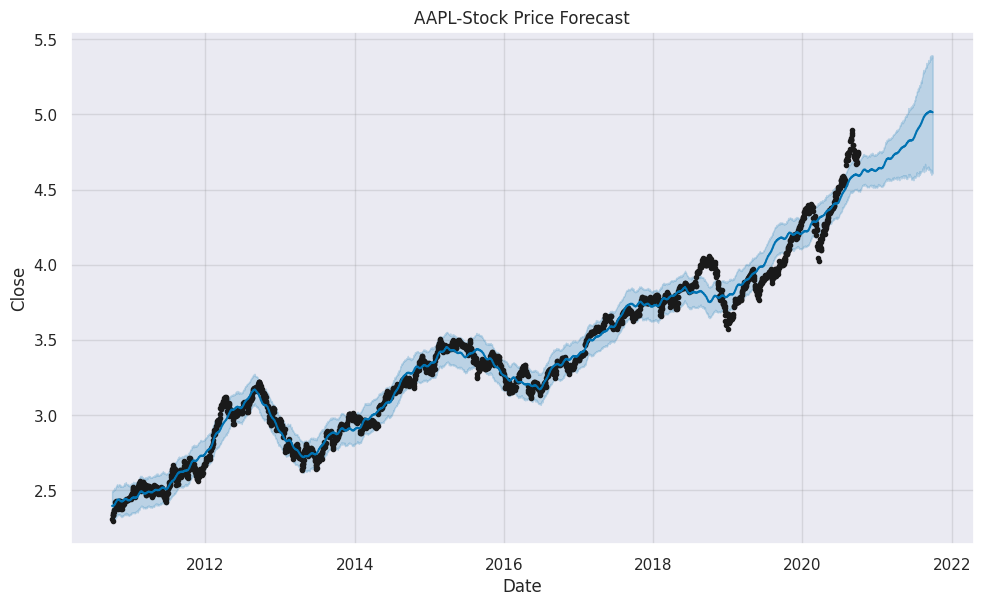

<Figure size 1800x600 with 0 Axes>

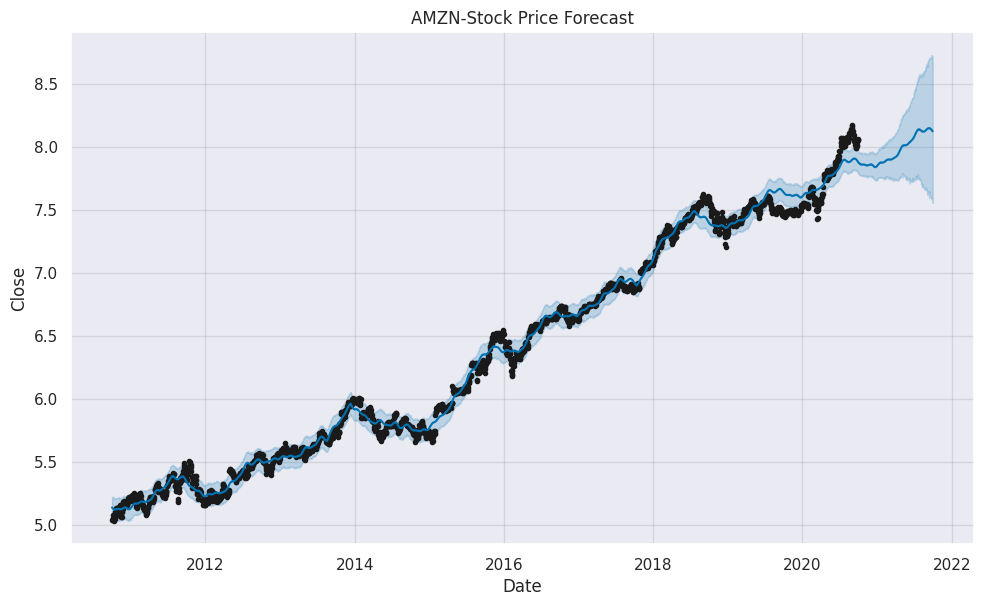

In [ ]:
#plot the forecast data on a graph
for key in df_name:
  plt.figure(figsize=(18, 6))
  pf_stock_price_dict[key][0].plot(pf_stock_price_dict[key][1], xlabel = 'Date', ylabel = 'Close')
  plt.title(key+'-Stock Price Forecast')
plt.show()

<Figure size 1800x600 with 0 Axes>

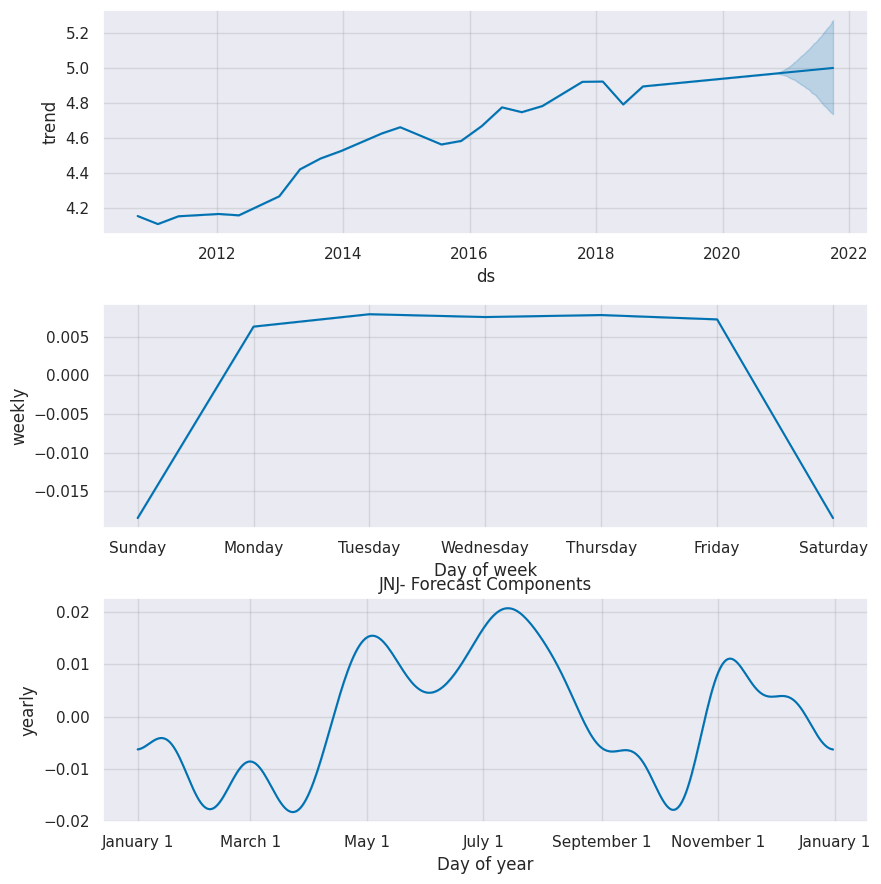

<Figure size 1800x600 with 0 Axes>

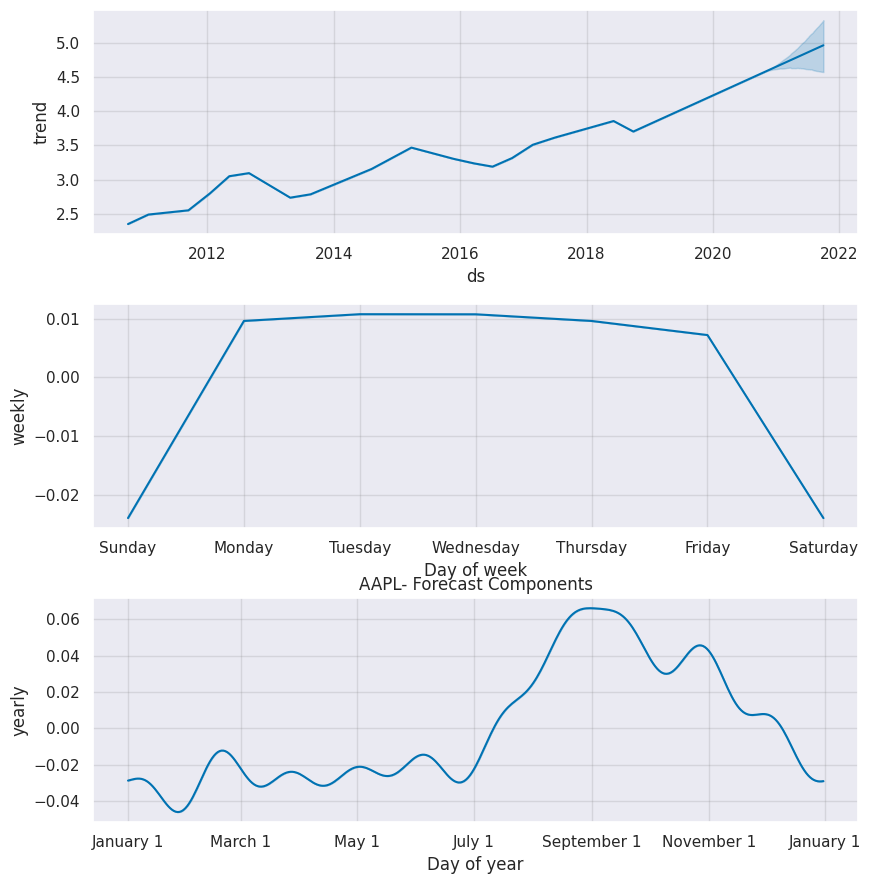

<Figure size 1800x600 with 0 Axes>

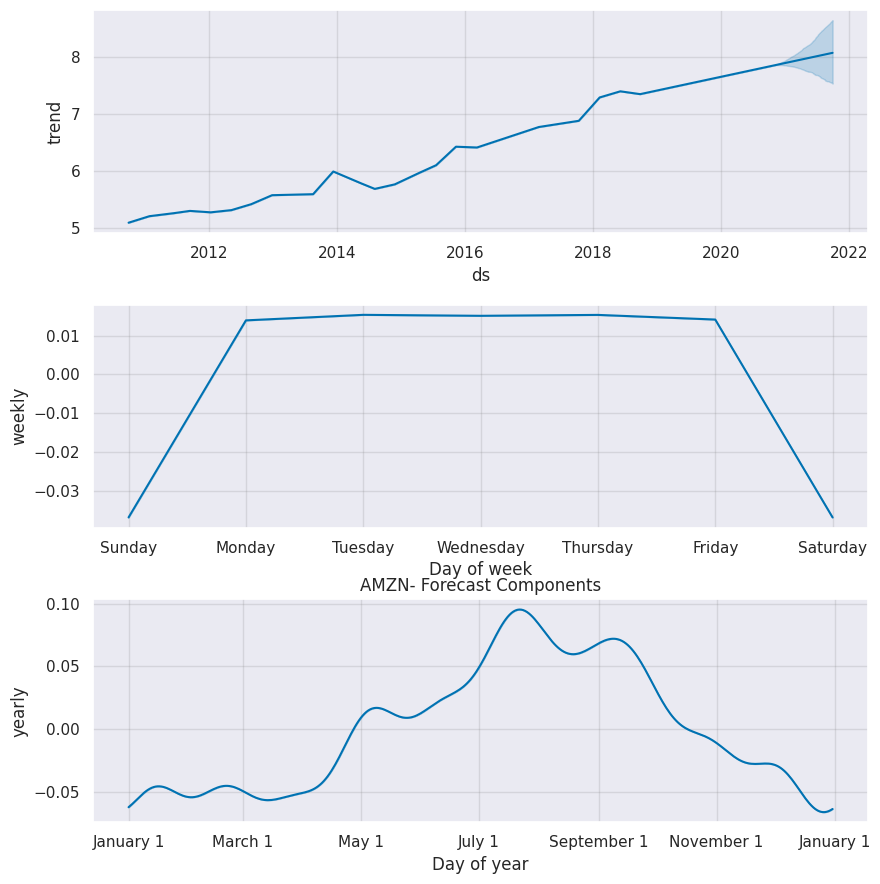

In [ ]:
#plot the components of the forecast
for key in df_name:
  plt.figure(figsize=(18, 6))
  pf_stock_price_dict[key][0].plot_components(pf_stock_price_dict[key][1])
  print(" ")
  plt.title(key+'- Forecast Components')
plt.show()

##### 4.5.1.2 Evaluate Basic Model

In [ ]:
#Carryout cross validation to evaluate the model for each stock in the portfolio
from prophet.diagnostics import cross_validation
cv_dict = {}
for key in df_name:
  df_cv = cross_validation(pf_stock_price_dict[key][0],horizon='365 days')
  cv_dict[key] = df_cv

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/y4dcp0uf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/hj00pavy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=431', 'data', 'file=/tmp/tmpa3v4pg1v/y4dcp0uf.json', 'init=/tmp/tmpa3v4pg1v/hj00pavy.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_modell2hckaq_/prophet_model-20230416130743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/n8l4yq2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/_cqwc2qk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/fdyqpbdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/25ykb2_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94611', 'data', 'file=/tmp/tmpa3v4pg1v/fdyqpbdy.json', 'init=/tmp/tmpa3v4pg1v/25ykb2_t.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_modelm8e9rdsv/prophet_model-20230416130802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/e5gz20x0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/p_xaatkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/ckb4hntd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/j2zlogwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86515', 'data', 'file=/tmp/tmpa3v4pg1v/ckb4hntd.json', 'init=/tmp/tmpa3v4pg1v/j2zlogwc.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_modelnt8nazrk/prophet_model-20230416130822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/jdgvtruh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/89i251ox.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
#display the cross validation data frame to check if has been loaded correctly
cv_dict["AAPL"]

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0    2013-10-03  2.829861    2.791754    2.867911  2.848661 2013-10-02
1    2013-10-04  2.824323    2.785470    2.862154  2.847874 2013-10-02
2    2013-10-07  2.825325    2.788781    2.863014  2.857598 2013-10-02
3    2013-10-08  2.826745    2.791649    2.863622  2.843538 2013-10-02
4    2013-10-09  2.825411    2.787735    2.863635  2.855217 2013-10-02
...         ...       ...         ...         ...       ...        ...
3265 2020-09-24  4.023519    3.314660    4.746687  4.684166 2019-10-01
3266 2020-09-25  4.019491    3.325831    4.754947  4.720996 2019-10-01
3267 2020-09-28  4.015860    3.321941    4.709879  4.744584 2019-10-01
3268 2020-09-29  4.015277    3.304340    4.735037  4.736988 2019-10-01
3269 2020-09-30  4.013312    3.276296    4.718604  4.751951 2019-10-01

[3270 rows x 6 columns]

In [ ]:
#store performance metrics for all the stocks
from prophet.diagnostics import performance_metrics
mape =[]
rmse =[]
for key in df_name:
  df_p = performance_metrics(cv_dict[key],rolling_window=1)
  mape.append(df_p["mape"][0])
# rmse.append(df_p["rmse"][0])

basemodel_results = pd.DataFrame(df_name,columns=["Ticker"])
basemodel_results['MAPE'] = mape
basemodel_results['MAPE'] = basemodel_results['MAPE']*100
#basemodel_results['RMSE'] = rmse
basemodel_results

Ticker      MAPE
0    JNJ  1.926179
1   AAPL  6.679927
2   AMZN  2.924106

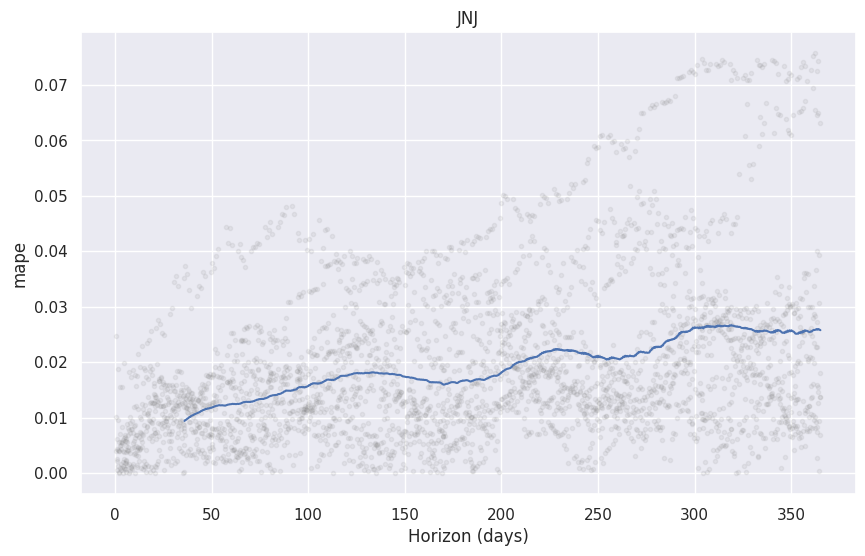

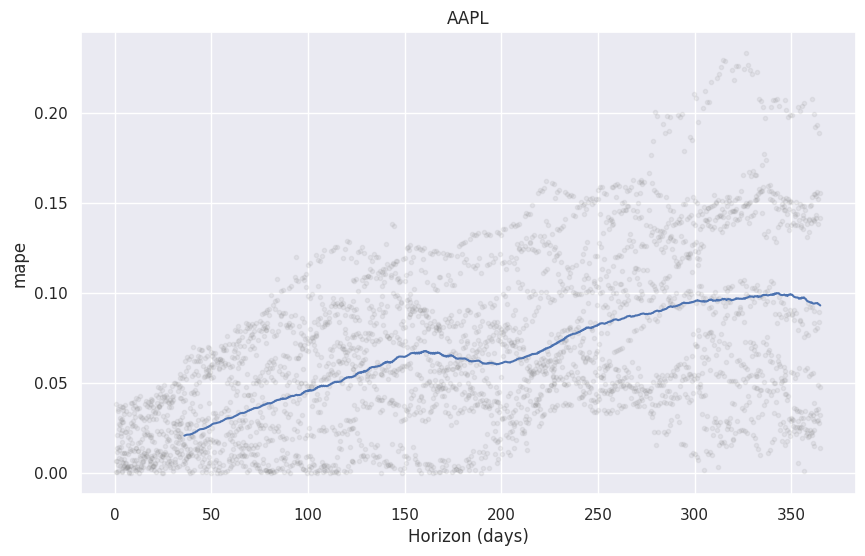

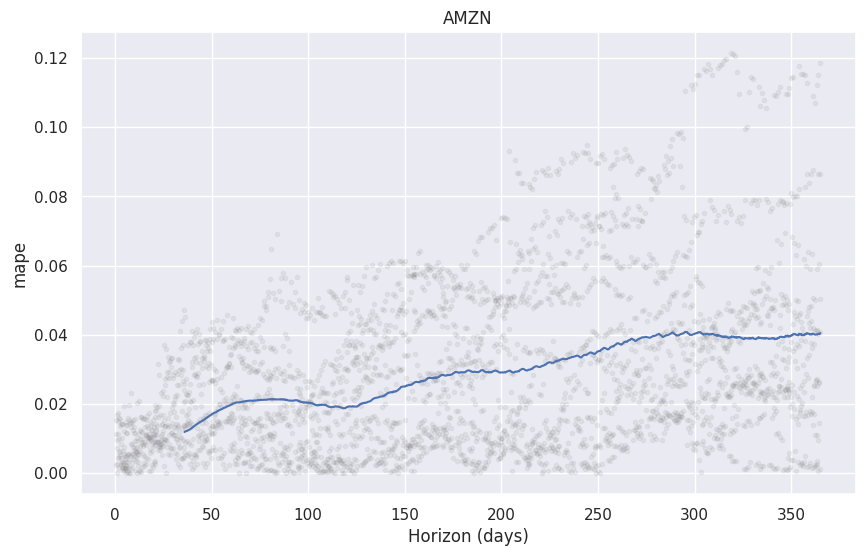

In [ ]:
#plot the corss validation metric 'mape' for all the stocks
from prophet.plot import plot_cross_validation_metric
for key in df_name:
  fig = plot_cross_validation_metric(cv_dict[key], metric='mape')
  plt.title(label =key)

#### 4.6.2 Model with holidays built-in

In [ ]:
#Build a model for all stocks and create a forecast for 3 year period

pf_stock_price_dict={}


# loop the dataframe for each stock
for ticker in portfolio_prices.columns:
  pf_stock_prices = pd.DataFrame(portfolio_prices[ticker]).reset_index()

#change the name of the columns as per prophet model requirements
  pf_stock_prices.rename(columns={"index":"ds",ticker:"y"},inplace=True)

#Convert to log form to reduce fluctuations in the data for better prediction
  pf_stock_prices['y'] = np.log(pf_stock_prices['y'])

#create a model and fit it on the portfolio stock
  model_hol = Prophet().add_country_holidays(country_name="US")
  model_hol.fit(pf_stock_prices)

# create a forecast dataframe that can store 1 year's worth of data
  pf_stock_price_forecast = model_hol.make_future_dataframe(periods=365, freq='D')

#since stock market is closed on weekends, we need to remove weekends from the data
  pf_stock_price_forecast['day'] = pf_stock_price_forecast['ds'].dt.weekday
  pf_stock_price_forecast = pf_stock_price_forecast[pf_stock_price_forecast['day']<=4]

#forecast 1 year out from the last entry and store model,forecast and data as a dictionary
  pf_stock_price_forecast = model_hol.predict(pf_stock_price_forecast)
  pf_stock_price_dict[ticker] = [model_hol,pf_stock_price_forecast,pf_stock_prices]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/iuzkti65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/pq05ke7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59217', 'data', 'file=/tmp/tmpa3v4pg1v/iuzkti65.json', 'init=/tmp/tmpa3v4pg1v/pq05ke7p.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_modelnmos_fzj/prophet_model-20230416130845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/_8vb3n7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/kjpxlx7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

<Figure size 1800x600 with 0 Axes>

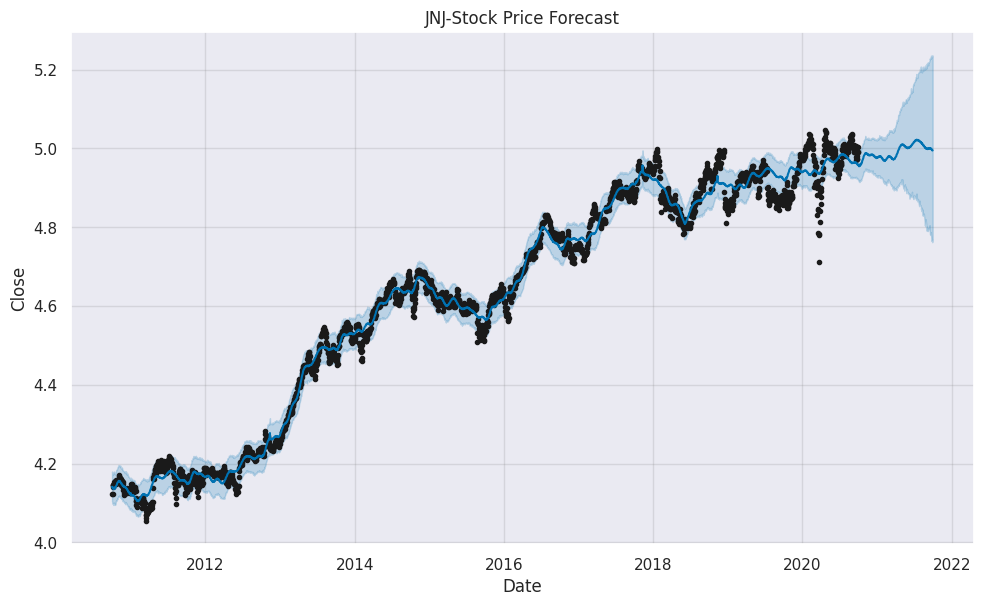

<Figure size 1800x600 with 0 Axes>

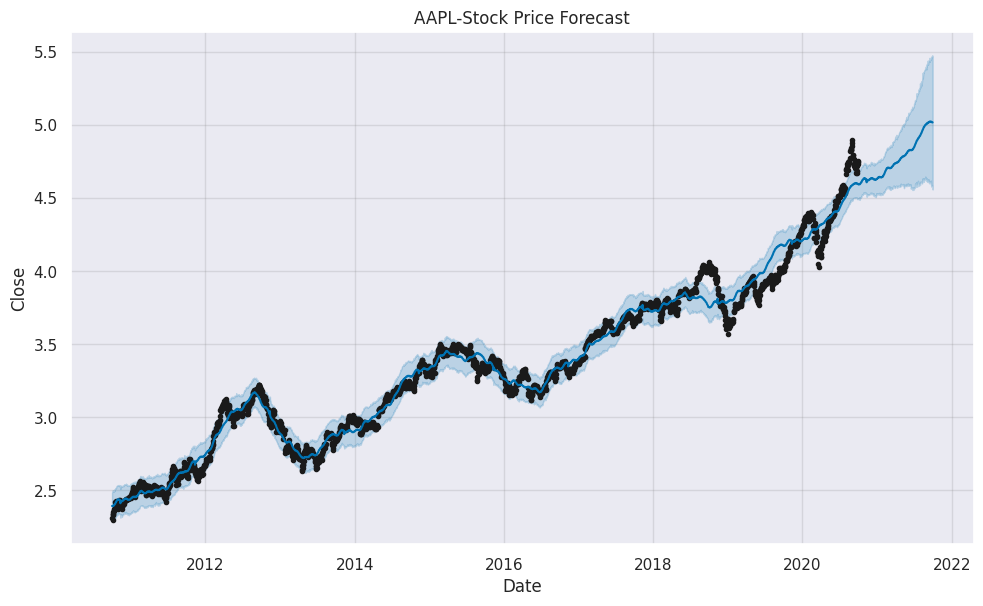

<Figure size 1800x600 with 0 Axes>

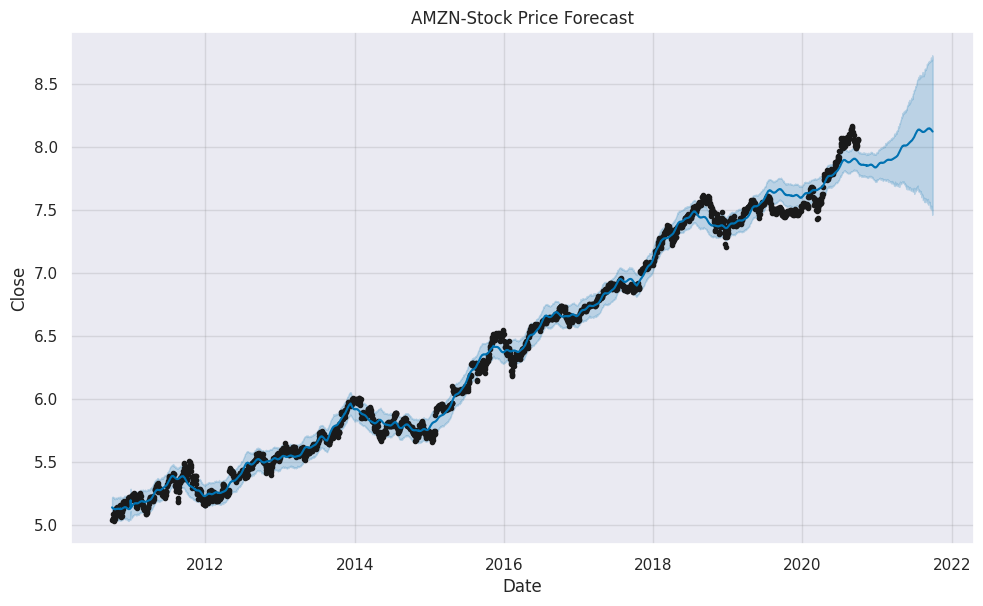

In [ ]:
#plot the forecast data on a graph
for key in df_name:
  plt.figure(figsize=(18, 6))
  pf_stock_price_dict[key][0].plot(pf_stock_price_dict[key][1], xlabel = 'Date', ylabel = 'Close')
  plt.title(key+'-Stock Price Forecast')
plt.show()

##### 4.6.2.2 Evaluate Holiday Model

In [ ]:
#Carryout cross validation to evaluate the model for each stock in the portfolio
from prophet.diagnostics import cross_validation
cv_dict = {}
for key in df_name:
  df_cv = cross_validation(pf_stock_price_dict[key][0],horizon='365 days')
  cv_dict[key] = df_cv

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/y680thb1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/nbu__kvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65836', 'data', 'file=/tmp/tmpa3v4pg1v/y680thb1.json', 'init=/tmp/tmpa3v4pg1v/nbu__kvv.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model1rtohv1p/prophet_model-20230416130858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/pg_17pt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/up7_mb__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/ogx3if4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/77vk839k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2458', 'data', 'file=/tmp/tmpa3v4pg1v/ogx3if4s.json', 'init=/tmp/tmpa3v4pg1v/77vk839k.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model43fcxsvw/prophet_model-20230416130925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/hyu8ibo4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/chmrofn1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/znysyls2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/6s5blv7u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8826', 'data', 'file=/tmp/tmpa3v4pg1v/znysyls2.json', 'init=/tmp/tmpa3v4pg1v/6s5blv7u.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_modela0gk11c7/prophet_model-20230416130948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/1qnczus4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/0iiwkqrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
#store performance metrics for all the stocks
from prophet.diagnostics import performance_metrics
mape =[]
rmse =[]
for key in df_name:
  df_p = performance_metrics(cv_dict[key],rolling_window=1)
  mape.append(df_p["mape"][0])
#  rmse.append(df_p["rmse"][0])

holmodel_results = pd.DataFrame(df_name,columns=["Ticker"])
holmodel_results['MAPE-Holiday'] = mape
holmodel_results['MAPE-Holiday'] = holmodel_results['MAPE-Holiday']*100
#holmodel_results['RMSE-Holiday'] = rmse
print("Holiday Model",holmodel_results)
print("Base Model",basemodel_results)

Holiday Model   Ticker  MAPE-Holiday
0    JNJ      1.941917
1   AAPL      6.646925
2   AMZN      2.924113
Base Model   Ticker      MAPE
0    JNJ  1.926179
1   AAPL  6.679927
2   AMZN  2.924106


In [ ]:
x = pd.concat([basemodel_results,holmodel_results],axis=1)
x = x.T.drop_duplicates().T
x

Ticker      MAPE MAPE-Holiday
0    JNJ  1.926179     1.941917
1   AAPL  6.679927     6.646925
2   AMZN  2.924106     2.924113

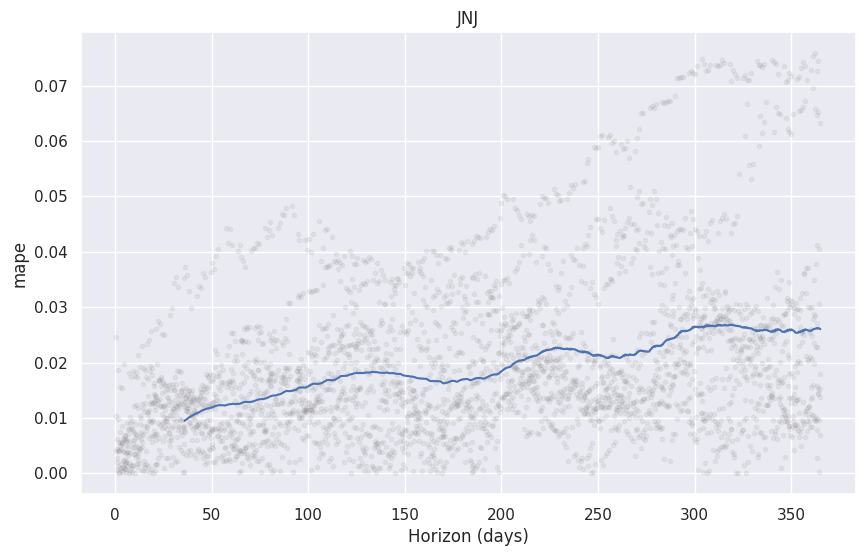

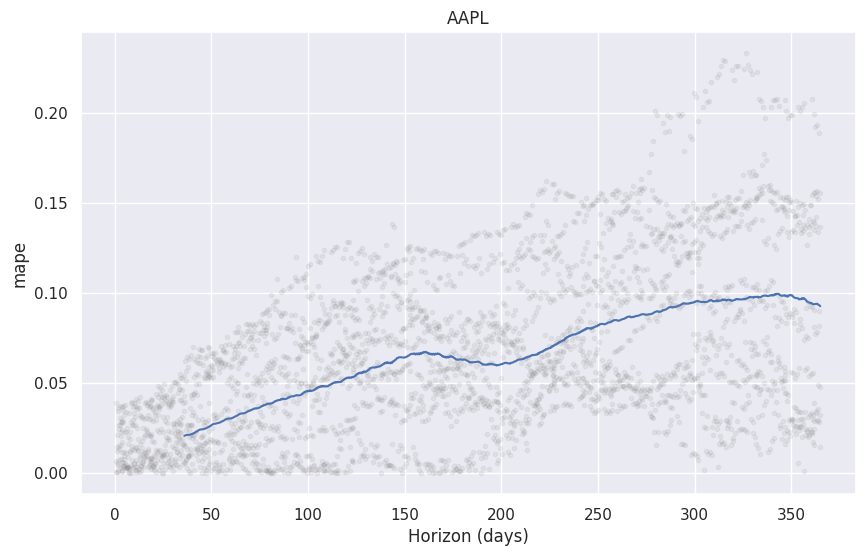

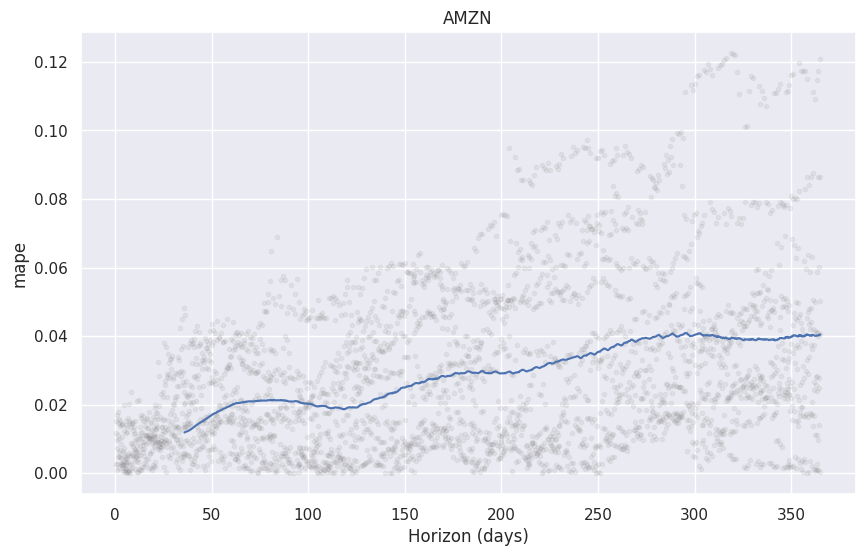

In [ ]:
#plot the cross validation metric 'mape' for all the stocks
from prophet.plot import plot_cross_validation_metric
for key in df_name:
  fig = plot_cross_validation_metric(cv_dict[key], metric='mape')
  plt.title(label =key)

#### 4.6.3 Hyper Parameter Optimisation

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd


#configure a combination of two parameters to fine tune the model
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    "seasonality_mode":("additive","multiplicative"),
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
df_model_metrics_optimisation = {}


for ticker in df_name:
  rmse = []  # Store the RMSEs for each params here
  mape = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
  for params in all_params:
      m = Prophet(**params).add_country_holidays(country_name="US")

      m.fit(pf_stock_price_dict[ticker][2])  # Fit model with given params
      
      df_cv = cross_validation(m, horizon='756 days', parallel="processes")
      
      df_p = performance_metrics(df_cv, rolling_window=1)
      rmse.append(df_p['rmse'].values[0])
      mape.append(df_p['mape'].values[0])


# Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['mape'] = mape
  tuning_results['rmse'] = rmse
  df_model_metrics_optimisation[ticker] = tuning_results


DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/nvbty5d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/0xq393k3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42536', 'data', 'file=/tmp/tmpa3v4pg1v/nvbty5d7.json', 'init=/tmp/tmpa3v4pg1v/0xq393k3.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model4wknr5dr/prophet_model-20230416131017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/l_0iakqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/2r85_nrx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/hodb3qih.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan,

In [ ]:
# store optimal values in a dictionary for re-running the model
stock_optimial_params_dict ={}

for ticker in df_name:
  stock_metric_df = df_model_metrics_optimisation[ticker]
  stock_metric_df = stock_metric_df[(stock_metric_df["mape"] == stock_metric_df["mape"].min())]
  
  #store the dictonary to pass optimised params to Fine tuned model
  stock_optimial_params_dict[ticker]= {'changepoint_prior_scale':stock_metric_df.iloc[0]['changepoint_prior_scale'],
                                       'seasonality_prior_scale':stock_metric_df.iloc[0]['seasonality_prior_scale'],
                                       "seasonality_mode":stock_metric_df.iloc[0]['seasonality_mode'],
                                       #'holidays_prior_scale':stock_metric_df.iloc[0]['holidays_prior_scale']
                                       }

In [ ]:
#check the params to be passed while creating the fine tuned model
stock_optimial_params_dict

{'JNJ': {'changepoint_prior_scale': 0.01,
  'seasonality_prior_scale': 0.1,
  'seasonality_mode': 'multiplicative'},
 'AAPL': {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 1.0,
  'seasonality_mode': 'multiplicative'},
 'AMZN': {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.1,
  'seasonality_mode': 'additive'}}

#### 4.6.4 Fine Tuned Model

In [ ]:
#Create a fine tuned model using optimised hyper parameters

pf_stock_price_dict_latest = pf_stock_price_dict.copy()

for ticker in portfolio_prices.columns:

  #create and fit the optimised model
  model = Prophet(**stock_optimial_params_dict[ticker]).add_country_holidays(country_name="US")
  model.fit(pf_stock_price_dict[ticker][2])
  
  #create a dataframe to hold forecast data for 365 days
  pf_stock_price_forecast = model.make_future_dataframe(periods=1095, freq='D')

  #remove weekend data from the dataframe
  pf_stock_price_forecast['day'] = pf_stock_price_forecast['ds'].dt.weekday
  pf_stock_price_forecast = pf_stock_price_forecast[pf_stock_price_forecast['day']<=4]

  #create a forecast
  pf_stock_price_forecast = model.predict(pf_stock_price_forecast)
  pf_stock_price_dict_latest[ticker] = [model,pf_stock_price_forecast,pf_stock_prices]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/r74qy57d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/o2ixmhl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45362', 'data', 'file=/tmp/tmpa3v4pg1v/r74qy57d.json', 'init=/tmp/tmpa3v4pg1v/o2ixmhl9.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model4uovz2nj/prophet_model-20230416132055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/cfrqryx9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/qlag5_av.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Index(['AAPL'], dtype='object')
RangeIndex(start=0, stop=3299, step=1)


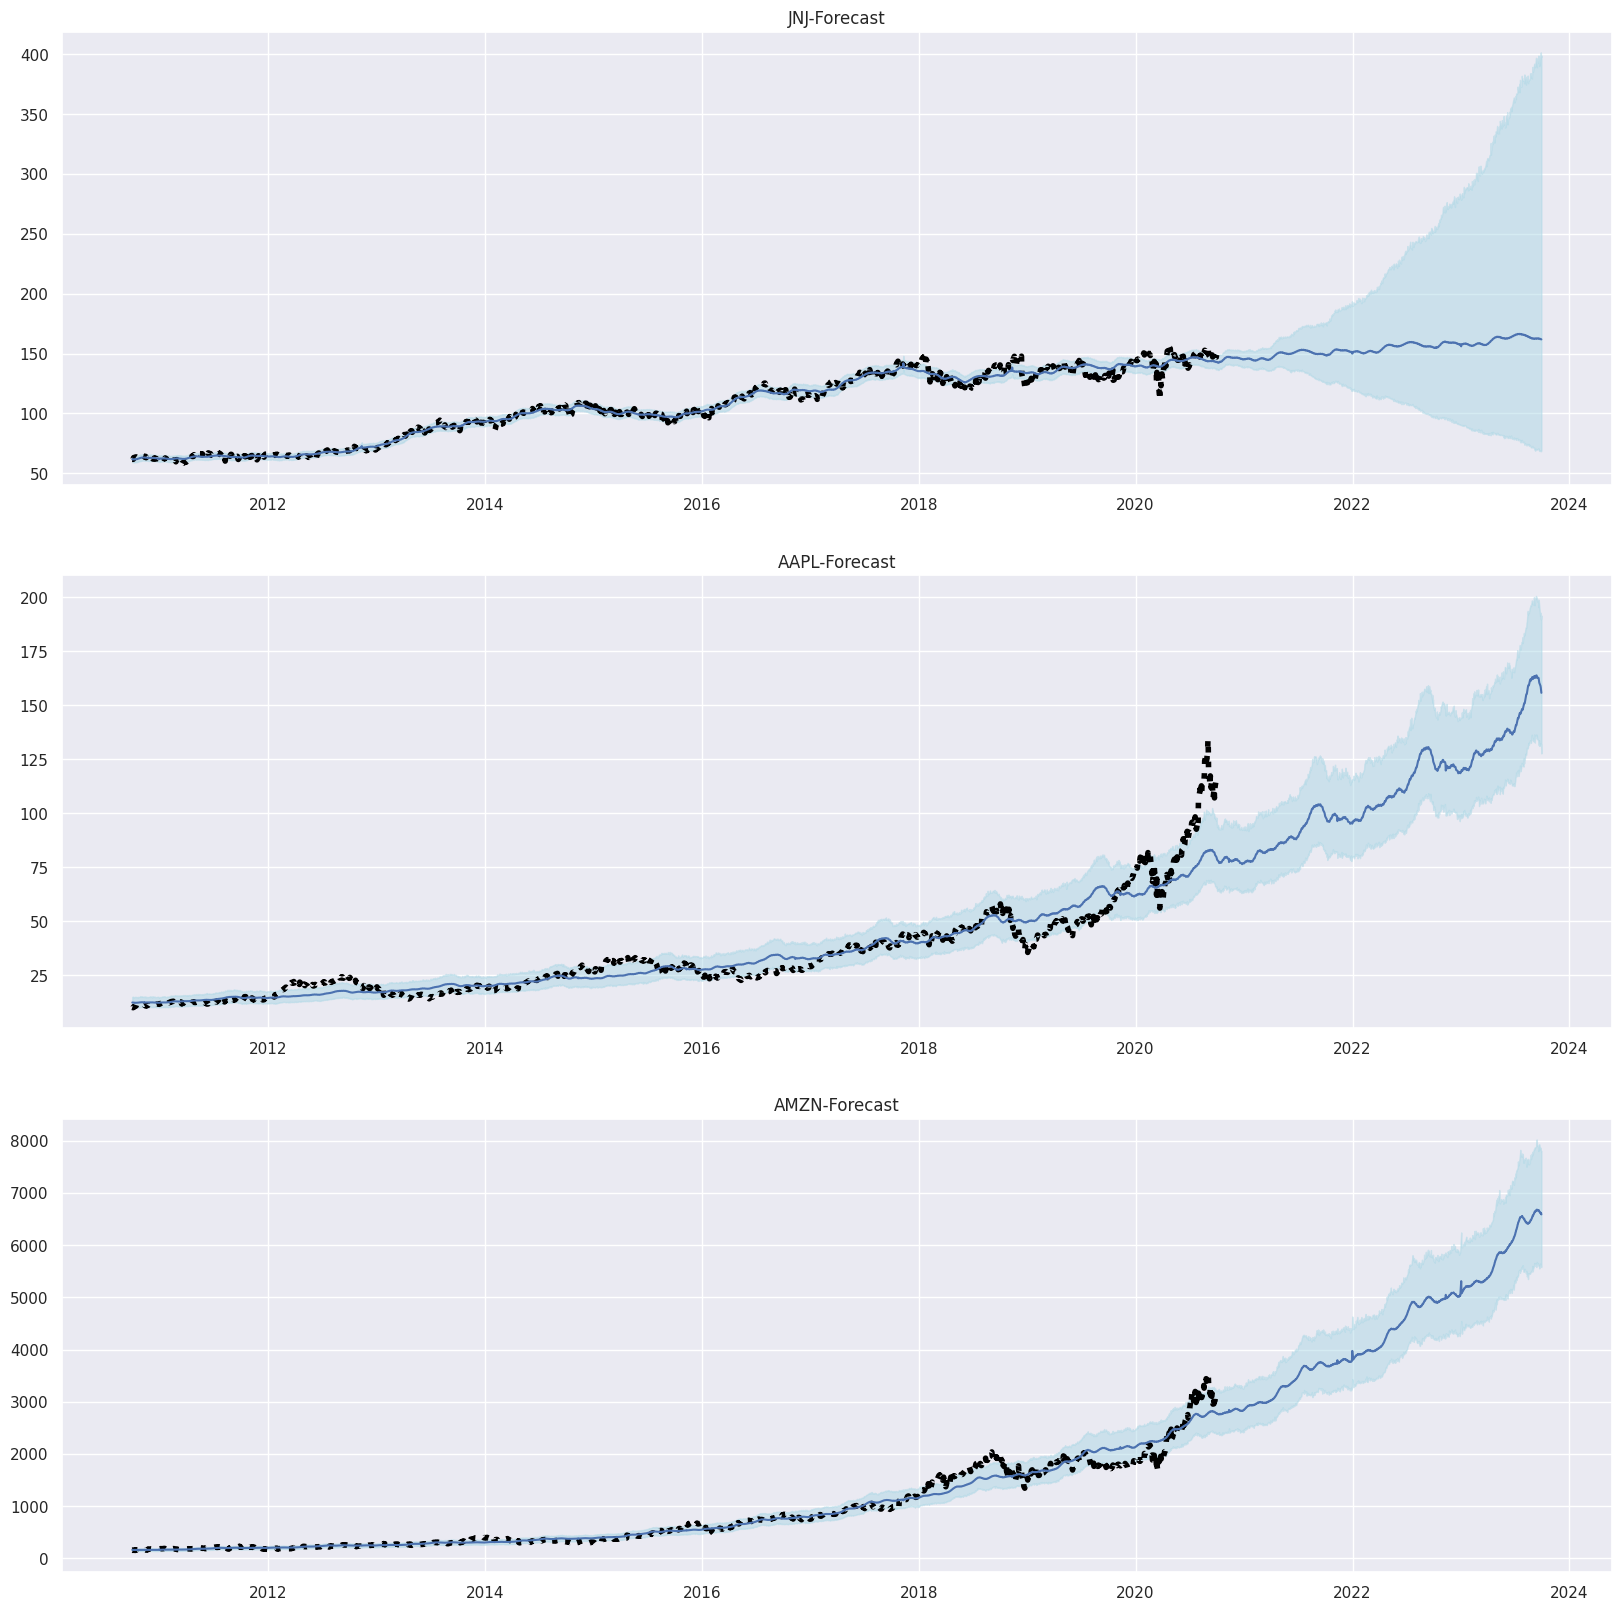

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

portfolio_prices.head()
output_forecast_dict = {}

print(pd.DataFrame(portfolio_prices["AAPL"]).columns)
print(pf_stock_price_dict_latest[ticker][1][["yhat","yhat_lower","yhat_upper"]].index)


plt_1 = plt.figure(figsize=(20, 20))

i=1
for ticker in df_name:
  pf_forecast_temp = pd.DataFrame(portfolio_prices[ticker]).rename_axis('ds')

  pf_forecast_temp2 = pf_stock_price_dict_latest[ticker][1][["ds","yhat","yhat_lower","yhat_upper"]]

  x2= pf_forecast_temp2.join(pf_forecast_temp, on='ds')

  x2.index = pd.to_datetime(x2.index,format="%Y-%m-%d")

  plt.subplot(3,1,i)
  plt.plot(x2["ds"],x2[ticker],color='black', linestyle=':',linewidth=4)
  plt.plot(x2["ds"],np.exp(x2.yhat))
  plt.title(ticker+"-Forecast")
  plt.fill_between(x2.ds, np.exp(x2['yhat_upper']), np.exp(x2['yhat_lower']), alpha=0.5, color='lightblue')

  i+=1

i = 1

plt.show()

##### 4.6.4.1 Evaluate Tuned Model

In [ ]:
#Carryout cross validation to evaluate the model
from prophet.diagnostics import cross_validation
cv_dict = {}
for key in df_name:
  df_cv = cross_validation(pf_stock_price_dict_latest[key][0],horizon='756 days')
  cv_dict[key] = df_cv

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/8aahvpdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/yesyynpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7063', 'data', 'file=/tmp/tmpa3v4pg1v/8aahvpdf.json', 'init=/tmp/tmpa3v4pg1v/yesyynpz.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model8wg1n4hi/prophet_model-20230416132103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/3rz7azyf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/mbsgaxfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/n6fra4m5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/fl5lvc8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29274', 'data', 'file=/tmp/tmpa3v4pg1v/n6fra4m5.json', 'init=/tmp/tmpa3v4pg1v/fl5lvc8f.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model61magagh/prophet_model-20230416132108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/6bbss3hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/rpkt6ptt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/1xqkjv2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/_n8zosdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5063', 'data', 'file=/tmp/tmpa3v4pg1v/1xqkjv2w.json', 'init=/tmp/tmpa3v4pg1v/_n8zosdh.json', 'output', 'file=/tmp/tmpa3v4pg1v/prophet_model1o898018/prophet_model-20230416132109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/zj4ww76e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3v4pg1v/qf3s7zlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
#store performance metrics for all the stocks
from prophet.diagnostics import performance_metrics
final_mape =[]
final_rmse =[]
for key in df_name:
  df_p = performance_metrics(cv_dict[key],rolling_window=1)
  final_mape.append(df_p["mape"][0])
#  final_rmse.append(df_p["rmse"][0])

final_tuning_results = pd.DataFrame(df_name,columns=["Ticker"])
final_tuning_results['MAPE-Fine Tuned'] = final_mape
final_tuning_results['MAPE-Fine Tuned'] = final_tuning_results['MAPE-Fine Tuned']*100
#final_tuning_results['RMSE'] = final_rmse

print(final_tuning_results)
print(basemodel_results)

  Ticker  MAPE-Fine Tuned
0    JNJ         1.465887
1   AAPL         3.613408
2   AMZN         2.528679
  Ticker      MAPE
0    JNJ  1.926179
1   AAPL  6.679927
2   AMZN  2.924106


In [ ]:
x = pd.concat([basemodel_results,holmodel_results,final_tuning_results],axis=1)
x = x.T.drop_duplicates().T
x

Ticker      MAPE MAPE-Holiday MAPE-Fine Tuned
0    JNJ  1.926179     1.941917        1.465887
1   AAPL  6.679927     6.646925        3.613408
2   AMZN  2.924106     2.924113        2.528679

#### 4.6.5 Calculate Returns from Forecast

In [ ]:
# Capture future forecast in a dataframe
forecast_price =[]
stock_forecast_dict =  {}

#store ticker and initial investment amount in a dictionary
stock_forecast_dict["Ticker"] = df_name
stock_forecast_dict["Intial_investment_price"] = list(portfolio_prices.iloc[-1])

for key in pf_stock_price_dict.keys():
  forecast_price.append(np.exp(pf_stock_price_dict_latest[key][1].yhat.iloc[-1]))

#store final investment forecast in a dictionary
stock_forecast_dict["Final_investment_forecast"] = forecast_price

stock_forecast_df = pd.DataFrame(stock_forecast_dict)
stock_forecast_df["Cumulative_returns_forecast"] = ((stock_forecast_df.Final_investment_forecast - stock_forecast_df.Intial_investment_price)/stock_forecast_df.Intial_investment_price)*100
stock_forecast_df["Average_returns_forecast"] = stock_forecast_df["Cumulative_returns_forecast"]/3
stock_forecast_df

Ticker  Intial_investment_price  Final_investment_forecast  \
0    JNJ               148.880005                 161.837450   
1   AAPL               115.809998                 155.796408   
2   AMZN              3148.729980                6588.223522   

   Cumulative_returns_forecast  Average_returns_forecast  
0                     8.703281                  2.901094  
1                    34.527597                 11.509199  
2                   109.234312                 36.411437

In [ ]:
#Caulculate forecasted Average return
Forecast_weighted_average = (initial_weight * stock_forecast_df.Average_returns_forecast)
pf_frct_avg_rtns = np.sum(Forecast_weighted_average)
print("Forecasted Average returns of portfolio:",round(pf_frct_avg_rtns,2))

Forecasted Average returns of portfolio: 16.94


## 5.Summary and Recommendations

Ms Alexandra Kolishnyick (aka Alexa) is advised to invest in a specially customised portfolio consisting of following stocks


1. Johnson & Johnson
2. Apple &
3. Amazon   

